In [1]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('seaborn')
from pylab import rcParams
from sklearn import metrics
from   sklearn.metrics import  mean_squared_error
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import seaborn as sns # advanced vizs
%matplotlib inline

sns.set_style('darkgrid')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings('ignore')

/var/folders/s9/jv54p_8n6h73q980mf1vtfkw0000gn/T/ipykernel_1458/3905003699.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
### Data dictionary

In [3]:
data_dictionary = pd.read_excel("Customer Churn Data.xlsx", index_col=2, sheet_name='Meta Data', header=1 ).drop(columns='Unnamed: 0', axis=1)
data_dictionary

Variable
Description                                                             
account unique identifier                                      AccountID
account churn flag (Target)                                        Churn
Tenure of account                                                 Tenure
Tier of primary customer's city                                City_Tier
How many times all the customers of the account...     CC_Contacted_L12m
Preferred Payment mode of the customers in the ...               Payment
Gender of the primary customer of the account                     Gender
Satisfaction score given by customers of the ac...         Service_Score
Number of customers tagged with this account          Account_user_count
Account segmentation on the basis of spend               account_segment
Satisfaction score given by customers of the ac...        CC_Agent_Score
Marital status of the primary customer of the a...        Marital_Status
Monthly average revenue generated by account in...         rev_per_month
Any complaints has been raised by account in la...         Complain_l12m
revenue growth percentage of the account (last ...        rev_growth_yoy
How many times customers have used coupons to d...      coupon_used_l12m
Number of days since no customers in the accoun...  Day_Since_CC_connect
Monthly average cashback generated by account i...         cashback_l12m
Preferred login device of the customers in the ...          Login_device

In [4]:
xls = pd.ExcelFile('Customer Churn Data.xlsx')
df = pd.read_excel(xls, sheet_name="Data for DSBA")
df.head().T

0             1             2           3             4
AccountID                     20000         20001         20002       20003         20004
Churn                             1             1             1           1             1
Tenure                            4             0             0           0             0
City_Tier                       3.0           1.0           1.0         3.0           1.0
CC_Contacted_LY                 6.0           8.0          30.0        15.0          12.0
Payment                  Debit Card           UPI    Debit Card  Debit Card   Credit Card
Gender                       Female          Male          Male        Male          Male
Service_Score                   3.0           3.0           2.0         2.0           2.0
Account_user_count                3             4             4           4             3
account_segment               Super  Regular Plus  Regular Plus       Super  Regular Plus
CC_Agent_Score                  2.0           3.0           3.0         5.0           5.0
Marital_Status               Single        Single        Single      Single        Single
rev_per_month                     9             7             6           8             3
Complain_ly                     1.0           1.0           1.0         0.0           0.0
rev_growth_yoy                   11            15            14          23            11
coupon_used_for_payment           1             0             0           0             1
Day_Since_CC_connect              5             0             3           3             3
cashback                     159.93         120.9           NaN      134.07         129.6
Login_device                 Mobile        Mobile        Mobile      Mobile        Mobile

In [5]:
# renaming the columns of the dataframe

rename_columns = {
    'AccountID' : 'account_id',
    'churn' : 'churn',
    'Tenure' : 'account_tenure',
    'City_Tier' : 'city_tier',
    'CC_Contacted_LY' : 'cust_care_contacts_12m',
    'Payment' : 'payment_method',
    'Gender' : 'gender',
    'Service_Score' : 'service_score',
    'Account_user_count' : 'customers_per_account',
    'CC_Agent_Score' : 'cc_agent_score',
    'Marital_Status' : 'marital_Status',
    'rev_per_month' : 'revenue_per_month',
    'Complain_ly' : 'account_complaints_12m',
    'coupon_used_for_payment' : 'coupons_used',
    'Day_Since_CC_connect' : 'days_since_cc_contact',
    'Login_device' : 'login_device'
}

df.rename(columns=rename_columns, inplace=True)

In [6]:
df.head()

account_id  Churn account_tenure  city_tier  cust_care_contacts_12m payment_method  gender  service_score customers_per_account account_segment  cc_agent_score marital_Status revenue_per_month  account_complaints_12m rev_growth_yoy coupons_used days_since_cc_contact cashback login_device
0       20000      1              4        3.0                     6.0     Debit Card  Female            3.0                     3           Super             2.0         Single                 9                     1.0             11            1                     5   159.93       Mobile
1       20001      1              0        1.0                     8.0            UPI    Male            3.0                     4    Regular Plus             3.0         Single                 7                     1.0             15            0                     0    120.9       Mobile
2       20002      1              0        1.0                    30.0     Debit Card    Male            2.0                     4    Regular Plus             3.0         Single                 6                     1.0             14            0                     3      NaN       Mobile
3       20003      1              0        3.0                    15.0     Debit Card    Male            2.0                     4           Super             5.0         Single                 8                     0.0             23            0                     3   134.07       Mobile
4       20004      1              0        1.0                    12.0    Credit Card    Male            2.0                     3    Regular Plus             5.0         Single                 3                     0.0             11            1                     3    129.6       Mobile

In [7]:
df.shape

(11260, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_id              11260 non-null  int64  
 1   Churn                   11260 non-null  int64  
 2   account_tenure          11158 non-null  object 
 3   city_tier               11148 non-null  float64
 4   cust_care_contacts_12m  11158 non-null  float64
 5   payment_method          11151 non-null  object 
 6   gender                  11152 non-null  object 
 7   service_score           11162 non-null  float64
 8   customers_per_account   11148 non-null  object 
 9   account_segment         11163 non-null  object 
 10  cc_agent_score          11144 non-null  float64
 11  marital_Status          11048 non-null  object 
 12  revenue_per_month       11158 non-null  object 
 13  account_complaints_12m  10903 non-null  float64
 14  rev_growth_yoy          11260 non-null

In [9]:
# check for duplicate columns

print("Number of duplicate rows:", df.duplicated().sum())
df[df.duplicated()]

Number of duplicate rows: 0


Empty DataFrame
Columns: [account_id, Churn, account_tenure, city_tier, cust_care_contacts_12m, payment_method, gender, service_score, customers_per_account, account_segment, cc_agent_score, marital_Status, revenue_per_month, account_complaints_12m, rev_growth_yoy, coupons_used, days_since_cc_contact, cashback, login_device]
Index: []

In [10]:
df.describe(include='all').T

count  unique         top    freq       mean         std      min       25%      50%       75%      max
account_id              11260.0     NaN         NaN     NaN    25629.5  3250.62635  20000.0  22814.75  25629.5  28444.25  31259.0
Churn                   11260.0     NaN         NaN     NaN   0.168384    0.374223      0.0       0.0      0.0       0.0      1.0
account_tenure          11158.0    38.0         1.0  1351.0        NaN         NaN      NaN       NaN      NaN       NaN      NaN
city_tier               11148.0     NaN         NaN     NaN   1.653929    0.915015      1.0       1.0      1.0       3.0      3.0
cust_care_contacts_12m  11158.0     NaN         NaN     NaN  17.867091    8.853269      4.0      11.0     16.0      23.0    132.0
payment_method            11151       5  Debit Card    4587        NaN         NaN      NaN       NaN      NaN       NaN      NaN
gender                    11152       4        Male    6328        NaN         NaN      NaN       NaN      NaN       NaN      NaN
service_score           11162.0     NaN         NaN     NaN   2.902526    0.725584      0.0       2.0      3.0       3.0      5.0
customers_per_account   11148.0     7.0         4.0  4569.0        NaN         NaN      NaN       NaN      NaN       NaN      NaN
account_segment           11163       7       Super    4062        NaN         NaN      NaN       NaN      NaN       NaN      NaN
cc_agent_score          11144.0     NaN         NaN     NaN   3.066493    1.379772      1.0       2.0      3.0       4.0      5.0
marital_Status            11048       3     Married    5860        NaN         NaN      NaN       NaN      NaN       NaN      NaN
revenue_per_month       11158.0    59.0         3.0  1746.0        NaN         NaN      NaN       NaN      NaN       NaN      NaN
account_complaints_12m  10903.0     NaN         NaN     NaN   0.285334    0.451594      0.0       0.0      0.0       1.0      1.0
rev_growth_yoy          11260.0    20.0        14.0  1524.0        NaN         NaN      NaN       NaN      NaN       NaN      NaN
coupons_used            11260.0    20.0         1.0  4373.0        NaN         NaN      NaN       NaN      NaN       NaN      NaN
days_since_cc_contact   10903.0    24.0         3.0  1816.0        NaN         NaN      NaN       NaN      NaN       NaN      NaN
cashback                10789.0  5693.0      155.62    10.0        NaN         NaN      NaN       NaN      NaN       NaN      NaN
login_device              11039       3      Mobile    7482        NaN         NaN      NaN       NaN      NaN       NaN      NaN

In [11]:
df.describe()

account_id         Churn     city_tier  cust_care_contacts_12m  service_score  cc_agent_score  account_complaints_12m
count  11260.00000  11260.000000  11148.000000            11158.000000   11162.000000    11144.000000            10903.000000
mean   25629.50000      0.168384      1.653929               17.867091       2.902526        3.066493                0.285334
std     3250.62635      0.374223      0.915015                8.853269       0.725584        1.379772                0.451594
min    20000.00000      0.000000      1.000000                4.000000       0.000000        1.000000                0.000000
25%    22814.75000      0.000000      1.000000               11.000000       2.000000        2.000000                0.000000
50%    25629.50000      0.000000      1.000000               16.000000       3.000000        3.000000                0.000000
75%    28444.25000      0.000000      3.000000               23.000000       3.000000        4.000000                1.000000
max    31259.00000      1.000000      3.000000              132.000000       5.000000        5.000000                1.000000

In [12]:
df.describe(include='object').T

count  unique         top  freq
account_tenure           11158      38           1  1351
payment_method           11151       5  Debit Card  4587
gender                   11152       4        Male  6328
customers_per_account    11148       7           4  4569
account_segment          11163       7       Super  4062
marital_Status           11048       3     Married  5860
revenue_per_month        11158      59           3  1746
rev_growth_yoy           11260      20          14  1524
coupons_used             11260      20           1  4373
days_since_cc_contact    10903      24           3  1816
cashback               10789.0  5693.0      155.62  10.0
login_device             11039       3      Mobile  7482

In [13]:
df.isnull().sum()

account_id                  0
Churn                       0
account_tenure            102
city_tier                 112
cust_care_contacts_12m    102
payment_method            109
gender                    108
service_score              98
customers_per_account     112
account_segment            97
cc_agent_score            116
marital_Status            212
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [14]:
### checking for duplicate values

In [15]:
print("Number of duplicate rows:",df.duplicated().sum())

Number of duplicate rows: 0


In [16]:
null_values = df.isnull().sum()[df.isnull().sum() != 0].index
null_values

Index(['account_tenure', 'city_tier', 'cust_care_contacts_12m', 'payment_method', 'gender', 'service_score', 'customers_per_account', 'account_segment', 'cc_agent_score', 'marital_Status', 'revenue_per_month', 'account_complaints_12m', 'days_since_cc_contact', 'cashback', 'login_device'], dtype='object')

In [17]:
### Univariate Analysis

In [18]:
numeric_cols = df.select_dtypes(exclude='object').columns

In [19]:
numeric_cols

Index(['account_id', 'Churn', 'city_tier', 'cust_care_contacts_12m', 'service_score', 'cc_agent_score', 'account_complaints_12m'], dtype='object')

In [20]:
def UnivariateAnalysis(column,nbins):
    print("Description of " + column)
    print("-------------------------------------")
    print(df[column].describe())
    print("-------------------------------------")
    
    plt.figure()
    print("Distribution of " + column)
    print("-------------------------------------")
    sns.distplot(df[column], kde=True, color='g')
    plt.show()
    print("-------------------------------------")
    
    plt.figure()
    print("Boxplot of " + column)
    print("-------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()
    print("-------------------------------------")
    print(" ")

Description of account_id
-------------------------------------
count    11260.00000
mean     25629.50000
std       3250.62635
min      20000.00000
25%      22814.75000
50%      25629.50000
75%      28444.25000
max      31259.00000
Name: account_id, dtype: float64
-------------------------------------
Distribution of account_id
-------------------------------------


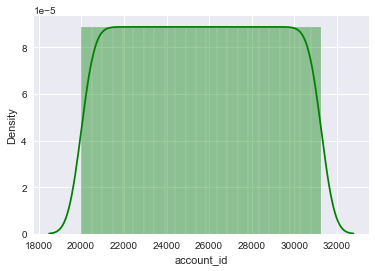

-------------------------------------
Boxplot of account_id
-------------------------------------


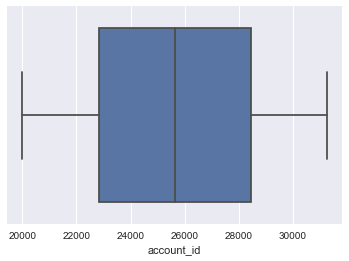

-------------------------------------
 
Description of Churn
-------------------------------------
count    11260.000000
mean         0.168384
std          0.374223
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Churn, dtype: float64
-------------------------------------
Distribution of Churn
-------------------------------------


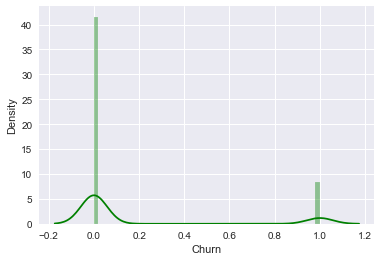

-------------------------------------
Boxplot of Churn
-------------------------------------


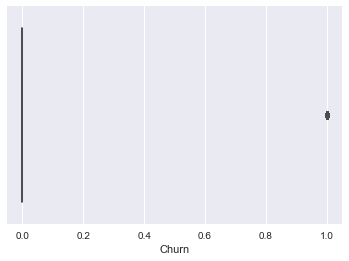

-------------------------------------
 
Description of city_tier
-------------------------------------
count    11148.000000
mean         1.653929
std          0.915015
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: city_tier, dtype: float64
-------------------------------------
Distribution of city_tier
-------------------------------------


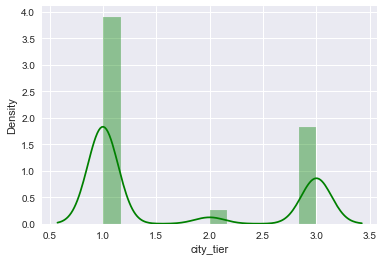

-------------------------------------
Boxplot of city_tier
-------------------------------------


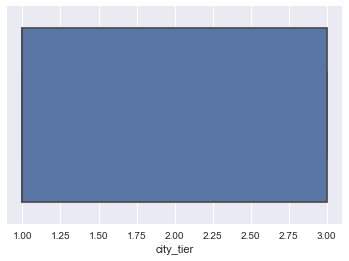

-------------------------------------
 
Description of cust_care_contacts_12m
-------------------------------------
count    11158.000000
mean        17.867091
std          8.853269
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: cust_care_contacts_12m, dtype: float64
-------------------------------------
Distribution of cust_care_contacts_12m
-------------------------------------


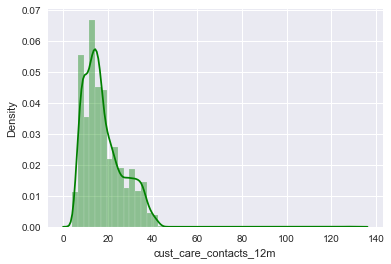

-------------------------------------
Boxplot of cust_care_contacts_12m
-------------------------------------


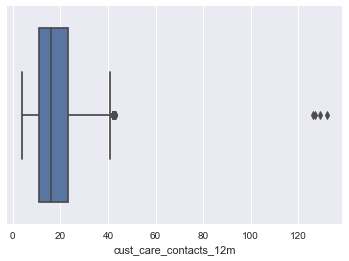

-------------------------------------
 
Description of service_score
-------------------------------------
count    11162.000000
mean         2.902526
std          0.725584
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: service_score, dtype: float64
-------------------------------------
Distribution of service_score
-------------------------------------


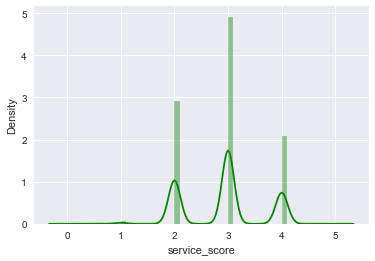

-------------------------------------
Boxplot of service_score
-------------------------------------


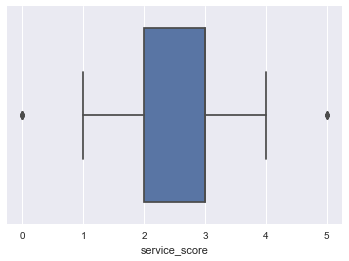

-------------------------------------
 
Description of cc_agent_score
-------------------------------------
count    11144.000000
mean         3.066493
std          1.379772
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: cc_agent_score, dtype: float64
-------------------------------------
Distribution of cc_agent_score
-------------------------------------


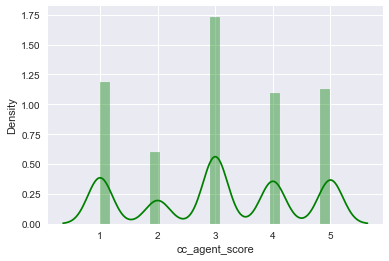

-------------------------------------
Boxplot of cc_agent_score
-------------------------------------


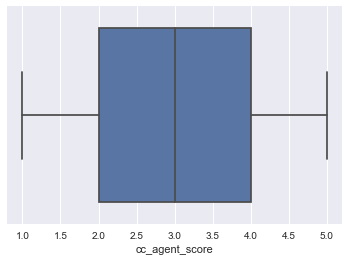

-------------------------------------
 
Description of account_complaints_12m
-------------------------------------
count    10903.000000
mean         0.285334
std          0.451594
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: account_complaints_12m, dtype: float64
-------------------------------------
Distribution of account_complaints_12m
-------------------------------------


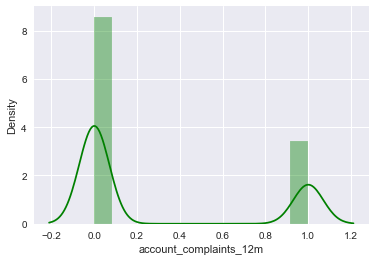

-------------------------------------
Boxplot of account_complaints_12m
-------------------------------------


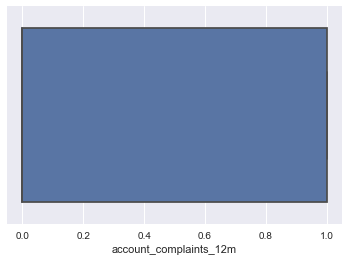

-------------------------------------
 


In [21]:
for column in numeric_cols:
    UnivariateAnalysis(column,20)

In [22]:
### Calculating outlier proportion

In [23]:
#function to calculate outlier proportion
def get_outlier_proportion(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    #calculation for proportion
    temp=[]
    for i in col:
        if(i>upper_range) or (i<lower_range):
            temp.append(i)
    proportion = len(temp)/len(col)
    return proportion

In [24]:
print('Proportion of outliers')
for i in df.select_dtypes(exclude='object').columns:
    print('{column}: {proportion: .2f}%' .format(column=i, proportion=(get_outlier_proportion(df[i])*100)))

Proportion of outliers
account_id:  0.00%
Churn:  16.84%
city_tier:  0.00%
cust_care_contacts_12m:  0.00%
service_score:  0.00%
cc_agent_score:  0.00%
account_complaints_12m:  0.00%


In [25]:
### Multivariate analysis

In [26]:
corr = df.corr(method='pearson')

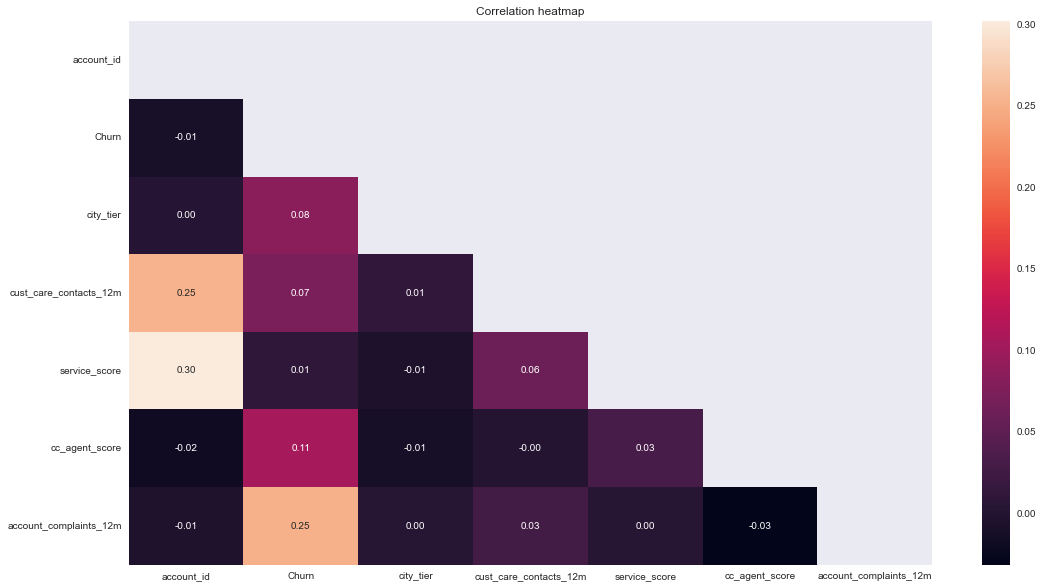

In [27]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig = plt.subplots(figsize=(18, 10))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='rocket')
plt.title('Correlation heatmap')
plt.show()

In [28]:
### Pair plot

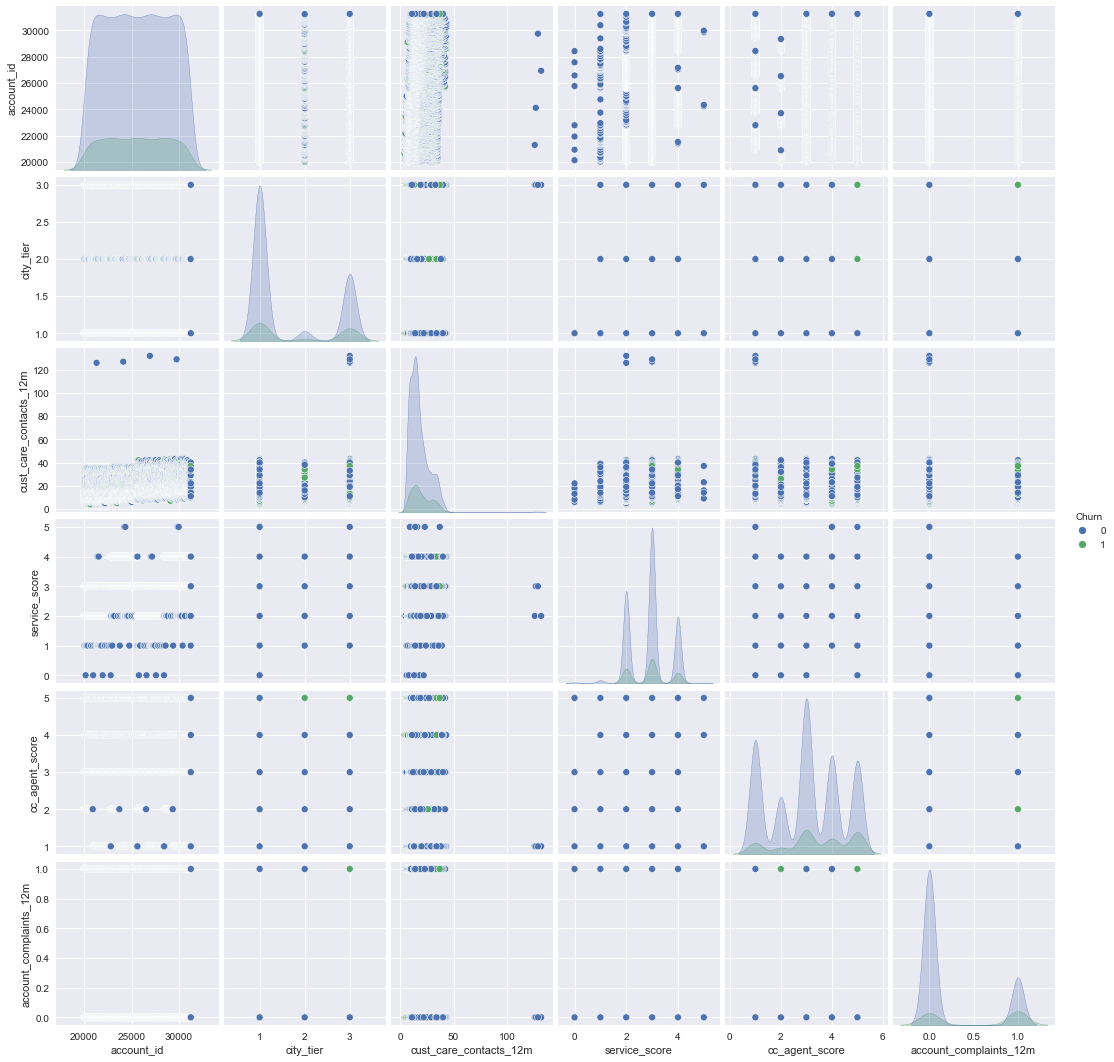

In [29]:
sns.pairplot(data=df, diag_kind='kde', hue='Churn')
plt.show()

In [30]:
### Removing account id columns

In [31]:
df =df.drop(columns='account_id',axis=1)
df.head()

Churn account_tenure  city_tier  cust_care_contacts_12m payment_method  gender  service_score customers_per_account account_segment  cc_agent_score marital_Status revenue_per_month  account_complaints_12m rev_growth_yoy coupons_used days_since_cc_contact cashback login_device
0      1              4        3.0                     6.0     Debit Card  Female            3.0                     3           Super             2.0         Single                 9                     1.0             11            1                     5   159.93       Mobile
1      1              0        1.0                     8.0            UPI    Male            3.0                     4    Regular Plus             3.0         Single                 7                     1.0             15            0                     0    120.9       Mobile
2      1              0        1.0                    30.0     Debit Card    Male            2.0                     4    Regular Plus             3.0         Single                 6                     1.0             14            0                     3      NaN       Mobile
3      1              0        3.0                    15.0     Debit Card    Male            2.0                     4           Super             5.0         Single                 8                     0.0             23            0                     3   134.07       Mobile
4      1              0        1.0                    12.0    Credit Card    Male            2.0                     3    Regular Plus             5.0         Single                 3                     0.0             11            1                     3    129.6       Mobile

In [32]:
# Check skewness of data
print("Skewness of dataset is as below")
pd.DataFrame(data = [df.skew()], index=['Skewness']).T.round(2)

Skewness of dataset is as below


Skewness
Churn                       1.77
city_tier                   0.74
cust_care_contacts_12m      1.42
service_score               0.00
cc_agent_score             -0.14
account_complaints_12m      0.95

In [33]:
#checking standard deviations of each variable
print("Standard deviation of variables")
print(df.std())

Standard deviation of variables
Churn                     0.374223
city_tier                 0.915015
cust_care_contacts_12m    8.853269
service_score             0.725584
cc_agent_score            1.379772
account_complaints_12m    0.451594
dtype: float64


<AxesSubplot:>

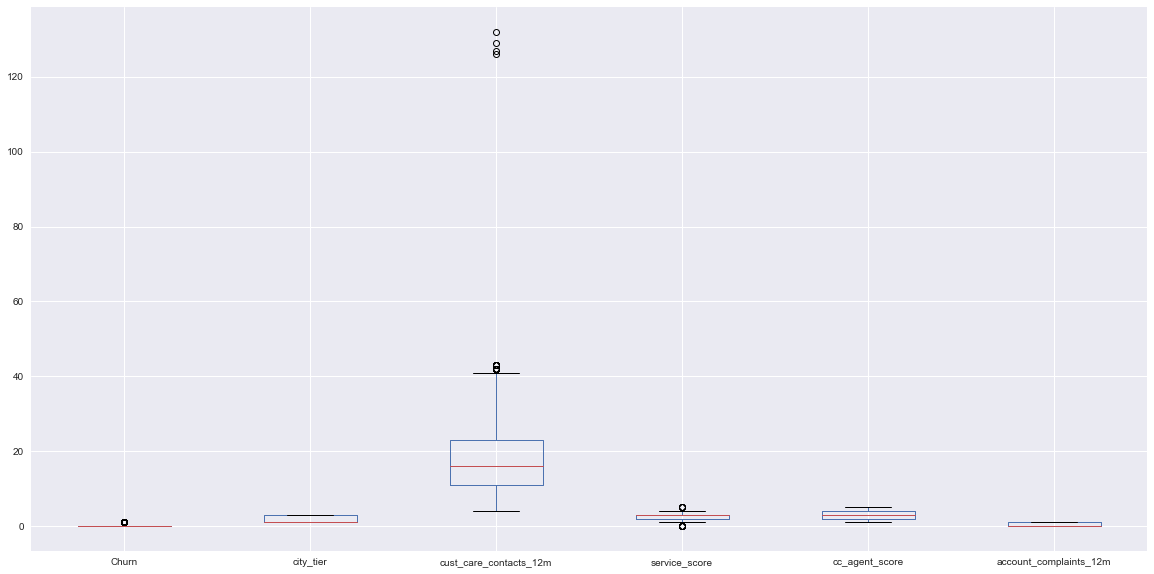

In [34]:
# to perform uni-variate analysis on continous variable, lets plot the box plots and distribution plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#checking for outliers using box plot
df.boxplot(figsize=(20,10))

In [35]:
# lets check the percentage of outlier in each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()/df.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)

outlier %
Churn                       16.84
account_complaints_12m       0.00
account_segment              0.00
account_tenure               0.00
cashback                     0.00
cc_agent_score               0.00
city_tier                    0.00
coupons_used                 0.00
cust_care_contacts_12m       0.37
customers_per_account        0.00
days_since_cc_contact        0.00
gender                       0.00
login_device                 0.00
marital_Status               0.00
payment_method               0.00
rev_growth_yoy               0.00
revenue_per_month            0.00
service_score                0.12

In [36]:
### Univariate analysis on categorical values

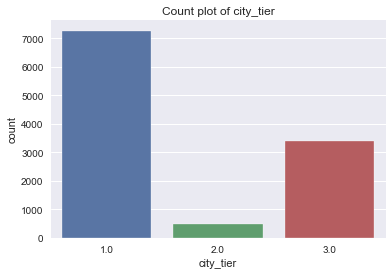

In [37]:
plt.title("Count plot of city_tier")
sns.countplot(df["city_tier"]);

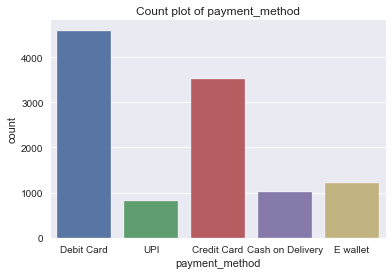

In [38]:
plt.title("Count plot of payment_method")
sns.countplot(df["payment_method"]);

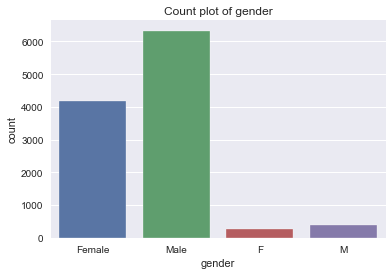

In [39]:
plt.title("Count plot of gender")
sns.countplot(df["gender"]);

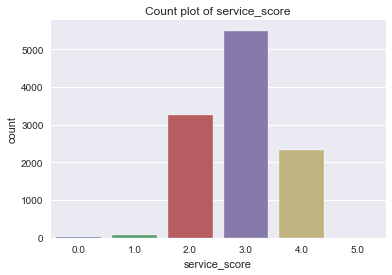

In [40]:
plt.title("Count plot of service_score")
sns.countplot(df["service_score"]);

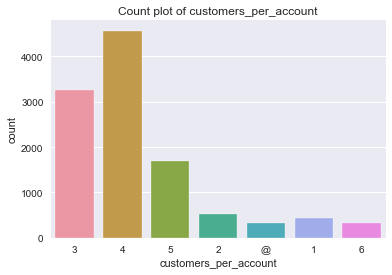

In [41]:
plt.title("Count plot of customers_per_account")
sns.countplot(df["customers_per_account"]);

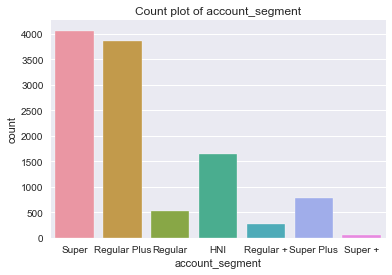

In [42]:
plt.title("Count plot of account_segment")
sns.countplot(df["account_segment"]);

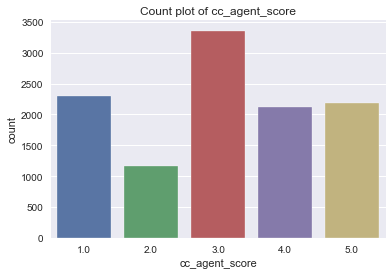

In [43]:
plt.title("Count plot of cc_agent_score")
sns.countplot(df["cc_agent_score"]);

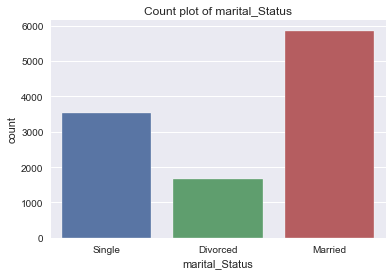

In [44]:
plt.title("Count plot of marital_Status")
sns.countplot(df["marital_Status"]);

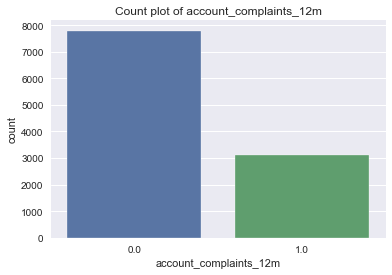

In [45]:
plt.title("Count plot of account_complaints_12m")
sns.countplot(df["account_complaints_12m"]);

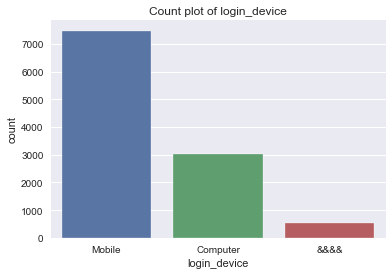

In [46]:
plt.title("Count plot of login_device")
sns.countplot(df["login_device"]);

In [47]:
### Bi-Variate and multi variate analysis

<Figure size 432x288 with 0 Axes>

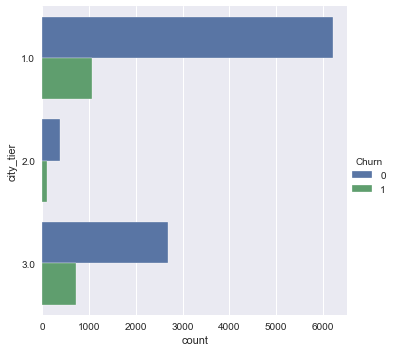

In [48]:
plt.suptitle("city_tier versus Churn")
sns.catplot(y="city_tier", hue="Churn", kind="count", data=df)

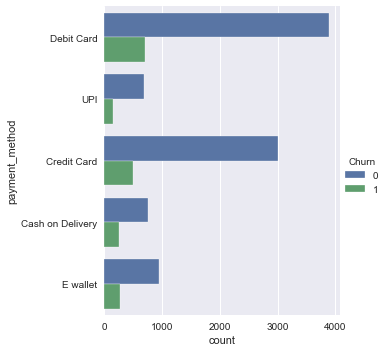

In [49]:
sns.catplot(y="payment_method", hue="Churn", kind="count", data=df)

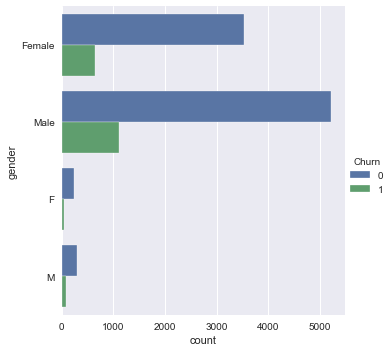

In [50]:
sns.catplot(y="gender", hue="Churn", kind="count", data=df)

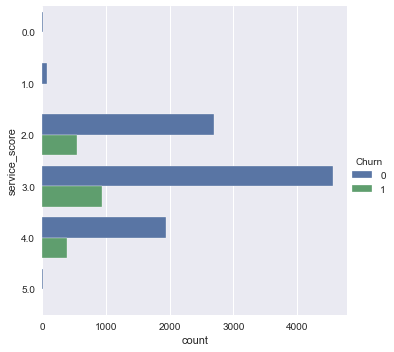

In [51]:
sns.catplot(y="service_score", hue="Churn", kind="count", data=df)

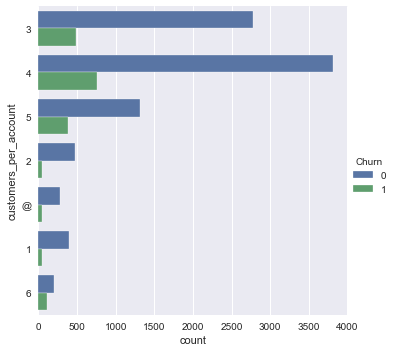

In [52]:
sns.catplot(y="customers_per_account", hue="Churn", kind="count", data=df)

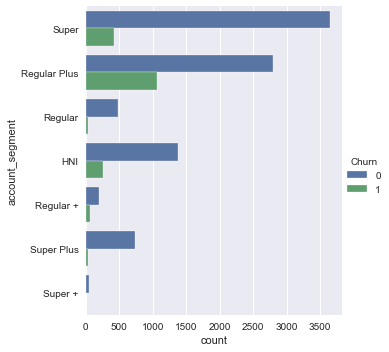

In [53]:
sns.catplot(y="account_segment", hue="Churn", kind="count", data=df)

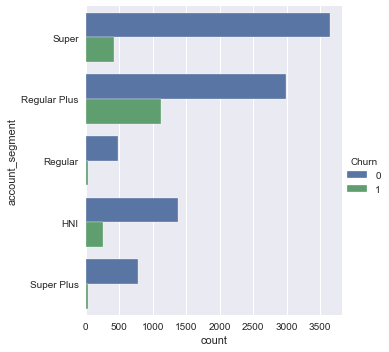

In [54]:
df['account_segment'] = df['account_segment'].replace('Super +','Super Plus')
df['account_segment'] = df['account_segment'].replace('Regular +','Regular Plus')
sns.catplot(y="account_segment", hue="Churn", kind="count", data=df)

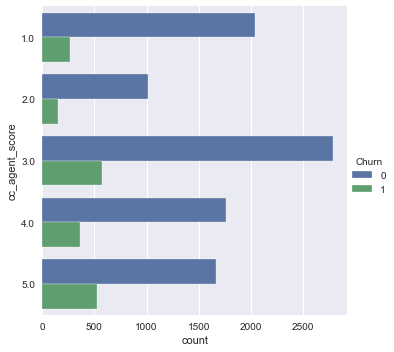

In [55]:
sns.catplot(y="cc_agent_score", hue="Churn", kind="count", data=df)

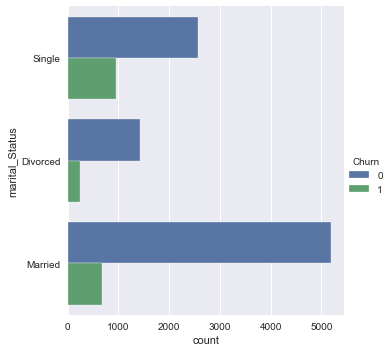

In [56]:
sns.catplot(y="marital_Status", hue="Churn", kind="count", data=df)

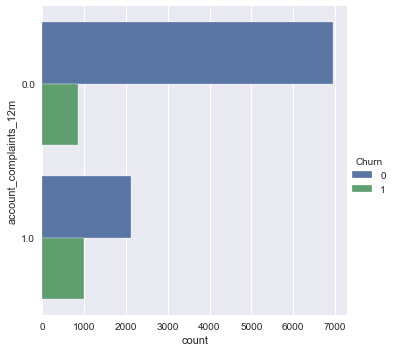

In [57]:
sns.catplot(y="account_complaints_12m", hue="Churn", kind="count", data=df)

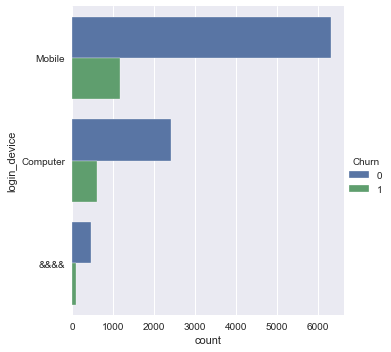

In [58]:
sns.catplot(y="login_device", hue="Churn", kind="count", data=df)

In [59]:
# checking data distribution of categorical object data types
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

ACCOUNT_TENURE :  38
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: account_tenure, dtype: int64


PAYMENT_METHOD :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: payment_method, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: gender, dtype: int64


CUSTOMERS_PER_ACCOUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: customers_per_account, dtype: int64


ACCOUNT_SEGMENT :  5
Regular          520
Super Plus       818
HNI             1639
Super           

## Removing duplicates

In [60]:
# check for duplicate columns

print("Number of duplicate rows:", df.duplicated().sum())
df[df.duplicated()]

Number of duplicate rows: 259


Churn account_tenure  city_tier  cust_care_contacts_12m    payment_method  gender  service_score customers_per_account account_segment  cc_agent_score marital_Status revenue_per_month  account_complaints_12m rev_growth_yoy coupons_used days_since_cc_contact cashback login_device
1347      1              0        1.0                     8.0               UPI    Male            3.0                     4    Regular Plus             3.0         Single                 7                     1.0             15            0                     0    120.9       Mobile
1395      1             11        1.0                     6.0        Debit Card    Male            3.0                     4             HNI             3.0         Single                10                     1.0             13            0                     0   153.81       Mobile
1456      1              0        1.0                    13.0        Debit Card    Male            3.0                     5           Super             3.0         Single                 2                     1.0             24            1                     6   160.74     Computer
1485      1              0        1.0                    15.0       Credit Card  Female            2.0                     3    Regular Plus             5.0         Single                 8                     0.0             22            1                     4      142       Mobile
1498      0             18        1.0                    15.0        Debit Card    Male            2.0                     3           Super             4.0        Married                 9                     0.0             18            1                    15   123.48       Mobile
1514      0              5        1.0                    12.0        Debit Card    Male            2.0                     3    Regular Plus             3.0         Single                 4                     0.0             20            0                     4   130.38       Mobile
1516      1              0        3.0                     6.0  Cash on Delivery  Female            3.0                     5    Regular Plus             5.0         Single                 1                     0.0             21            1                     0   123.25     Computer
1542      0             15        1.0                    27.0       Credit Card  Female            2.0                     3           Super             3.0        Married                 3                     0.0             16            0                     2   152.65     Computer
1547      0              7        1.0                    16.0       Credit Card    Male            2.0                     3    Regular Plus             3.0        Married                 2                     1.0             17            2                     0   138.15     Computer
1568      0             11        3.0                     9.0        Debit Card    Male            3.0                     3             HNI             3.0        Married                 1                     0.0             12            1                    13   206.09       Mobile
1607      0              5        1.0                     8.0  Cash on Delivery    Male            2.0                     4           Super             5.0         Single                 5                     0.0             13            0                     4   121.76       Mobile
1619      0              0        1.0                     9.0       Credit Card    Male            3.0                     4    Regular Plus             3.0         Single                 2                     0.0             17            1                     0    132.3       Mobile
1635      0             22        1.0                    16.0        Debit Card  Female            2.0                     3         Regular             5.0         Single                10                     1.0             11            0                     2   286.65     Computer
17

In [61]:
print('Before removing the duplicate rows',df.shape)
df.drop_duplicates(inplace=True) 
print('After removing the duplicate rows',df.shape)

Before removing the duplicate rows (11260, 18)
After removing the duplicate rows (11001, 18)


In [62]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


# Treating Bad data

# Treating the variable "account_tenure" 

In [63]:
df["account_tenure"].unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [64]:
df['account_tenure'] = df['account_tenure'].replace('#',np.NaN)

In [65]:
df['account_tenure'] = df['account_tenure'].astype('Int64')

In [66]:
df["account_tenure"].unique()

<IntegerArray>
[4, 0, 2, 13, 11, <NA>, 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1, 23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, 27, 12, 21, 17, 50, 60, 31, 51, 61]
Length: 38, dtype: Int64

In [67]:
df['account_tenure'] = df['account_tenure'].fillna(df['account_tenure'].median())

In [68]:
df["account_tenure"].unique()

<IntegerArray>
[4, 0, 2, 13, 11, 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1, 23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, 27, 12, 21, 17, 50, 60, 31, 51, 61]
Length: 37, dtype: Int64

In [69]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                 112
cust_care_contacts_12m    102
payment_method            109
gender                    108
service_score              98
customers_per_account     112
account_segment            97
cc_agent_score            116
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

# Treating the variable "city_tier"

In [70]:
df["city_tier"].unique()

array([ 3.,  1., nan,  2.])

In [71]:
df['city_tier'] = df['city_tier'].fillna(df['city_tier'].mode()[0])

In [72]:
df["city_tier"].unique()

array([3., 1., 2.])

In [73]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m    102
payment_method            109
gender                    108
service_score              98
customers_per_account     112
account_segment            97
cc_agent_score            116
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [74]:
df['city_tier'] = df['city_tier'].astype('Int64')

In [75]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m    float64
payment_method             object
gender                     object
service_score             float64
customers_per_account      object
account_segment            object
cc_agent_score            float64
marital_Status             object
revenue_per_month          object
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

# Treating the variable "cust_care_contacts_12m"

In [76]:
df["cust_care_contacts_12m"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [77]:
df['cust_care_contacts_12m'] = df['cust_care_contacts_12m'].fillna(df['cust_care_contacts_12m'].median())

In [78]:
df["cust_care_contacts_12m"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  34.,   5.,   4., 126.,   7.,
        36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43., 129.])

In [79]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method            109
gender                    108
service_score              98
customers_per_account     112
account_segment            97
cc_agent_score            116
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [80]:
df['cust_care_contacts_12m'] = df['cust_care_contacts_12m'].astype('Int64')

In [81]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method             object
gender                     object
service_score             float64
customers_per_account      object
account_segment            object
cc_agent_score            float64
marital_Status             object
revenue_per_month          object
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

# Treating the variable "payment_method"

In [82]:
df["payment_method"].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [83]:
df['payment_method'] = df['payment_method'].fillna(df['payment_method'].mode()[0])

In [84]:
df['payment_method'] = df['payment_method'].replace('Debit Card','1')
df['payment_method'] = df['payment_method'].replace('UPI','2')
df['payment_method'] = df['payment_method'].replace('Credit Card','3')
df['payment_method'] = df['payment_method'].replace('Cash on Delivery','4')
df['payment_method'] = df['payment_method'].replace('E wallet','5')

In [85]:
df["payment_method"].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [86]:
df['payment_method'] = df['payment_method'].astype('float64')

In [87]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                     object
service_score             float64
customers_per_account      object
account_segment            object
cc_agent_score            float64
marital_Status             object
revenue_per_month          object
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

In [88]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                    108
service_score              98
customers_per_account     112
account_segment            97
cc_agent_score            116
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

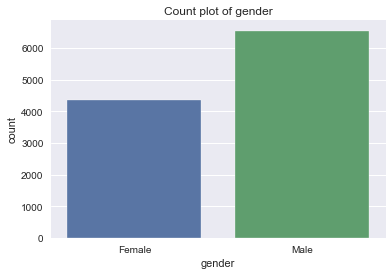

In [89]:

df['gender'] = df['gender'].replace('F','Female')
df['gender'] = df['gender'].replace('M','Male')
plt.title("Count plot of gender")
sns.countplot(df["gender"]);

# Treating the variable "gender"

In [90]:
df["gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [91]:
df['gender'] = df['gender'].replace('Female','1')
df['gender'] = df['gender'].replace('F','1')
df['gender'] = df['gender'].replace('Male','2')
df['gender'] = df['gender'].replace('M','2')

In [92]:
df["gender"].unique()

array(['1', '2', nan], dtype=object)

In [93]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [94]:
df["gender"].unique()

array(['1', '2'], dtype=object)

In [95]:
df['gender'] = df['gender'].astype('float64')

In [96]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score              98
customers_per_account     112
account_segment            97
cc_agent_score            116
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

# Treating the variable "service_score"

In [97]:
df["service_score"].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [98]:
df['service_score'] = df['service_score'].fillna(df['service_score'].mode()[0])

In [99]:
df["service_score"].unique()

array([3., 2., 1., 0., 4., 5.])

In [100]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account     112
account_segment            97
cc_agent_score            116
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [101]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account      object
account_segment            object
cc_agent_score            float64
marital_Status             object
revenue_per_month          object
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

# Treating the variable "customers_per_account"

In [102]:
df["customers_per_account"].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [103]:
df['customers_per_account'] = df['customers_per_account'].replace('@',np.NaN)

In [104]:
df["customers_per_account"].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [105]:
df['customers_per_account'] = df['customers_per_account'].fillna(df['customers_per_account'].median())

In [106]:
df["customers_per_account"].unique()

array([3., 4., 5., 2., 1., 6.])

In [107]:
df['customers_per_account'] = df['customers_per_account'].astype('float64')

In [108]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment            97
cc_agent_score            116
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [109]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment            object
cc_agent_score            float64
marital_Status             object
revenue_per_month          object
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

# Tretaing the variable "account_segment"

In [110]:
df["account_segment"].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus'],
      dtype=object)

In [111]:
df['account_segment'] = df['account_segment'].replace('Super','3')
df['account_segment'] = df['account_segment'].replace('Regular Plus','2')
df['account_segment'] = df['account_segment'].replace('Regular +','2')
df['account_segment'] = df['account_segment'].replace('Regular','1')
df['account_segment'] = df['account_segment'].replace('HNI','5')
df['account_segment'] = df['account_segment'].replace('Super Plus','4')
df['account_segment'] = df['account_segment'].replace('Super +','4')

In [112]:
df["account_segment"].unique()

array(['3', '2', '1', '5', nan, '4'], dtype=object)

In [113]:
df['account_segment'] = df['account_segment'].fillna(df['account_segment'].mode()[0])

In [114]:
df["account_segment"].unique()

array(['3', '2', '1', '5', '4'], dtype=object)

In [115]:
df['account_segment'] = df['account_segment'].astype('float64')

In [116]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment             0
cc_agent_score            116
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [117]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status             object
revenue_per_month          object
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

# Treating the variable "CC_Agent_Score"

In [118]:
df["cc_agent_score"].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [119]:
df['cc_agent_score'] = df['cc_agent_score'].fillna(df['cc_agent_score'].mode()[0])

In [120]:
df["cc_agent_score"].unique()

array([2., 3., 5., 4., 1.])

In [121]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment             0
cc_agent_score              0
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [122]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status             object
revenue_per_month          object
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

# Treating the variable "Marital_Status"

In [123]:
df["marital_Status"].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [124]:
df['marital_Status'] = df['marital_Status'].fillna(df['marital_Status'].mode()[0])

In [125]:
df["marital_Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [126]:
df['marital_Status'] = df['marital_Status'].replace('Single','1')
df['marital_Status'] = df['marital_Status'].replace('Divorced','2')
df['marital_Status'] = df['marital_Status'].replace('Married','3')

In [127]:
df['marital_Status'] = df['marital_Status'].astype('float64')

In [128]:
df["marital_Status"].unique()

array([1., 2., 3.])

In [129]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment             0
cc_agent_score              0
marital_Status              0
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [130]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status            float64
revenue_per_month          object
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

# Treating the variable "revenue_per_month"

In [131]:
df["revenue_per_month"].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [132]:
df['revenue_per_month'] = df['revenue_per_month'].replace('+',np.NaN)

In [133]:
df["revenue_per_month"].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [134]:
df['revenue_per_month'] = df['revenue_per_month'].fillna(df['revenue_per_month'].median())

In [135]:
df['revenue_per_month'] = df['revenue_per_month'].astype('float64')

In [136]:
df["revenue_per_month"].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5., 130.,
        19., 139., 102., 120., 138., 127., 123., 124., 116.,  21., 126.,
       134., 113., 114., 108., 140., 133., 129., 107., 118.,  11., 105.,
        20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,  13.,
        12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135., 111.,
       109., 100., 103.])

In [137]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment             0
cc_agent_score              0
marital_Status              0
revenue_per_month           0
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [138]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

# Treating the variable "account_complaints_12m"

In [139]:
df["account_complaints_12m"].unique()

array([ 1.,  0., nan])

In [140]:
df['account_complaints_12m'] = df['account_complaints_12m'].fillna(df['account_complaints_12m'].mode()[0])

In [141]:
df["account_complaints_12m"].unique()

array([1., 0.])

In [142]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment             0
cc_agent_score              0
marital_Status              0
revenue_per_month           0
account_complaints_12m      0
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [143]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

# treating the variable 'rev_growth_yoy'

In [144]:
df["rev_growth_yoy"].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [145]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$',np.NaN)

In [146]:
df["rev_growth_yoy"].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [147]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].median())

In [148]:
df["rev_growth_yoy"].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26.,  4., 27., 28.])

In [149]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].astype('float64')

In [150]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment             0
cc_agent_score              0
marital_Status              0
revenue_per_month           0
account_complaints_12m      0
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [151]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy            float64
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

# Treating the variable "coupons_used"

In [152]:
df["coupons_used"].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [153]:
df['coupons_used'] = df['coupons_used'].replace('#',np.NaN)
df['coupons_used'] = df['coupons_used'].replace('$',np.NaN)
df['coupons_used'] = df['coupons_used'].replace('*',np.NaN)

In [154]:
df["coupons_used"].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [155]:
df['coupons_used'] = df['coupons_used'].fillna(df['coupons_used'].median())

In [156]:
df["coupons_used"].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., 14., 16.])

In [157]:
df['coupons_used'] = df['coupons_used'].astype('float64')

In [158]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment             0
cc_agent_score              0
marital_Status              0
revenue_per_month           0
account_complaints_12m      0
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [159]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy            float64
coupons_used              float64
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

# Treating the variable "Day_Since_CC_connect"

In [160]:
df["days_since_cc_contact"].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [161]:
df['days_since_cc_contact'] = df['days_since_cc_contact'].replace('$',np.NaN)

In [162]:
df["days_since_cc_contact"].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [163]:
df['days_since_cc_contact'] = df['days_since_cc_contact'].fillna(df['days_since_cc_contact'].median())

In [164]:
df["days_since_cc_contact"].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., 11., 10.,  9.,
       13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [165]:
df['days_since_cc_contact'] = df['days_since_cc_contact'].astype('float64')

In [166]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment             0
cc_agent_score              0
marital_Status              0
revenue_per_month           0
account_complaints_12m      0
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact       0
cashback                  471
login_device              221
dtype: int64

In [167]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy            float64
coupons_used              float64
days_since_cc_contact     float64
cashback                   object
login_device               object
dtype: object

# Treating the variable "cashback"

In [168]:
df["cashback"].unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [169]:
df['cashback'] = df['cashback'].replace('$',np.NaN)

In [170]:
df['cashback'] = df['cashback'].fillna(df['cashback'].median())

In [171]:
df["cashback"].unique()

array([159.93, 120.9 , 165.63, ..., 227.36, 226.91, 191.42])

In [172]:
df['cashback'] = df['cashback'].astype('float64')

In [173]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment             0
cc_agent_score              0
marital_Status              0
revenue_per_month           0
account_complaints_12m      0
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact       0
cashback                    0
login_device              221
dtype: int64

In [174]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy            float64
coupons_used              float64
days_since_cc_contact     float64
cashback                  float64
login_device               object
dtype: object

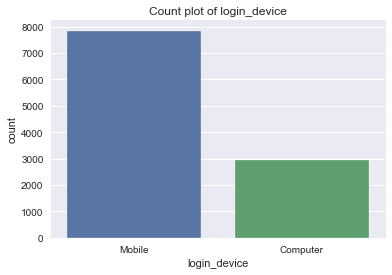

In [175]:
df['login_device'] = df['login_device'].replace('&&&&','Mobile')
plt.title("Count plot of login_device")
sns.countplot(df["login_device"]);

# Treating the variable "login_device"

In [176]:
df["login_device"].unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [177]:
df['login_device'] = df['login_device'].replace('&&&&',np.NaN)

In [178]:
df["login_device"].unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [179]:
df['login_device'] = df['login_device'].fillna(df['login_device'].mode()[0])

In [180]:
df["login_device"].unique()

array(['Mobile', 'Computer'], dtype=object)

In [181]:
df['login_device'] = df['login_device'].replace('Mobile','1')
df['login_device'] = df['login_device'].replace('Computer','2')

In [182]:
df["login_device"].unique()

array(['1', '2'], dtype=object)

In [183]:
df['login_device'] = df['login_device'].astype('float64')

In [185]:
def hist_boxplot(column,nbins):
    plt.figure()
    print('\033[1m'+ "Distribution of " + column + '\033[0m' + '\n')
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "BoxPlot of " + column + '\033[0m' + '\n')
    ax = sns.boxplot(x=df[column])
    plt.show()
    print("----------------------------------------------------------------------------")

Distribution of Churn



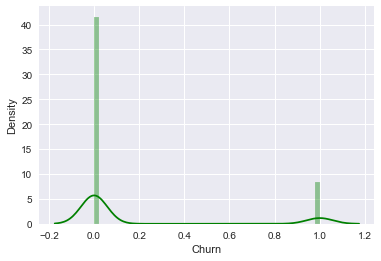

----------------------------------------------------------------------------
BoxPlot of Churn



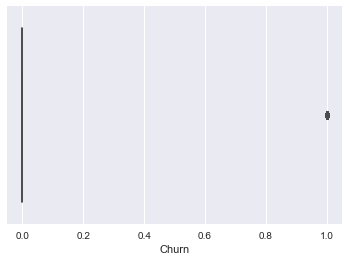

----------------------------------------------------------------------------
Distribution of account_tenure



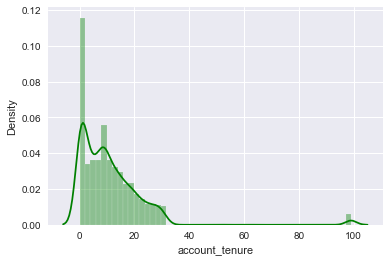

----------------------------------------------------------------------------
BoxPlot of account_tenure



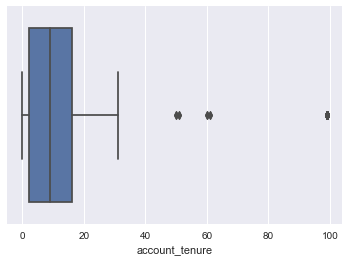

----------------------------------------------------------------------------
Distribution of city_tier



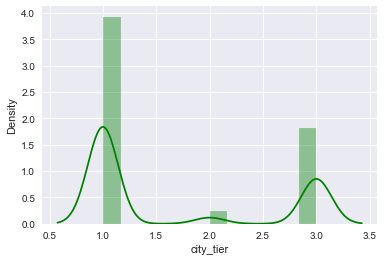

----------------------------------------------------------------------------
BoxPlot of city_tier



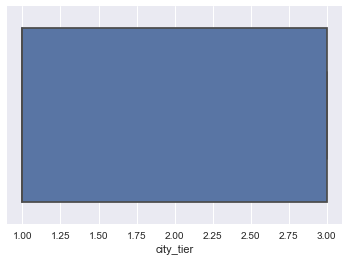

----------------------------------------------------------------------------
Distribution of cust_care_contacts_12m



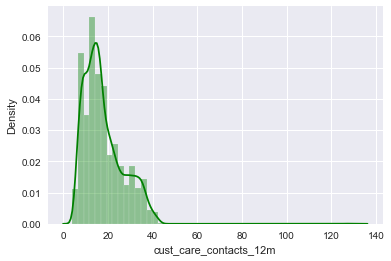

----------------------------------------------------------------------------
BoxPlot of cust_care_contacts_12m



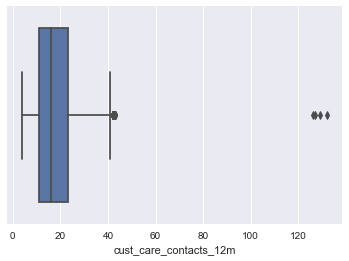

----------------------------------------------------------------------------
Distribution of payment_method



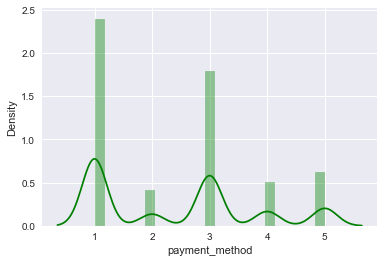

----------------------------------------------------------------------------
BoxPlot of payment_method



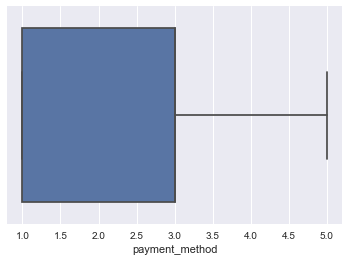

----------------------------------------------------------------------------
Distribution of gender



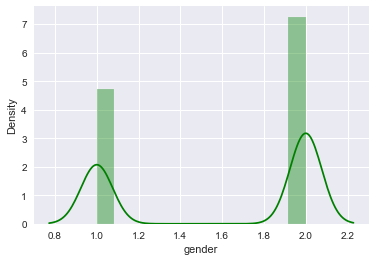

----------------------------------------------------------------------------
BoxPlot of gender



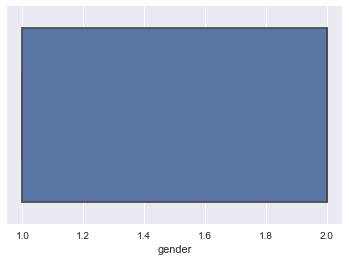

----------------------------------------------------------------------------
Distribution of service_score



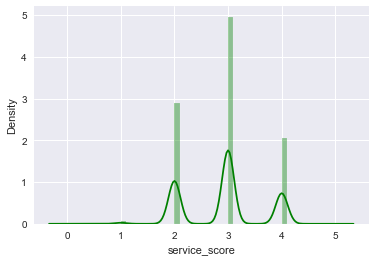

----------------------------------------------------------------------------
BoxPlot of service_score



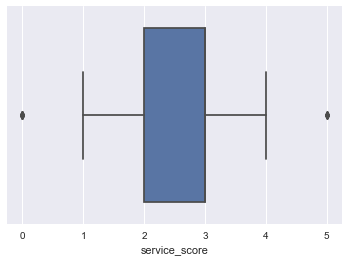

----------------------------------------------------------------------------
Distribution of customers_per_account



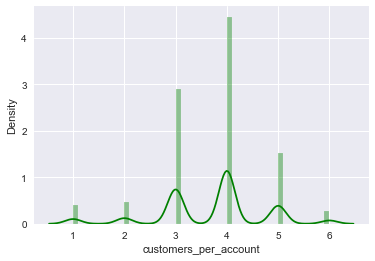

----------------------------------------------------------------------------
BoxPlot of customers_per_account



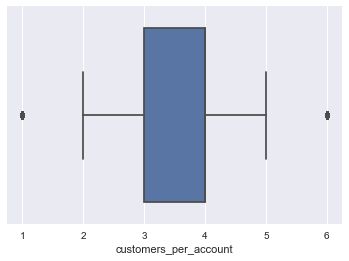

----------------------------------------------------------------------------
Distribution of account_segment



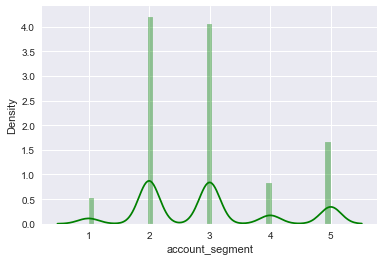

----------------------------------------------------------------------------
BoxPlot of account_segment



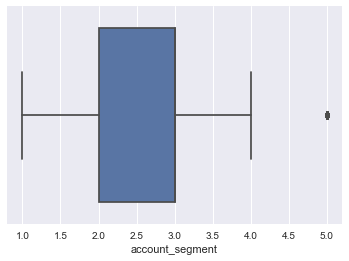

----------------------------------------------------------------------------
Distribution of cc_agent_score



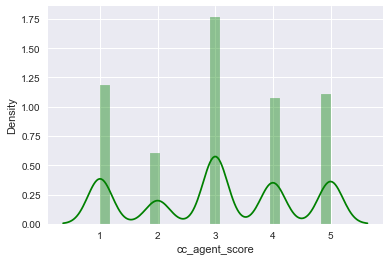

----------------------------------------------------------------------------
BoxPlot of cc_agent_score



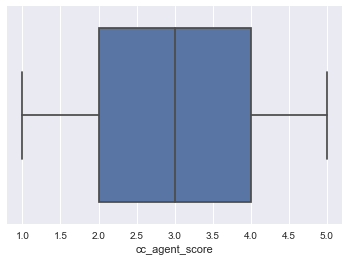

----------------------------------------------------------------------------
Distribution of marital_Status



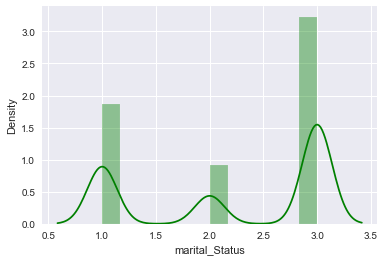

----------------------------------------------------------------------------
BoxPlot of marital_Status



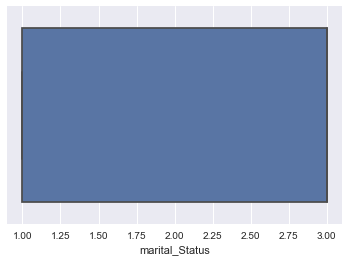

----------------------------------------------------------------------------
Distribution of revenue_per_month



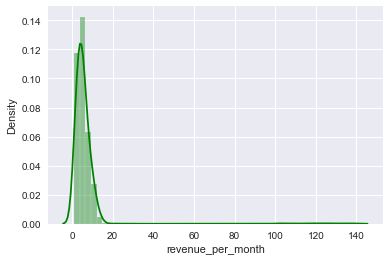

----------------------------------------------------------------------------
BoxPlot of revenue_per_month



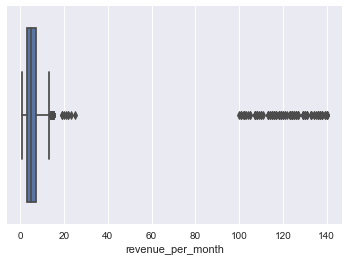

----------------------------------------------------------------------------
Distribution of account_complaints_12m



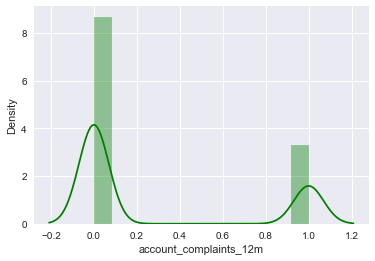

----------------------------------------------------------------------------
BoxPlot of account_complaints_12m



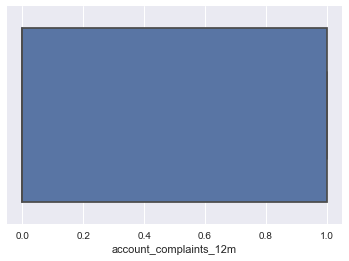

----------------------------------------------------------------------------
Distribution of rev_growth_yoy



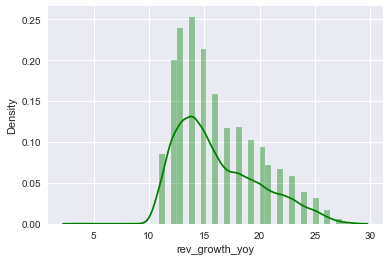

----------------------------------------------------------------------------
BoxPlot of rev_growth_yoy



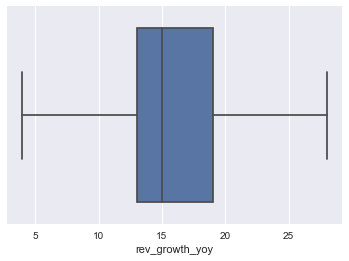

----------------------------------------------------------------------------
Distribution of coupons_used



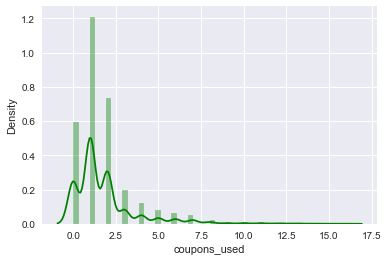

----------------------------------------------------------------------------
BoxPlot of coupons_used



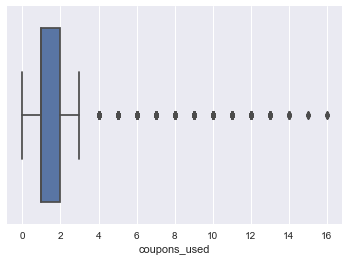

----------------------------------------------------------------------------
Distribution of days_since_cc_contact



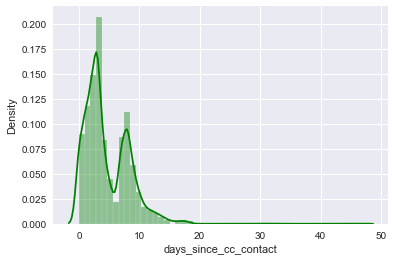

----------------------------------------------------------------------------
BoxPlot of days_since_cc_contact



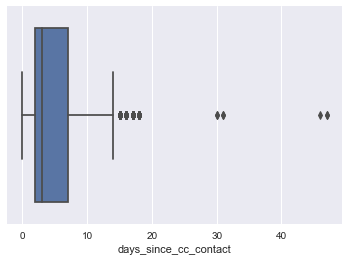

----------------------------------------------------------------------------
Distribution of cashback



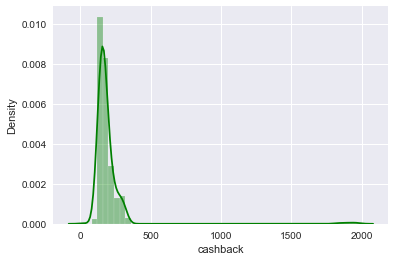

----------------------------------------------------------------------------
BoxPlot of cashback



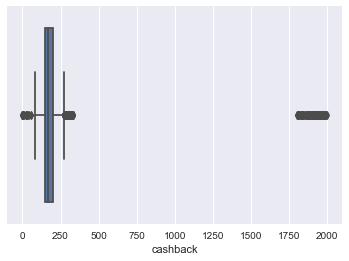

----------------------------------------------------------------------------
Distribution of login_device



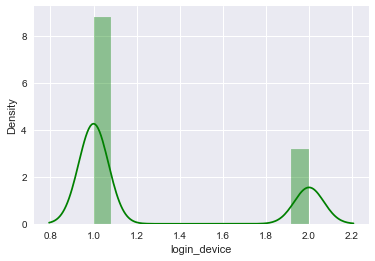

----------------------------------------------------------------------------
BoxPlot of login_device



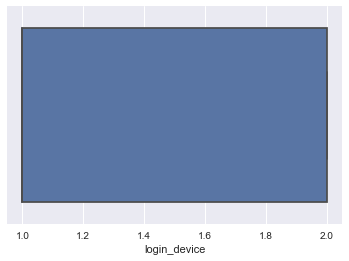

----------------------------------------------------------------------------


In [186]:
for column in list(df.select_dtypes(exclude='object').columns):
    hist_boxplot(column,20)

In [187]:
# Check skewness of data
print("Skewness of dataset is as below")
pd.DataFrame(data = [df.skew()], index=['Skewness']).T.round(2)

Skewness of dataset is as below


Skewness
Churn                       1.77
account_tenure              3.94
city_tier                   0.75
cust_care_contacts_12m      1.44
payment_method              0.46
gender                     -0.43
service_score              -0.00
customers_per_account      -0.44
account_segment             0.65
cc_agent_score             -0.13
marital_Status             -0.46
revenue_per_month           9.35
account_complaints_12m      1.00
rev_growth_yoy              0.75
coupons_used                2.55
days_since_cc_contact       1.33
cashback                    8.88
login_device                1.06

In [181]:
df.isnull().sum()

Churn                     0
account_tenure            0
city_tier                 0
cust_care_contacts_12m    0
payment_method            0
gender                    0
service_score             0
customers_per_account     0
account_segment           0
cc_agent_score            0
marital_Status            0
revenue_per_month         0
account_complaints_12m    0
rev_growth_yoy            0
coupons_used              0
days_since_cc_contact     0
cashback                  0
login_device              0
dtype: int64

In [182]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy            float64
coupons_used              float64
days_since_cc_contact     float64
cashback                  float64
login_device              float64
dtype: object

In [183]:
df.head().T

0      1       2       3      4
Churn                        1      1       1       1      1
account_tenure               4      0       0       0      0
city_tier                    3      1       1       3      1
cust_care_contacts_12m       6      8      30      15     12
payment_method             1.0    2.0     1.0     1.0    3.0
gender                     1.0    2.0     2.0     2.0    2.0
service_score              3.0    3.0     2.0     2.0    2.0
customers_per_account      3.0    4.0     4.0     4.0    3.0
account_segment            3.0    2.0     2.0     3.0    2.0
cc_agent_score             2.0    3.0     3.0     5.0    5.0
marital_Status             1.0    1.0     1.0     1.0    1.0
revenue_per_month          9.0    7.0     6.0     8.0    3.0
account_complaints_12m     1.0    1.0     1.0     0.0    0.0
rev_growth_yoy            11.0   15.0    14.0    23.0   11.0
coupons_used               1.0    0.0     0.0     0.0    1.0
days_since_cc_contact      5.0    0.0     3.0     3.0    3.0
cashback                159.93  120.9  165.63  134.07  129.6
login_device               1.0    1.0     1.0     1.0    1.0

<AxesSubplot:xlabel='Churn', ylabel='Density'>

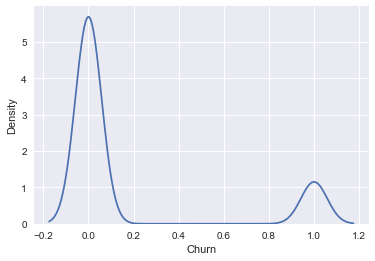

In [184]:
# checking if data is balanced
sns.kdeplot(data=df, x="Churn")

In [185]:
# lets check the percentage of outlier in each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()/df.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)

outlier %
Churn                       16.83
account_tenure               1.26
city_tier                    0.00
cust_care_contacts_12m       0.38
payment_method               0.00
gender                       0.00
service_score                0.12
customers_per_account        6.73
account_segment             14.68
cc_agent_score               0.00
marital_Status               0.00
revenue_per_month            1.68
account_complaints_12m       0.00
rev_growth_yoy               0.00
coupons_used                12.42
days_since_cc_contact        1.16
cashback                     8.59
login_device                 0.00

In [186]:
### EDA after data cleaning

In [187]:
# checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churn                   11001 non-null  int64  
 1   account_tenure          11001 non-null  Int64  
 2   city_tier               11001 non-null  Int64  
 3   cust_care_contacts_12m  11001 non-null  Int64  
 4   payment_method          11001 non-null  float64
 5   gender                  11001 non-null  float64
 6   service_score           11001 non-null  float64
 7   customers_per_account   11001 non-null  float64
 8   account_segment         11001 non-null  float64
 9   cc_agent_score          11001 non-null  float64
 10  marital_Status          11001 non-null  float64
 11  revenue_per_month       11001 non-null  float64
 12  account_complaints_12m  11001 non-null  float64
 13  rev_growth_yoy          11001 non-null  float64
 14  coupons_used            11001 non-null

In [188]:
# describing data
df.describe().T

count        mean         std  min     25%     50%     75%     max
Churn                   11001.0    0.168348    0.374192  0.0    0.00    0.00    0.00     1.0
account_tenure          11001.0   11.026179   12.847732  0.0    2.00    9.00   16.00    99.0
city_tier               11001.0    1.647941    0.913608  1.0    1.00    1.00    3.00     3.0
cust_care_contacts_12m  11001.0   17.873193    8.830928  4.0   11.00   16.00   23.00   132.0
payment_method          11001.0    2.398782    1.379972  1.0    1.00    3.00    3.00     5.0
gender                  11001.0    1.605036    0.488865  1.0    1.00    2.00    2.00     2.0
service_score           11001.0    2.901736    0.722796  0.0    2.00    3.00    3.00     5.0
customers_per_account   11001.0    3.705027    1.004165  1.0    3.00    4.00    4.00     6.0
account_segment         11001.0    2.900009    1.099918  1.0    2.00    3.00    3.00     5.0
cc_agent_score          11001.0    3.057268    1.373116  1.0    2.00    3.00    4.00     5.0
marital_Status          11001.0    2.228070    0.892431  1.0    1.00    3.00    3.00     3.0
revenue_per_month       11001.0    6.308790   11.612587  1.0    3.00    5.00    7.00   140.0
account_complaints_12m  11001.0    0.276520    0.447297  0.0    0.00    0.00    1.00     1.0
rev_growth_yoy          11001.0   16.206799    3.759624  4.0   13.00   15.00   19.00    28.0
coupons_used            11001.0    1.800927    1.976775  0.0    1.00    1.00    2.00    16.0
days_since_cc_contact   11001.0    4.593946    3.651465  0.0    2.00    3.00    7.00    47.0
cashback                11001.0  195.576494  176.843045  0.0  148.07  165.63  198.12  1997.0
login_device            11001.0    1.266612    0.442208  1.0    1.00    1.00    2.00     2.0

In [189]:
# describing data including object variable as well
df.describe(include='all').T

count        mean         std  min     25%     50%     75%     max
Churn                   11001.0    0.168348    0.374192  0.0    0.00    0.00    0.00     1.0
account_tenure          11001.0   11.026179   12.847732  0.0    2.00    9.00   16.00    99.0
city_tier               11001.0    1.647941    0.913608  1.0    1.00    1.00    3.00     3.0
cust_care_contacts_12m  11001.0   17.873193    8.830928  4.0   11.00   16.00   23.00   132.0
payment_method          11001.0    2.398782    1.379972  1.0    1.00    3.00    3.00     5.0
gender                  11001.0    1.605036    0.488865  1.0    1.00    2.00    2.00     2.0
service_score           11001.0    2.901736    0.722796  0.0    2.00    3.00    3.00     5.0
customers_per_account   11001.0    3.705027    1.004165  1.0    3.00    4.00    4.00     6.0
account_segment         11001.0    2.900009    1.099918  1.0    2.00    3.00    3.00     5.0
cc_agent_score          11001.0    3.057268    1.373116  1.0    2.00    3.00    4.00     5.0
marital_Status          11001.0    2.228070    0.892431  1.0    1.00    3.00    3.00     3.0
revenue_per_month       11001.0    6.308790   11.612587  1.0    3.00    5.00    7.00   140.0
account_complaints_12m  11001.0    0.276520    0.447297  0.0    0.00    0.00    1.00     1.0
rev_growth_yoy          11001.0   16.206799    3.759624  4.0   13.00   15.00   19.00    28.0
coupons_used            11001.0    1.800927    1.976775  0.0    1.00    1.00    2.00    16.0
days_since_cc_contact   11001.0    4.593946    3.651465  0.0    2.00    3.00    7.00    47.0
cashback                11001.0  195.576494  176.843045  0.0  148.07  165.63  198.12  1997.0
login_device            11001.0    1.266612    0.442208  1.0    1.00    1.00    2.00     2.0

In [190]:
# checking for null values
df.isnull().sum()

Churn                     0
account_tenure            0
city_tier                 0
cust_care_contacts_12m    0
payment_method            0
gender                    0
service_score             0
customers_per_account     0
account_segment           0
cc_agent_score            0
marital_Status            0
revenue_per_month         0
account_complaints_12m    0
rev_growth_yoy            0
coupons_used              0
days_since_cc_contact     0
cashback                  0
login_device              0
dtype: int64

In [191]:
# lets check the percentage of outlier in each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()/df.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)

outlier %
Churn                       16.83
account_tenure               1.26
city_tier                    0.00
cust_care_contacts_12m       0.38
payment_method               0.00
gender                       0.00
service_score                0.12
customers_per_account        6.73
account_segment             14.68
cc_agent_score               0.00
marital_Status               0.00
revenue_per_month            1.68
account_complaints_12m       0.00
rev_growth_yoy               0.00
coupons_used                12.42
days_since_cc_contact        1.16
cashback                     8.59
login_device                 0.00

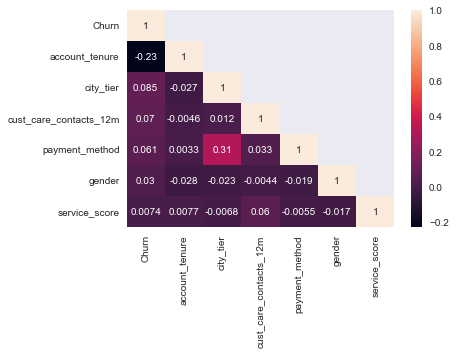

In [192]:
sns.heatmap(df[['Churn','account_tenure','city_tier','cust_care_contacts_12m','payment_method','gender','service_score']].corr(),
            annot=True,mask=np.triu(df[['Churn','account_tenure','city_tier','cust_care_contacts_12m','payment_method','gender','service_score']].corr(),+1));


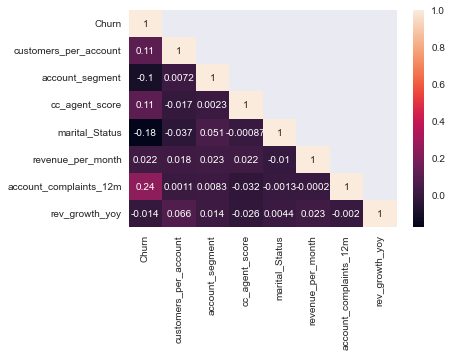

In [193]:
sns.heatmap(df[['Churn','customers_per_account','account_segment','cc_agent_score','marital_Status','revenue_per_month','account_complaints_12m','rev_growth_yoy']].corr(),
            annot=True,mask=np.triu(df[['Churn','customers_per_account','account_segment','cc_agent_score','marital_Status','revenue_per_month','account_complaints_12m','rev_growth_yoy']].corr(),+1));

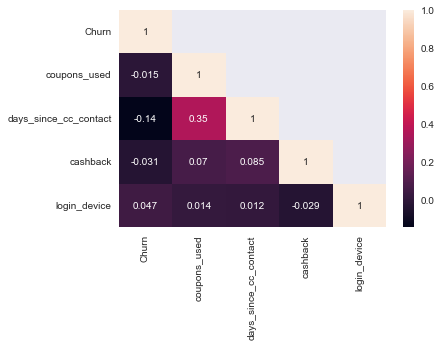

In [194]:
sns.heatmap(df[['Churn','coupons_used','days_since_cc_contact','cashback','login_device']].corr(),
            annot=True,mask=np.triu(df[['Churn','coupons_used','days_since_cc_contact','cashback','login_device']].corr(),+1));

In [195]:
### scaling data and outlier treatment

In [196]:
df['payment_method'] = df['payment_method'].astype('int64')
df['gender'] = df['gender'].astype('int64')
df['service_score'] = df['service_score'].astype('int64')
df['customers_per_account'] = df['customers_per_account'].astype('int64')
df['account_segment'] = df['account_segment'].astype('int64')
df['cc_agent_score'] = df['cc_agent_score'].astype('int64')
df['revenue_per_month'] = df['revenue_per_month'].astype('int64')
df['coupons_used'] = df['coupons_used'].astype('int64')
df['days_since_cc_contact'] = df['days_since_cc_contact'].astype('int64')
df['cashback'] = df['cashback'].astype('int64')
df['marital_Status'] = df['marital_Status'].astype('int64')
df['account_complaints_12m'] = df['account_complaints_12m'].astype('int64')
df['rev_growth_yoy'] = df['rev_growth_yoy'].astype('int64')
df['login_device'] = df['login_device'].astype('int64')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Churn                   11001 non-null  int64
 1   account_tenure          11001 non-null  Int64
 2   city_tier               11001 non-null  Int64
 3   cust_care_contacts_12m  11001 non-null  Int64
 4   payment_method          11001 non-null  int64
 5   gender                  11001 non-null  int64
 6   service_score           11001 non-null  int64
 7   customers_per_account   11001 non-null  int64
 8   account_segment         11001 non-null  int64
 9   cc_agent_score          11001 non-null  int64
 10  marital_Status          11001 non-null  int64
 11  revenue_per_month       11001 non-null  int64
 12  account_complaints_12m  11001 non-null  int64
 13  rev_growth_yoy          11001 non-null  int64
 14  coupons_used            11001 non-null  int64
 15  days_since_cc_conta

In [198]:
### Visualization before outlier treatment

<AxesSubplot:xlabel='account_tenure'>

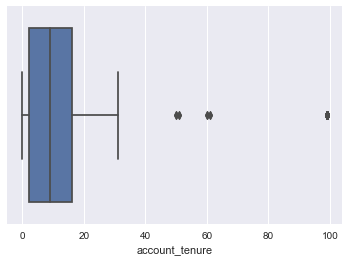

In [199]:
sns.boxplot(x="account_tenure", data = df)

<AxesSubplot:xlabel='cust_care_contacts_12m'>

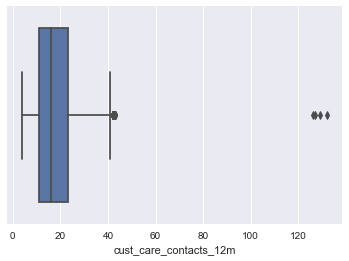

In [200]:
sns.boxplot(x="cust_care_contacts_12m", data = df)

<AxesSubplot:xlabel='customers_per_account'>

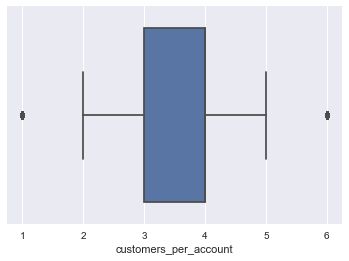

In [201]:
sns.boxplot(x="customers_per_account", data = df)

<AxesSubplot:xlabel='revenue_per_month'>

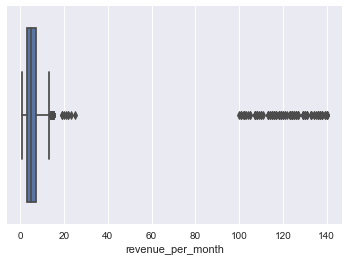

In [202]:
sns.boxplot(x="revenue_per_month", data = df)

<AxesSubplot:xlabel='rev_growth_yoy'>

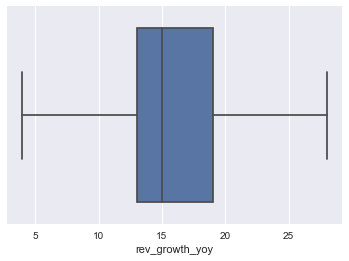

In [203]:
sns.boxplot(x="rev_growth_yoy", data = df)

<AxesSubplot:xlabel='coupons_used'>

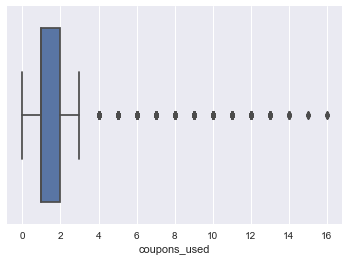

In [204]:
sns.boxplot(x="coupons_used", data = df)

<AxesSubplot:xlabel='days_since_cc_contact'>

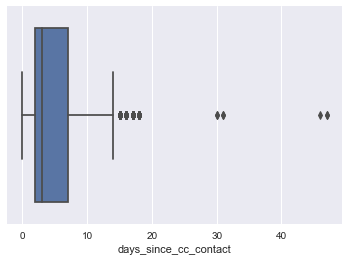

In [205]:
sns.boxplot(x="days_since_cc_contact", data = df)

<AxesSubplot:xlabel='cashback'>

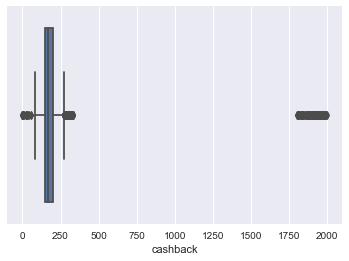

In [206]:
sns.boxplot(x="cashback", data = df)

In [207]:
#treating outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [208]:
lw,up=remove_outlier(df['account_tenure'])
df['account_tenure']=np.where(df['account_tenure']>up,up,df['account_tenure'])
df['account_tenure']=np.where(df['account_tenure']<lw,lw,df['account_tenure'])

lw,up=remove_outlier(df['cust_care_contacts_12m'])
df['cust_care_contacts_12m']=np.where(df['cust_care_contacts_12m']>up,up,df['cust_care_contacts_12m'])
df['cust_care_contacts_12m']=np.where(df['cust_care_contacts_12m']<lw,lw,df['cust_care_contacts_12m'])

lw,up=remove_outlier(df['customers_per_account'])
df['customers_per_account']=np.where(df['customers_per_account']>up,up,df['customers_per_account'])
df['customers_per_account']=np.where(df['customers_per_account']<lw,lw,df['customers_per_account'])

lw,up=remove_outlier(df['cashback'])
df['cashback']=np.where(df['cashback']>up,up,df['cashback'])
df['cashback']=np.where(df['cashback']<lw,lw,df['cashback'])

lw,up=remove_outlier(df['revenue_per_month'])
df['revenue_per_month']=np.where(df['revenue_per_month']>up,up,df['revenue_per_month'])
df['revenue_per_month']=np.where(df['revenue_per_month']<lw,lw,df['revenue_per_month'])

lw,up=remove_outlier(df['days_since_cc_contact'])
df['days_since_cc_contact']=np.where(df['days_since_cc_contact']>up,up,df['days_since_cc_contact'])
df['days_since_cc_contact']=np.where(df['days_since_cc_contact']<lw,lw,df['days_since_cc_contact'])

lw,up=remove_outlier(df['coupons_used'])
df['coupons_used']=np.where(df['coupons_used']>up,up,df['coupons_used'])
df['coupons_used']=np.where(df['coupons_used']<lw,lw,df['coupons_used'])

lw,up=remove_outlier(df['rev_growth_yoy'])
df['rev_growth_yoy']=np.where(df['rev_growth_yoy']>up,up,df['rev_growth_yoy'])
df['rev_growth_yoy']=np.where(df['rev_growth_yoy']<lw,lw,df['rev_growth_yoy'])

In [209]:
### Visualization after treating outliers

<AxesSubplot:xlabel='account_tenure'>

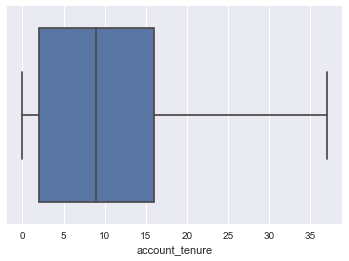

In [210]:
sns.boxplot(x="account_tenure", data = df)

<AxesSubplot:xlabel='cust_care_contacts_12m'>

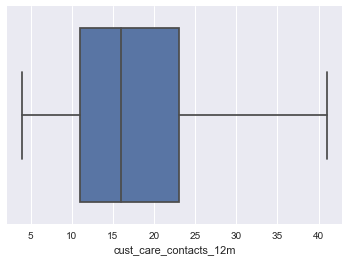

In [211]:
sns.boxplot(x="cust_care_contacts_12m", data = df)

<AxesSubplot:xlabel='customers_per_account'>

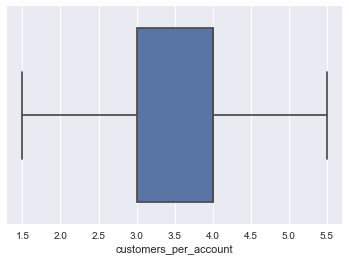

In [212]:
sns.boxplot(x="customers_per_account", data = df)

<AxesSubplot:xlabel='revenue_per_month'>

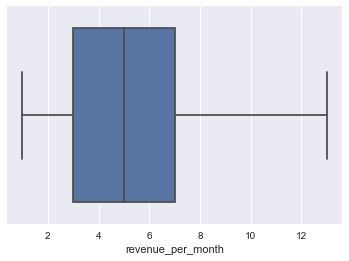

In [213]:
sns.boxplot(x="revenue_per_month", data = df)

<AxesSubplot:xlabel='rev_growth_yoy'>

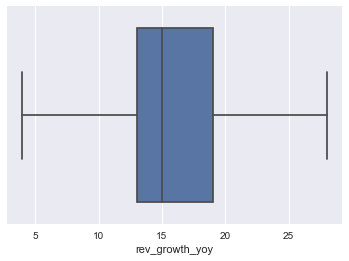

In [214]:
sns.boxplot(x="rev_growth_yoy", data = df)

<AxesSubplot:xlabel='coupons_used'>

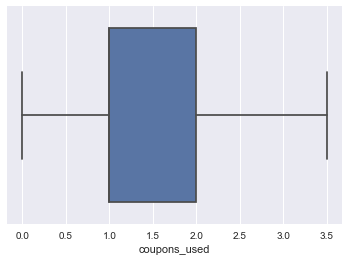

In [215]:
sns.boxplot(x="coupons_used", data = df)

<AxesSubplot:xlabel='days_since_cc_contact'>

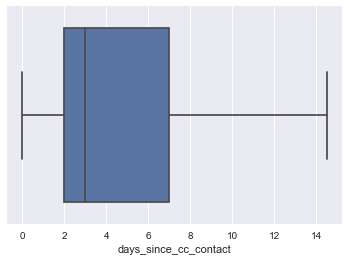

In [216]:
sns.boxplot(x="days_since_cc_contact", data = df)

<AxesSubplot:xlabel='cashback'>

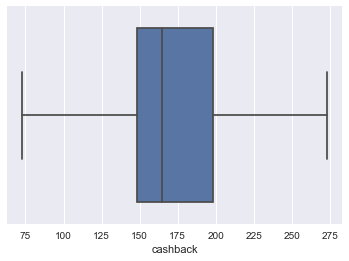

In [217]:
sns.boxplot(x="cashback", data = df)

In [218]:
df.isnull().sum()

Churn                     0
account_tenure            0
city_tier                 0
cust_care_contacts_12m    0
payment_method            0
gender                    0
service_score             0
customers_per_account     0
account_segment           0
cc_agent_score            0
marital_Status            0
revenue_per_month         0
account_complaints_12m    0
rev_growth_yoy            0
coupons_used              0
days_since_cc_contact     0
cashback                  0
login_device              0
dtype: int64

In [219]:
df1 = df.copy()

In [220]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churn                   11001 non-null  int64  
 1   account_tenure          11001 non-null  object 
 2   city_tier               11001 non-null  Int64  
 3   cust_care_contacts_12m  11001 non-null  object 
 4   payment_method          11001 non-null  int64  
 5   gender                  11001 non-null  int64  
 6   service_score           11001 non-null  int64  
 7   customers_per_account   11001 non-null  float64
 8   account_segment         11001 non-null  int64  
 9   cc_agent_score          11001 non-null  int64  
 10  marital_Status          11001 non-null  int64  
 11  revenue_per_month       11001 non-null  float64
 12  account_complaints_12m  11001 non-null  int64  
 13  rev_growth_yoy          11001 non-null  float64
 14  coupons_used            11001 non-null

In [221]:
df1['account_tenure'] = df1['account_tenure'].astype('Int64')
df1['cust_care_contacts_12m'] = df1['cust_care_contacts_12m'].astype('Int64')


In [222]:
df1['Churn'].value_counts()

0    9149
1    1852
Name: Churn, dtype: int64

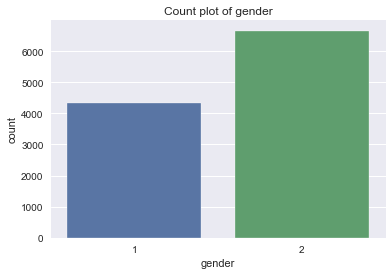

In [223]:
plt.title("Count plot of gender")
sns.countplot(df["gender"]);

In [223]:
### Scaling of data

In [224]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [225]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [226]:
num_col = df1[['Churn','account_tenure','city_tier','service_score','cc_agent_score','cashback','revenue_per_month','days_since_cc_contact','cust_care_contacts_12m','rev_growth_yoy',]]

In [227]:
num_col.head()

Churn  account_tenure  city_tier  service_score  cc_agent_score  cashback  revenue_per_month  days_since_cc_contact  cust_care_contacts_12m  rev_growth_yoy
0      1               4          3              3               2     159.0                9.0                    5.0                       6            11.0
1      1               0          1              3               3     120.0                7.0                    0.0                       8            15.0
2      1               0          1              2               3     165.0                6.0                    3.0                      30            14.0
3      1               0          3              2               5     134.0                8.0                    3.0                      15            23.0
4      1               0          1              2               5     129.0                3.0                    3.0                      12            11.0

In [228]:
scaled_df = pd.DataFrame(X.fit_transform(df1), columns=df1.columns)

In [229]:
scaled_df.head().T

0         1         2         3         4
Churn                   2.222626  2.222626  2.222626  2.222626  2.222626
account_tenure         -0.704189 -1.153115 -1.153115 -1.153115 -1.153115
city_tier               1.479979 -0.709243 -0.709243  1.479979 -0.709243
cust_care_contacts_12m -1.380526 -1.147274  1.418500 -0.330891 -0.680769
payment_method         -1.013677 -0.288991 -1.013677 -1.013677  0.435694
gender                 -1.237690  0.807957  0.807957  0.807957  0.807957
service_score           0.135956  0.135956 -1.247623 -1.247623 -1.247623
customers_per_account  -0.769108  0.312718  0.312718  0.312718 -0.769108
account_segment         0.090912 -0.818288 -0.818288  0.090912 -0.818288
cc_agent_score         -0.770012 -0.041708 -0.041708  1.414899  1.414899
marital_Status         -1.376157 -1.376157 -1.376157 -1.376157 -1.376157
revenue_per_month       1.295405  0.601043  0.253861  0.948224 -0.787683
account_complaints_12m  1.617520  1.617520  1.617520 -0.618230 -0.618230
rev_growth_yoy         -1.384988 -0.321004 -0.587000  1.806965 -1.384988
coupons_used           -0.436018 -1.341042 -1.341042 -1.341042 -0.436018
days_since_cc_contact   0.126480 -1.305301 -0.446232 -0.446232 -0.446232
cashback               -0.414182 -1.300636 -0.277805 -0.982422 -1.096070
login_device           -0.602939 -0.602939 -0.602939 -0.602939 -0.602939

# Splitting data into train and test data set

In [230]:
# splitting data into independent and dependent variables
X = scaled_df.drop('Churn' , axis=1)

y = scaled_df.pop("Churn")

In [231]:
#splitting data into train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [232]:
#checking the dimentsions of training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (7700, 17)
X_test (3301, 17)
y_train (7700,)
y_test (3301,)


In [233]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11001 entries, 0 to 11000
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_tenure          11001 non-null  float64
 1   city_tier               11001 non-null  float64
 2   cust_care_contacts_12m  11001 non-null  float64
 3   payment_method          11001 non-null  float64
 4   gender                  11001 non-null  float64
 5   service_score           11001 non-null  float64
 6   customers_per_account   11001 non-null  float64
 7   account_segment         11001 non-null  float64
 8   cc_agent_score          11001 non-null  float64
 9   marital_Status          11001 non-null  float64
 10  revenue_per_month       11001 non-null  float64
 11  account_complaints_12m  11001 non-null  float64
 12  rev_growth_yoy          11001 non-null  float64
 13  coupons_used            11001 non-null  float64
 14  days_since_cc_contact   11001 non-null

In [234]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

### Clustering

In [235]:
from sklearn.cluster import KMeans 

In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [237]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [238]:
wss

[187017.00000000006,
 170190.16811223864,
 161859.54747920673,
 155265.77501599173,
 150580.84599914885,
 146593.93780599465,
 143216.3779154042,
 139940.94376175944,
 137768.68294165103,
 135678.73758739844]

Text(0.5, 1.0, 'Inertia in the cluster')

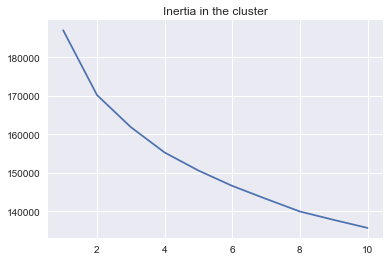

In [239]:
plt.plot(range(1,11), wss)
plt.title("Inertia in the cluster")

In [240]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [241]:
scaled_df["Clus_kmeans"] = labels
scaled_df.head(5)

account_tenure  city_tier  cust_care_contacts_12m  payment_method    gender  service_score  customers_per_account  account_segment  cc_agent_score  marital_Status  revenue_per_month  account_complaints_12m  rev_growth_yoy  coupons_used  days_since_cc_contact  cashback  login_device  Clus_kmeans
0       -0.704189   1.479979               -1.380526       -1.013677 -1.237690       0.135956              -0.769108         0.090912       -0.770012       -1.376157           1.295405                 1.61752       -1.384988     -0.436018               0.126480 -0.414182     -0.602939            1
1       -1.153115  -0.709243               -1.147274       -0.288991  0.807957       0.135956               0.312718        -0.818288       -0.041708       -1.376157           0.601043                 1.61752       -0.321004     -1.341042              -1.305301 -1.300636     -0.602939            0
2       -1.153115  -0.709243                1.418500       -1.013677  0.807957      -1.247623               0.312718        -0.818288       -0.041708       -1.376157           0.253861                 1.61752       -0.587000     -1.341042              -0.446232 -0.277805     -0.602939            0
3       -1.153115   1.479979               -0.330891       -1.013677  0.807957      -1.247623               0.312718         0.090912        1.414899       -1.376157           0.948224                -0.61823        1.806965     -1.341042              -0.446232 -0.982422     -0.602939            1
4       -1.153115  -0.709243               -0.680769        0.435694  0.807957      -1.247623              -0.769108        -0.818288        1.414899       -1.376157          -0.787683                -0.61823       -1.384988     -0.436018              -0.446232 -1.096070     -0.602939            0

In [242]:
scaled_df.groupby(["Clus_kmeans"]).count().T

Clus_kmeans                0     1     2
account_tenure          4976  2760  3265
city_tier               4976  2760  3265
cust_care_contacts_12m  4976  2760  3265
payment_method          4976  2760  3265
gender                  4976  2760  3265
service_score           4976  2760  3265
customers_per_account   4976  2760  3265
account_segment         4976  2760  3265
cc_agent_score          4976  2760  3265
marital_Status          4976  2760  3265
revenue_per_month       4976  2760  3265
account_complaints_12m  4976  2760  3265
rev_growth_yoy          4976  2760  3265
coupons_used            4976  2760  3265
days_since_cc_contact   4976  2760  3265
cashback                4976  2760  3265
login_device            4976  2760  3265

# Performing SMOTE to balance data

In [243]:
from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Splitting data into train and test data set

In [244]:
from sklearn.preprocessing import MinMaxScaler

df1['Churn'] = MinMaxScaler().fit_transform(df1[['Churn']])
df1['account_tenure'] = MinMaxScaler().fit_transform(df1[['account_tenure']])
df1['city_tier'] = MinMaxScaler().fit_transform(df1[['city_tier']])
df1['cust_care_contacts_12m'] = MinMaxScaler().fit_transform(df1[['cust_care_contacts_12m']])
df1['payment_method'] = MinMaxScaler().fit_transform(df1[['payment_method']])
df1['gender'] = MinMaxScaler().fit_transform(df1[['gender']])
df1['service_score'] = MinMaxScaler().fit_transform(df1[['service_score']])
df1['customers_per_account'] = MinMaxScaler().fit_transform(df1[['customers_per_account']])
df1['account_segment'] = MinMaxScaler().fit_transform(df1[['account_segment']])
df1['cc_agent_score'] = MinMaxScaler().fit_transform(df1[['cc_agent_score']])
df1['marital_Status'] = MinMaxScaler().fit_transform(df1[['marital_Status']])
df1['revenue_per_month'] = MinMaxScaler().fit_transform(df1[['revenue_per_month']])
df1['account_complaints_12m'] = MinMaxScaler().fit_transform(df1[['account_complaints_12m']])
df1['rev_growth_yoy'] = MinMaxScaler().fit_transform(df1[['rev_growth_yoy']])
df1['coupons_used'] = MinMaxScaler().fit_transform(df1[['coupons_used']])
df1['days_since_cc_contact'] = MinMaxScaler().fit_transform(df1[['days_since_cc_contact']])
df1['cashback'] = MinMaxScaler().fit_transform(df1[['cashback']])
df1['login_device'] = MinMaxScaler().fit_transform(df1[['login_device']])

In [245]:
df1.head().T

0         1         2         3         4
Churn                   1.000000  1.000000  1.000000  1.000000  1.000000
account_tenure          0.108108  0.000000  0.000000  0.000000  0.000000
city_tier               1.000000  0.000000  0.000000  1.000000  0.000000
cust_care_contacts_12m  0.054054  0.108108  0.702703  0.297297  0.216216
payment_method          0.000000  0.250000  0.000000  0.000000  0.500000
gender                  0.000000  1.000000  1.000000  1.000000  1.000000
service_score           0.600000  0.600000  0.400000  0.400000  0.400000
customers_per_account   0.375000  0.625000  0.625000  0.625000  0.375000
account_segment         0.500000  0.250000  0.250000  0.500000  0.250000
cc_agent_score          0.250000  0.500000  0.500000  1.000000  1.000000
marital_Status          0.000000  0.000000  0.000000  0.000000  0.000000
revenue_per_month       0.666667  0.500000  0.416667  0.583333  0.166667
account_complaints_12m  1.000000  1.000000  1.000000  0.000000  0.000000
rev_growth_yoy          0.291667  0.458333  0.416667  0.791667  0.291667
coupons_used            0.285714  0.000000  0.000000  0.000000  0.285714
days_since_cc_contact   0.344828  0.000000  0.206897  0.206897  0.206897
cashback                0.430000  0.235000  0.460000  0.305000  0.280000
login_device            0.000000  0.000000  0.000000  0.000000  0.000000

In [246]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churn                   11001 non-null  float64
 1   account_tenure          11001 non-null  float64
 2   city_tier               11001 non-null  float64
 3   cust_care_contacts_12m  11001 non-null  float64
 4   payment_method          11001 non-null  float64
 5   gender                  11001 non-null  float64
 6   service_score           11001 non-null  float64
 7   customers_per_account   11001 non-null  float64
 8   account_segment         11001 non-null  float64
 9   cc_agent_score          11001 non-null  float64
 10  marital_Status          11001 non-null  float64
 11  revenue_per_month       11001 non-null  float64
 12  account_complaints_12m  11001 non-null  float64
 13  rev_growth_yoy          11001 non-null  float64
 14  coupons_used            11001 non-null

In [247]:
#checking standard deviations of each variable
print("Standard deviation of variables")
print(df1.std())

Standard deviation of variables
Churn                     0.374192
account_tenure            0.240826
city_tier                 0.456804
cust_care_contacts_12m    0.231751
payment_method            0.344993
gender                    0.488865
service_score             0.144559
customers_per_account     0.231101
account_segment           0.274979
cc_agent_score            0.343279
marital_Status            0.446216
revenue_per_month         0.240039
account_complaints_12m    0.447297
rev_growth_yoy            0.156651
coupons_used              0.315712
days_since_cc_contact     0.240849
cashback                  0.219988
login_device              0.442208
dtype: float64


In [248]:
# splitting data into independent and dependent variables
X = df1.drop('Churn' , axis=1)

y = df1.pop("Churn")

In [249]:
#splitting data into train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [250]:
#checking the dimentsions of training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (7700, 17)
X_test (3301, 17)
y_train (7700,)
y_test (3301,)


In [251]:
from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [252]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.975], flip_y=0, random_state=1)
counter=Counter(y)
counter

Counter({0: 975, 1: 25})

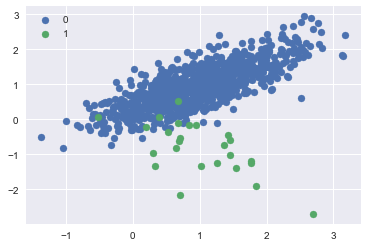

In [253]:
from collections import Counter
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

# Performing SMOTE to balance data

In [254]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [255]:
# applying smote to train dataset and resampling
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [256]:
#checking the dimentsions of training and test data
print('X_train_res',X_train_res.shape)
#print('X_test',X_test.shape)
print('y_train_res',y_train_res.shape)
#print('y_test',y_test.shape)

X_train_res (12812, 17)
y_train_res (12812,)


In [257]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [258]:
counter=Counter(y)
counter

Counter({0: 975, 1: 975})

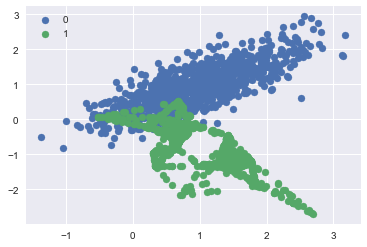

In [259]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

## Project 2 - Note

In [260]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

In [261]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3301 entries, 3513 to 4046
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_tenure          3301 non-null   float64
 1   city_tier               3301 non-null   float64
 2   cust_care_contacts_12m  3301 non-null   float64
 3   payment_method          3301 non-null   float64
 4   gender                  3301 non-null   float64
 5   service_score           3301 non-null   float64
 6   customers_per_account   3301 non-null   float64
 7   account_segment         3301 non-null   float64
 8   cc_agent_score          3301 non-null   float64
 9   marital_Status          3301 non-null   float64
 10  revenue_per_month       3301 non-null   float64
 11  account_complaints_12m  3301 non-null   float64
 12  rev_growth_yoy          3301 non-null   float64
 13  coupons_used            3301 non-null   float64
 14  days_since_cc_contact   3301 non-null

In [262]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7700 entries, 7604 to 235
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_tenure          7700 non-null   float64
 1   city_tier               7700 non-null   float64
 2   cust_care_contacts_12m  7700 non-null   float64
 3   payment_method          7700 non-null   float64
 4   gender                  7700 non-null   float64
 5   service_score           7700 non-null   float64
 6   customers_per_account   7700 non-null   float64
 7   account_segment         7700 non-null   float64
 8   cc_agent_score          7700 non-null   float64
 9   marital_Status          7700 non-null   float64
 10  revenue_per_month       7700 non-null   float64
 11  account_complaints_12m  7700 non-null   float64
 12  rev_growth_yoy          7700 non-null   float64
 13  coupons_used            7700 non-null   float64
 14  days_since_cc_contact   7700 non-null 

In [263]:
X_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12812 entries, 0 to 12811
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_tenure          12812 non-null  float64
 1   city_tier               12812 non-null  float64
 2   cust_care_contacts_12m  12812 non-null  float64
 3   payment_method          12812 non-null  float64
 4   gender                  12812 non-null  float64
 5   service_score           12812 non-null  float64
 6   customers_per_account   12812 non-null  float64
 7   account_segment         12812 non-null  float64
 8   cc_agent_score          12812 non-null  float64
 9   marital_Status          12812 non-null  float64
 10  revenue_per_month       12812 non-null  float64
 11  account_complaints_12m  12812 non-null  float64
 12  rev_growth_yoy          12812 non-null  float64
 13  coupons_used            12812 non-null  float64
 14  days_since_cc_contact   12812 non-null

In [264]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [427]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,pred_test))
        print("\n Classification Report of Training Data")
        print(classification_report(y_train, pred_train))
        
        print("\n Classification Report of Testing Data")
        print(classification_report(y_test, pred_test))
        
    
    return score_list # returning the list with train and test scores

## Logistic Regression with Smote

In [410]:
lr_sm=LogisticRegression()
lr_sm.fit(X_train_res,y_train_res)

LogisticRegression()

In [428]:
#Using above defined function to get accuracy, recall and precision on train and test set
lr_sm_score=get_metrics_score(lr_sm)

Accuracy on training set :  0.7866233766233767
Accuracy on test set :  0.7730990608906392
Recall on training set :  0.8183925811437404
Recall on test set :  0.8064516129032258
Precision on training set :  0.4292663153627888
Precision on test set :  0.41246562786434465
F1 on training set :  0.5631480989098644
F1 on test set :  0.545785324439054

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.96      0.78      0.86      6406
         1.0       0.43      0.82      0.56      1294

    accuracy                           0.79      7700
   macro avg       0.69      0.80      0.71      7700
weighted avg       0.87      0.79      0.81      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85      2743
         1.0       0.41      0.81      0.55       558

    accuracy                           0.77      3301
   macro avg       0.68     

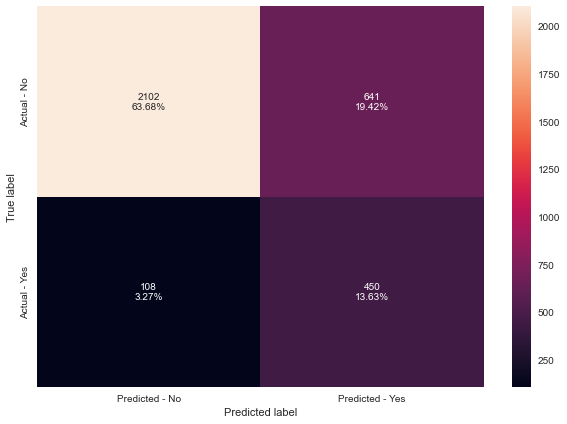

In [268]:
make_confusion_matrix(lr_sm,y_test)

<Figure size 72x144 with 0 Axes>

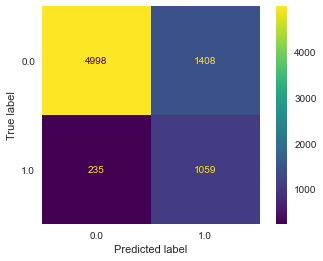

In [269]:
## Confusion matrix on the test data
plt.figure(figsize=(1,2))
plot_confusion_matrix(lr_sm,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data and testing data

AUC: 0.871


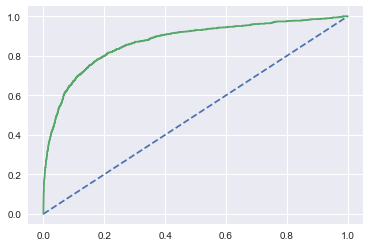

In [270]:
# predict probabilities
probs = lr_sm.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.855


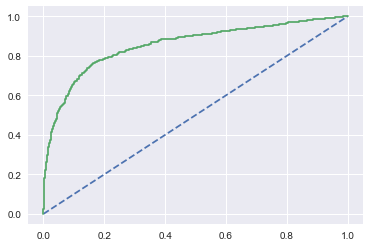

In [271]:
# predict probabilities
probs = lr_sm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Apply Logistic Regression

In [272]:
# Fit the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

## Score for Logistic Regression

In [430]:
#Using above defined function to get accuracy, recall and precision on train and test set
lr_score=get_metrics_score(lr_model)

Accuracy on training set :  0.88
Accuracy on test set :  0.8803392911239019
Recall on training set :  0.42967542503863987
Recall on test set :  0.45340501792114696
Precision on training set :  0.7493261455525606
Precision on test set :  0.7376093294460642
F1 on training set :  0.5461689587426326
F1 on test set :  0.5615982241953386

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6406
         1.0       0.75      0.43      0.55      1294

    accuracy                           0.88      7700
   macro avg       0.82      0.70      0.74      7700
weighted avg       0.87      0.88      0.87      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2743
         1.0       0.74      0.45      0.56       558

    accuracy                           0.88      3301
   macro avg       0.82      0.71      0

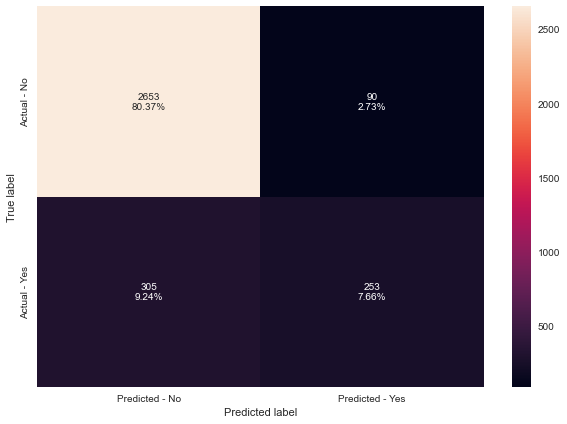

In [274]:
make_confusion_matrix(lr_model,y_test)

<Figure size 72x144 with 0 Axes>

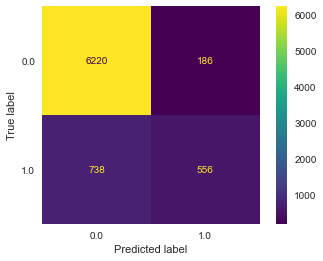

In [275]:
## Confusion matrix on the test data
plt.figure(figsize=(1,2))
plot_confusion_matrix(lr_model,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data and testing data

AUC: 0.871


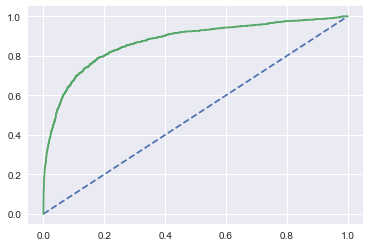

In [276]:
# predict probabilities
probs = lr_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.856


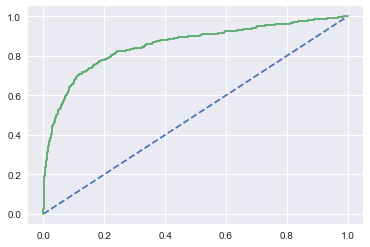

In [277]:
# predict probabilities
probs = lr_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## LDA model

In [447]:
#Build LDA Model
lda_model = LinearDiscriminantAnalysis()
lda_model=lda_model.fit(X_train,y_train)

## Scoring our Linear Discriminant Analysis

In [431]:
#Using above defined function to get accuracy, recall and precision on train and test set
lda_score=get_metrics_score(lda_model)

Accuracy on training set :  0.8766233766233766
Accuracy on test set :  0.8791275371099667
Recall on training set :  0.4080370942812983
Recall on test set :  0.4390681003584229
Precision on training set :  0.7415730337078652
Precision on test set :  0.7401812688821753
F1 on training set :  0.5264207377866401
F1 on test set :  0.5511811023622047

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6406
         1.0       0.74      0.41      0.53      1294

    accuracy                           0.88      7700
   macro avg       0.82      0.69      0.73      7700
weighted avg       0.87      0.88      0.86      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2743
         1.0       0.74      0.44      0.55       558

    accuracy                           0.88      3301
   macro avg       0.82     

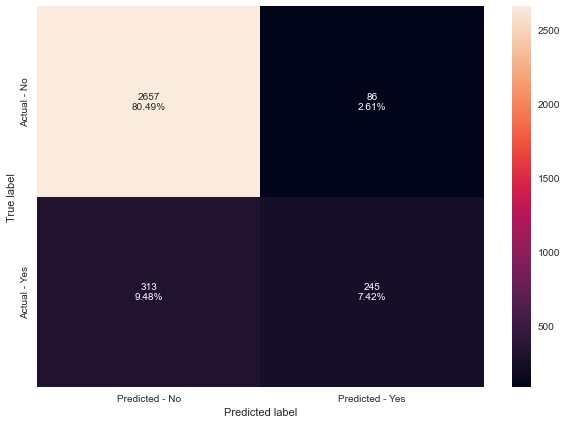

In [280]:
make_confusion_matrix(lda_model,y_test)

<Figure size 72x144 with 0 Axes>

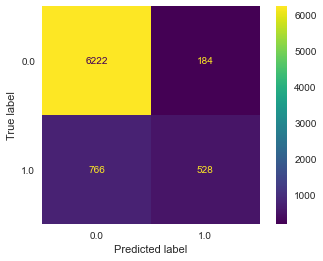

In [281]:
## Confusion matrix on the test data
plt.figure(figsize=(1,2))
plot_confusion_matrix(lda_model,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data and testing data

AUC: 0.862


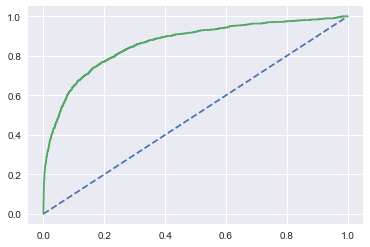

In [282]:
# predict probabilities
probs = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.849


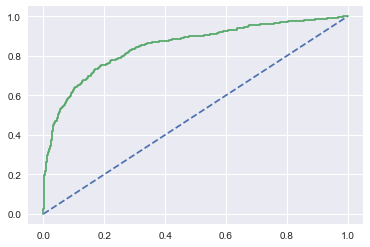

In [283]:
# predict probabilities
probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Applying GridSearchCV for Logistic Regression

In [284]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [285]:
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [286]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [287]:
grid_search.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effe

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [288]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='none')


In [289]:
best_model_lr = grid_search.best_estimator_

In [290]:
best_model_lr

LogisticRegression(max_iter=100000, n_jobs=2, penalty='none')

In [432]:
#Using above defined function to get accuracy, recall and precision on train and test set
best_model_lr_score=get_metrics_score(best_model_lr)

Accuracy on training set :  0.8805194805194805
Accuracy on test set :  0.8806422296273856
Recall on training set :  0.44590417310664604
Recall on test set :  0.46415770609318996
Precision on training set :  0.7397435897435898
Precision on test set :  0.731638418079096
F1 on training set :  0.5564127290260367
F1 on test set :  0.5679824561403509

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      6406
         1.0       0.74      0.45      0.56      1294

    accuracy                           0.88      7700
   macro avg       0.82      0.71      0.74      7700
weighted avg       0.87      0.88      0.87      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2743
         1.0       0.73      0.46      0.57       558

    accuracy                           0.88      3301
   macro avg       0.82    

### Confusion Matrix for the training data

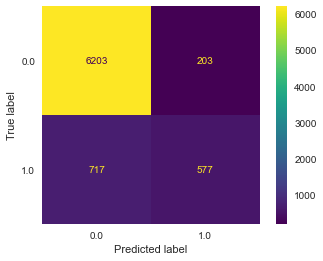

In [292]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model_lr,X_train,y_train)
plt.grid(False)

### Confusion Matrix for the test data

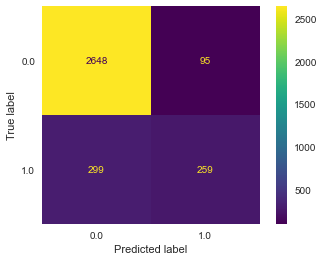

In [293]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model_lr,X_test,y_test)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.872


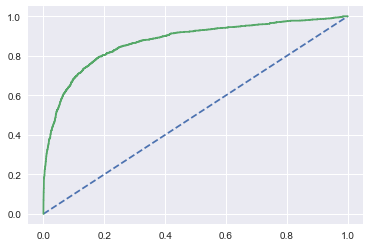

In [294]:
# predict probabilities
probs = best_model_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.856


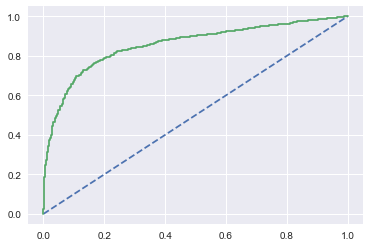

In [295]:
# predict probabilities
probs = best_model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## LDA MODEL

### Applying GridSearchCV for LDA

In [296]:
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=10,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,y_train)

print(gsLDA.best_params_)
print(gsLDA.best_score_)
print(gsLDA.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
{'solver': 'svd', 'tol': 0.0001}
0.8753246753246753
{'solver': 'svd', 'tol': 0.0001}


In [297]:
best_lda = gsLDA.best_estimator_
best_lda

LinearDiscriminantAnalysis()

In [433]:
#Using above defined function to get accuracy, recall and precision on train and test set
best_lda_score=get_metrics_score(best_lda)

Accuracy on training set :  0.8766233766233766
Accuracy on test set :  0.8791275371099667
Recall on training set :  0.4080370942812983
Recall on test set :  0.4390681003584229
Precision on training set :  0.7415730337078652
Precision on test set :  0.7401812688821753
F1 on training set :  0.5264207377866401
F1 on test set :  0.5511811023622047

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6406
         1.0       0.74      0.41      0.53      1294

    accuracy                           0.88      7700
   macro avg       0.82      0.69      0.73      7700
weighted avg       0.87      0.88      0.86      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2743
         1.0       0.74      0.44      0.55       558

    accuracy                           0.88      3301
   macro avg       0.82     

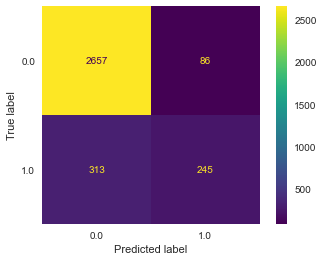

In [299]:
## Confusion matrix on the test data

plot_confusion_matrix(best_lda,X_test,y_test)
plt.grid(False)

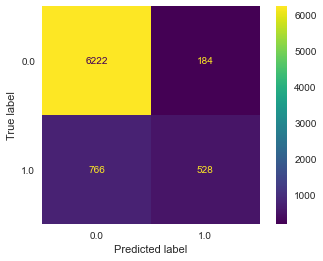

In [300]:
## Confusion matrix on the test data

plot_confusion_matrix(best_lda,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.862


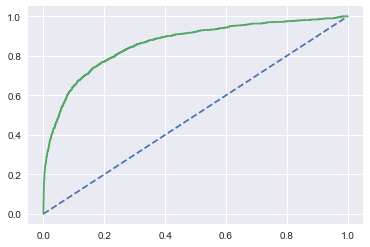

In [301]:
# predict probabilities
probs = best_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.849


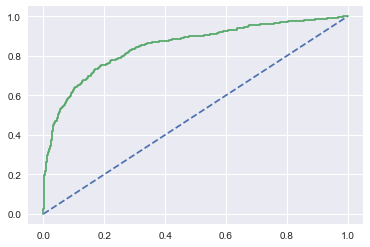

In [302]:
# predict probabilities
probs = best_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [303]:
data_features = ['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Churn_1', 'Payment_2', 'Payment_3', 'Payment_4',
       'Payment_5', 'Gender_1', 'account_segment_2', 'account_segment_3',
       'account_segment_4', 'account_segment_5', 'Marital_Status_2',
       'Marital_Status_3', 'Login_device_2']

In [304]:
coef_dict = {}
for coef, feat in zip(best_lda.coef_[0,:],data_features):
    coef_dict[feat] = coef

In [305]:
coef_dict

{'Tenure': -4.564540428545768,
 'City_Tier': 0.4865801684096319,
 'CC_Contacted_LY': 0.8181236867354078,
 'Service_Score': 0.3992567987210107,
 'Account_user_count': 0.2654159640918158,
 'CC_Agent_Score': -0.7009588276947265,
 'rev_per_month': 1.4287419415768596,
 'Complain_ly': -0.5749755281860122,
 'rev_growth_yoy': 1.1421117820091364,
 'coupon_used_for_payment': -1.1367034811286554,
 'Day_Since_CC_connect': 1.3576778814923751,
 'cashback': 1.9022510432798327,
 'Churn_1': -0.3522479314117932,
 'Payment_2': 0.41678895379579806,
 'Payment_3': -1.2778361195659482,
 'Payment_4': 0.08742511102475743,
 'Payment_5': 0.38191815646733424}

### AdaBoost Classifier

In [306]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [307]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [434]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8958441558441559
Accuracy on test set :  0.8936685852771887
Recall on training set :  0.5795981452859351
Recall on test set :  0.5913978494623656
Precision on training set :  0.7440476190476191
Precision on test set :  0.7284768211920529
F1 on training set :  0.6516072980017377
F1 on test set :  0.6528189910979229

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      6406
         1.0       0.74      0.58      0.65      1294

    accuracy                           0.90      7700
   macro avg       0.83      0.77      0.80      7700
weighted avg       0.89      0.90      0.89      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2743
         1.0       0.73      0.59      0.65       558

    accuracy                           0.89      3301
   macro avg       0.82     

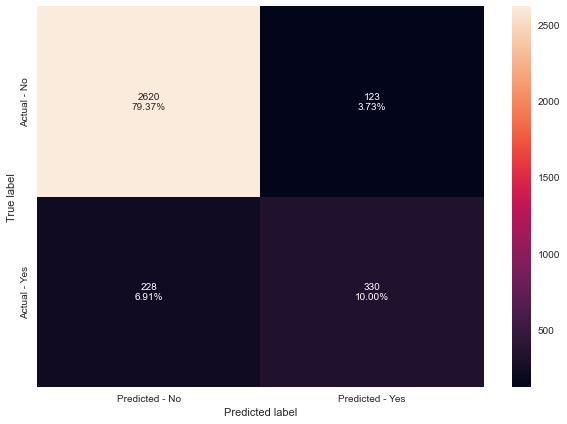

In [309]:
make_confusion_matrix(abc,y_test)

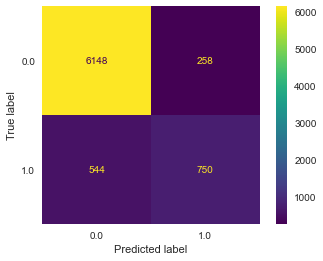

In [310]:
## Confusion matrix on the training data
plot_confusion_matrix(abc,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.916


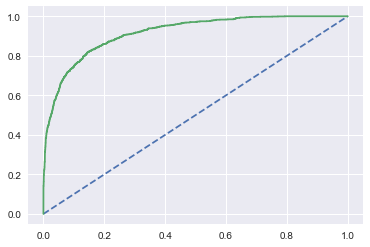

In [311]:
# predict probabilities
probs = abc.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.908


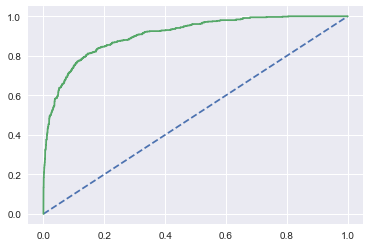

In [312]:
# predict probabilities
probs = abc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

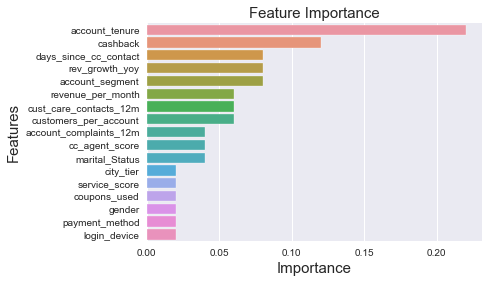

In [313]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': abc.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

### Gradient Boosting Classifier

In [314]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [435]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.9176623376623376
Accuracy on test set :  0.9030596788851863
Recall on training set :  0.6236476043276662
Recall on test set :  0.5806451612903226
Precision on training set :  0.8459119496855346
Precision on test set :  0.7902439024390244
F1 on training set :  0.7179715302491102
F1 on test set :  0.6694214876033058

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      6406
         1.0       0.85      0.62      0.72      1294

    accuracy                           0.92      7700
   macro avg       0.89      0.80      0.83      7700
weighted avg       0.91      0.92      0.91      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      2743
         1.0       0.79      0.58      0.67       558

    accuracy                           0.90      3301
   macro avg       0.85     

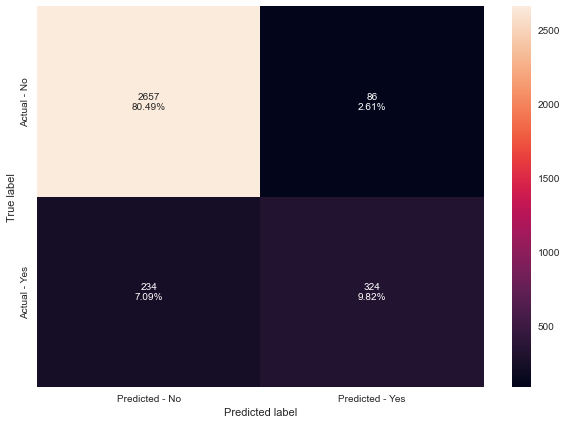

In [316]:
make_confusion_matrix(gbc,y_test)

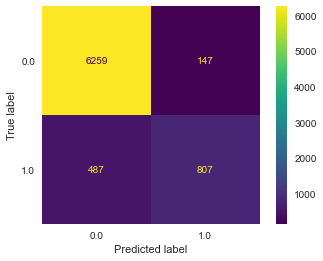

In [317]:
## Confusion matrix on the training data
plot_confusion_matrix(gbc,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.952


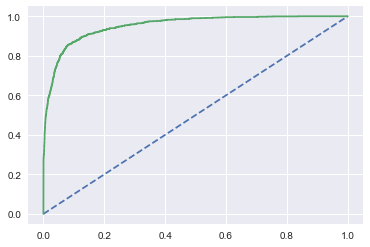

In [318]:
# predict probabilities
probs = gbc.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.935


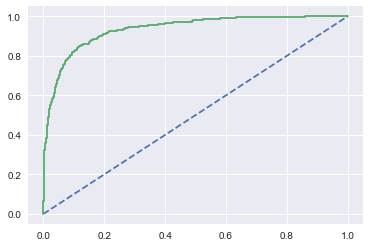

In [319]:
# predict probabilities
probs = gbc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

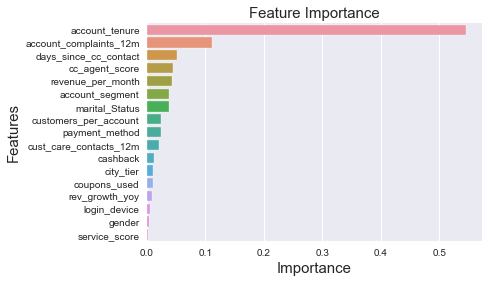

In [320]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': gbc.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

### XGBoost Classifier

In [321]:
from xgboost import XGBClassifier

In [322]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [436]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9998701298701299
Accuracy on test set :  0.9675855801272342
Recall on training set :  0.999227202472952
Recall on test set :  0.8853046594982079
Precision on training set :  1.0
Precision on test set :  0.9199255121042831
F1 on training set :  0.9996134518747584
F1 on test set :  0.902283105022831

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6406
         1.0       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2743
         1.0       0.92      0.89      0.90       558

    accuracy                           0.97      3301
   macro avg       0.95      0.93      0.94  

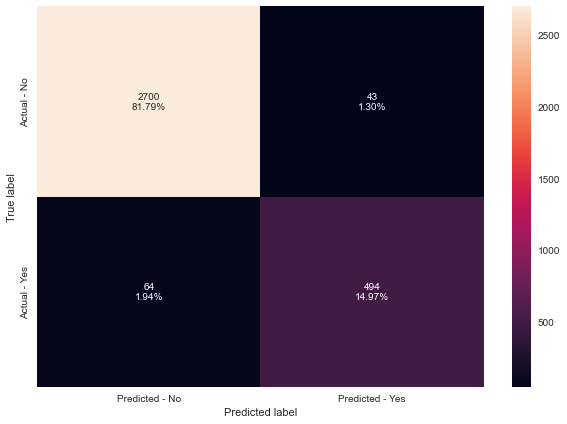

In [324]:
make_confusion_matrix(xgb,y_test)

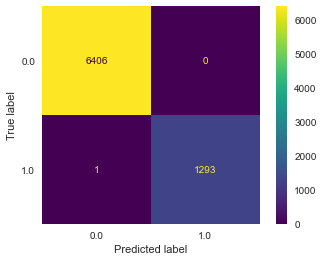

In [325]:
## Confusion matrix on the training data
plot_confusion_matrix(xgb,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 1.000


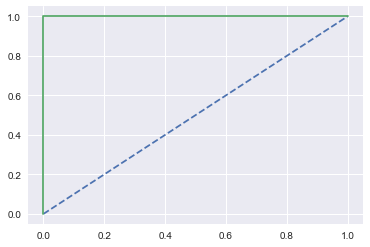

In [326]:
# predict probabilities
probs = xgb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.991


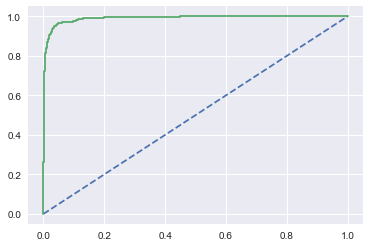

In [327]:
# predict probabilities
probs = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

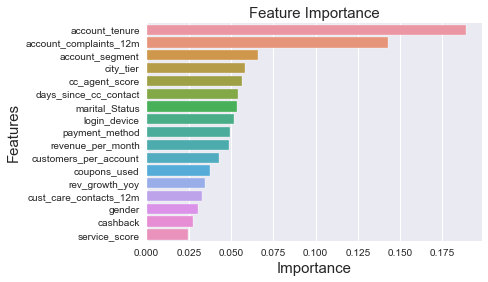

In [328]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

## Hyperparameter Tuning

### XGBoost Classifier

In [329]:
xgb_tuned = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb_tuned.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=0, ...)

In [437]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9700090881551046
Recall on training set :  1.0
Recall on test set :  0.9050179211469535
Precision on training set :  1.0
Precision on test set :  0.9165154264972777
F1 on training set :  1.0
F1 on test set :  0.9107303877366998

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6406
         1.0       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2743
         1.0       0.92      0.91      0.91       558

    accuracy                           0.97      3301
   macro avg       0.95      0.94      0.95      3301
weighted avg       0.97      0.97 

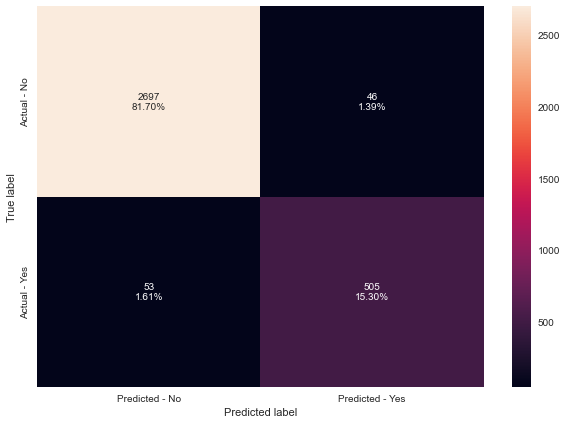

In [331]:
make_confusion_matrix(xgb_tuned,y_test)

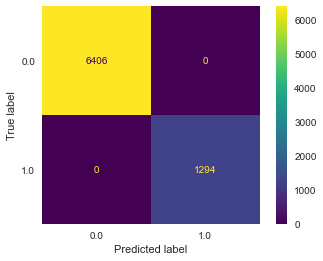

In [332]:
## Confusion matrix on the training data
plot_confusion_matrix(xgb_tuned,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 1.000


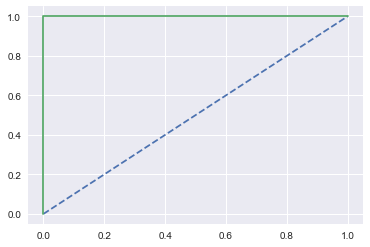

In [333]:
# predict probabilities
probs = xgb_tuned.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.992


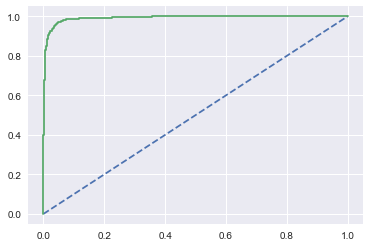

In [334]:
# predict probabilities
probs = xgb_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Hyperparameter Tuning

### AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [335]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=10),DecisionTreeClassifier(max_depth=20),DecisionTreeClassifier(max_depth=30)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=30),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [438]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9418358073311118
Recall on training set :  1.0
Recall on test set :  0.8602150537634409
Precision on training set :  1.0
Precision on test set :  0.8080808080808081
F1 on training set :  1.0
F1 on test set :  0.8333333333333333

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6406
         1.0       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      2743
         1.0       0.81      0.86      0.83       558

    accuracy                           0.94      3301
   macro avg       0.89      0.91      0.90      3301
weighted avg       0.94      0.94 

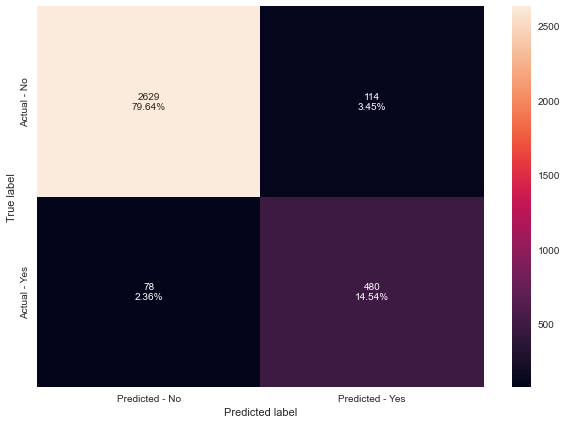

In [337]:
make_confusion_matrix(abc_tuned,y_test)

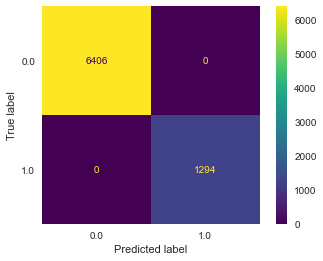

In [338]:
## Confusion matrix on the training data
plot_confusion_matrix(abc_tuned,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 1.000


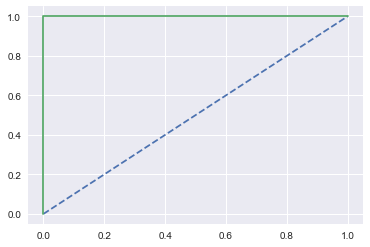

In [339]:
# predict probabilities
probs = abc_tuned.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.909


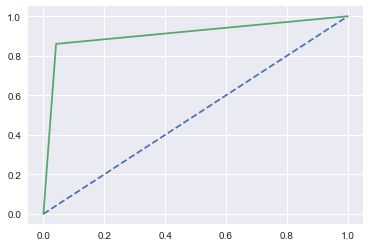

In [340]:
# predict probabilities
probs = abc_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Gradient Boosting Classifier

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [341]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [439]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.9158441558441558
Accuracy on test set :  0.9030596788851863
Recall on training set :  0.6089644513137558
Recall on test set :  0.5824372759856631
Precision on training set :  0.8473118279569892
Precision on test set :  0.7888349514563107
F1 on training set :  0.7086330935251798
F1 on test set :  0.6701030927835051

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      6406
         1.0       0.85      0.61      0.71      1294

    accuracy                           0.92      7700
   macro avg       0.89      0.79      0.83      7700
weighted avg       0.91      0.92      0.91      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      2743
         1.0       0.79      0.58      0.67       558

    accuracy                           0.90      3301
   macro avg       0.85     

**As compared to the model with default parameters:**

- Test accuracy and test recall have increased slightly.
- As we are getting better results, we will use init = AdaBoostClassifier() to tune the gradient boosting model.

In [343]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,max_features=11, 
                                       min_samples_leaf=6,min_samples_split=15, n_estimators=201,random_state=0)
# Grid of parameters to choose from
## add from article
param_grid = {
 'loss': ['deviance'],
 'learning_rate': [0.1, 0.5, 1],
 'n_estimators': [201],
 'criterion': ['mse'],
 'min_samples_split': [15],
 'min_samples_leaf': [6],
 'max_depth':[9],
 'max_features':[11]
}
#
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned,param_grid,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, loss='deviance',
                           max_depth=9, max_features=11, min_samples_leaf=6,
                           min_samples_split=15, n_estimators=201,
                           random_state=0)

In [440]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.98242956679794
Recall on training set :  1.0
Recall on test set :  0.9247311827956989
Precision on training set :  1.0
Precision on test set :  0.9699248120300752
F1 on training set :  1.0
F1 on test set :  0.9467889908256881

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6406
         1.0       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2743
         1.0       0.97      0.92      0.95       558

    accuracy                           0.98      3301
   macro avg       0.98      0.96      0.97      3301
weighted avg       0.98      0.98   

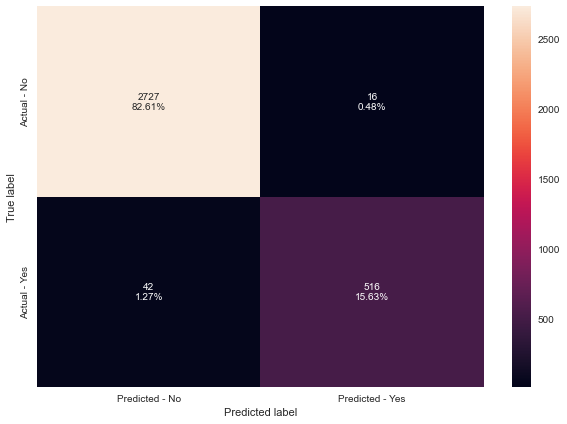

In [345]:
make_confusion_matrix(gbc_tuned,y_test)

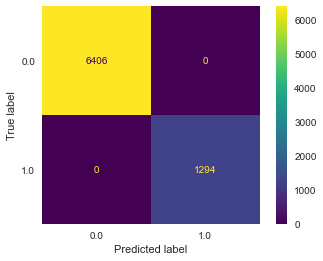

In [346]:
## Confusion matrix on the training data
plot_confusion_matrix(gbc_tuned,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 1.000


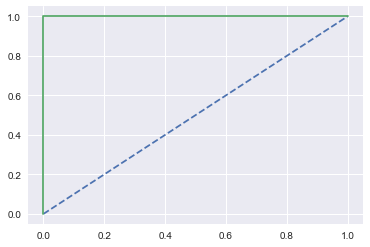

In [347]:
# predict probabilities
probs = gbc_tuned.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.996


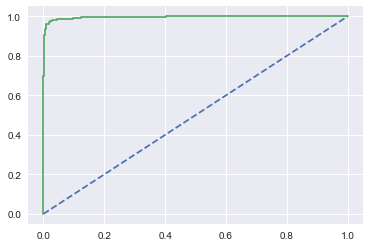

In [348]:
# predict probabilities
probs = gbc_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

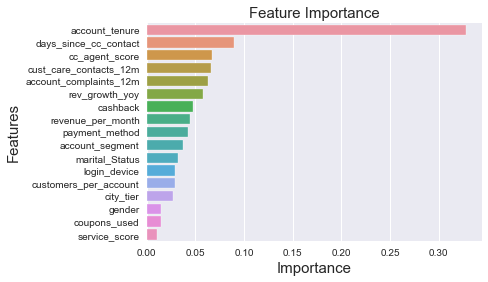

In [349]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': gbc_tuned.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

## Random Forest Model

In [350]:
from sklearn.ensemble import RandomForestClassifier

In [351]:
rf =  RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [441]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_score=get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9697061496516207
Recall on training set :  1.0
Recall on test set :  0.8637992831541219
Precision on training set :  1.0
Precision on test set :  0.9525691699604744
F1 on training set :  1.0
F1 on test set :  0.9060150375939849

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6406
         1.0       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2743
         1.0       0.95      0.86      0.91       558

    accuracy                           0.97      3301
   macro avg       0.96      0.93      0.94      3301
weighted avg       0.97      0.97 

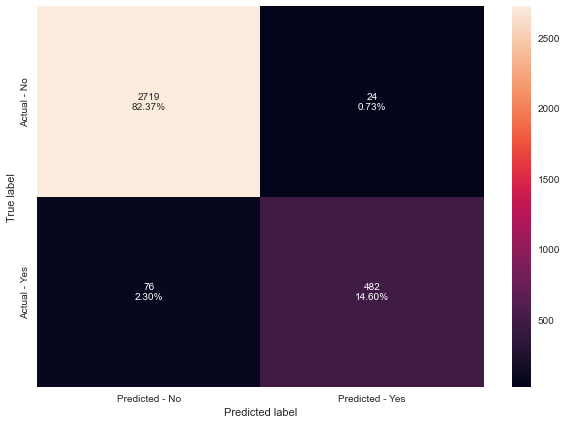

In [353]:
make_confusion_matrix(rf,y_test)

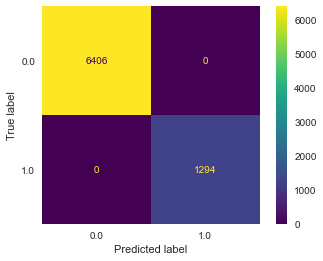

In [354]:
## Confusion matrix on the training data
plot_confusion_matrix(rf,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 1.000


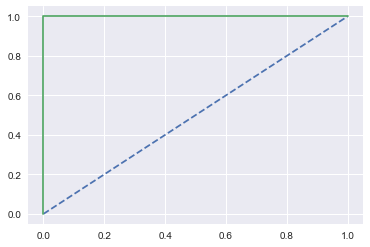

In [355]:
# predict probabilities
probs = rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.993


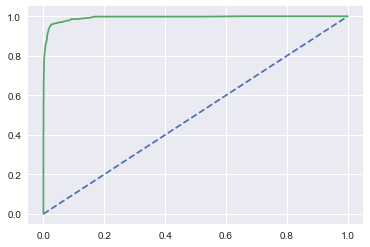

In [356]:
# predict probabilities
probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

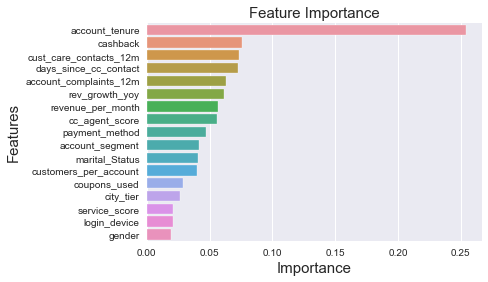

In [357]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

### Random Forest - Tuned

In [358]:
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model, 
                         param_grid = param, 
                         scoring='accuracy',
                         cv = 5,
                         n_jobs = -1)
    gscv.fit(X_train , y_train)
    result = gscv.best_params_
    return result

In [359]:
rf_gs = RandomForestClassifier(random_state = 1)
rf_params = {
  'n_estimators':[200,300],
 'criterion': ( 'gini','entropy'),
 'max_depth': [2, 3 ,4],
 'min_samples_split': [2, 9],
 'max_features': ("sqrt", "log2") }
r3 = gridsearch(rf_gs , rf_params)
print(f'Best parameters for Random Forest :{r3}')

Best parameters for Random Forest :{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 9, 'n_estimators': 200}


In [360]:
rf_tuned  = RandomForestClassifier(max_depth=9, random_state=1 , criterion= 'gini' , max_features='sqrt' , min_samples_split= 2 , n_estimators= 300)

In [361]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=300, random_state=1)

In [442]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_tuned_score=get_metrics_score(rf_tuned)

Accuracy on training set :  0.9606493506493506
Accuracy on test set :  0.932747652226598
Recall on training set :  0.7782071097372488
Recall on test set :  0.6720430107526881
Precision on training set :  0.9843597262952102
Precision on test set :  0.9057971014492754
F1 on training set :  0.8692274492878723
F1 on test set :  0.771604938271605

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      6406
         1.0       0.98      0.78      0.87      1294

    accuracy                           0.96      7700
   macro avg       0.97      0.89      0.92      7700
weighted avg       0.96      0.96      0.96      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2743
         1.0       0.91      0.67      0.77       558

    accuracy                           0.93      3301
   macro avg       0.92      0

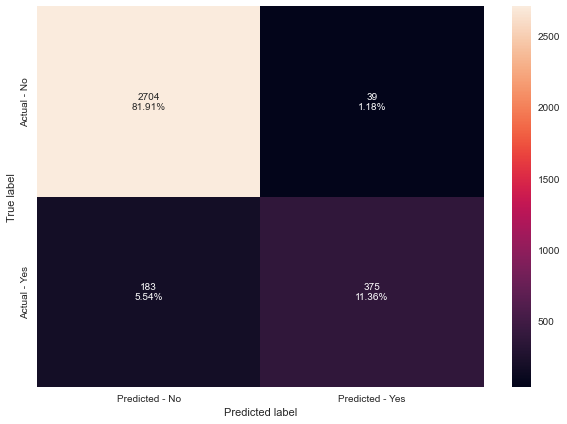

In [363]:
make_confusion_matrix(rf_tuned,y_test)

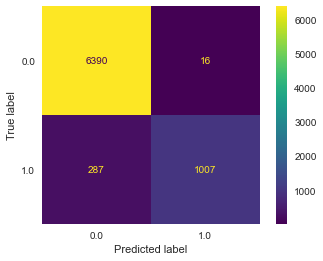

In [364]:
## Confusion matrix on the training data
plot_confusion_matrix(rf_tuned,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.991


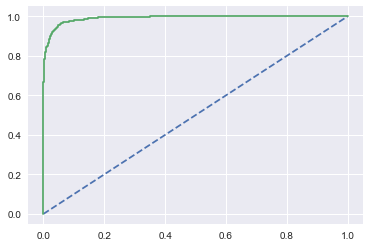

In [365]:
# predict probabilities
probs = rf_tuned.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.971


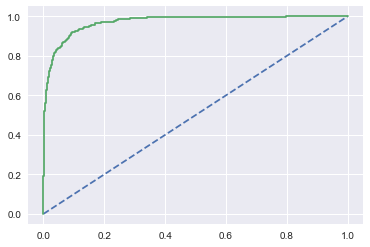

In [366]:
# predict probabilities
probs = rf_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## ANN Model

In [367]:
from sklearn.neural_network import MLPClassifier

In [368]:
ann = MLPClassifier()

In [369]:
# Fit the model on the training data
ann.fit(X_train, y_train)

MLPClassifier()

In [443]:
#Using above defined function to get accuracy, recall and precision on train and test set
ann_score=get_metrics_score(ann)

Accuracy on training set :  0.9476623376623377
Accuracy on test set :  0.926991820660406
Recall on training set :  0.7774343122102009
Recall on test set :  0.7150537634408602
Precision on training set :  0.8974130240856378
Precision on test set :  0.8295218295218295
F1 on training set :  0.8331262939958592
F1 on test set :  0.768046198267565

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      6406
         1.0       0.90      0.78      0.83      1294

    accuracy                           0.95      7700
   macro avg       0.93      0.88      0.90      7700
weighted avg       0.95      0.95      0.95      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      2743
         1.0       0.83      0.72      0.77       558

    accuracy                           0.93      3301
   macro avg       0.89      0

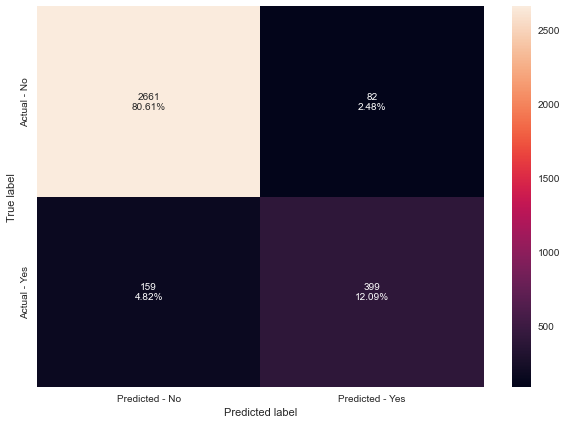

In [371]:
make_confusion_matrix(ann,y_test)

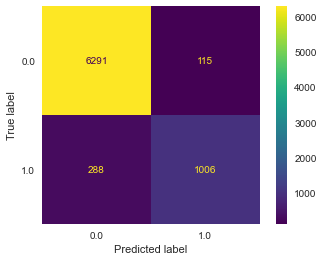

In [372]:
## Confusion matrix on the training data
plot_confusion_matrix(ann,X_train,y_train)
plt.grid(False)

AUC: 0.975


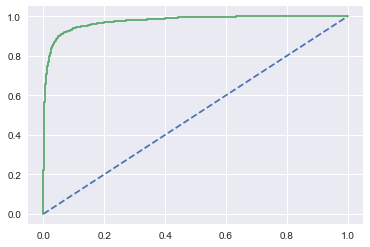

In [373]:
# predict probabilities
probs = ann.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.954


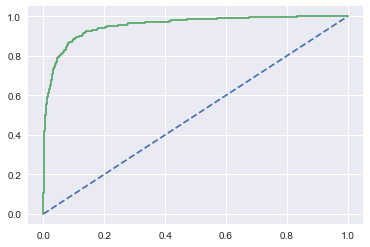

In [374]:
# predict probabilities
probs = ann.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## ANN Tuned

In [486]:
param_grid_ann = {
    'hidden_layer_sizes': [100],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

ANN_tuned = MLPClassifier(max_iter=5000,verbose=True,  random_state=1)

In [488]:
grid_search_ann= GridSearchCV(estimator = ANN_tuned, param_grid = param_grid_ann,cv=5, scoring='f1', n_jobs=-1)
grid_search_ann.fit(X_train,y_train)

Iteration 1, loss = 0.61045000
Iteration 2, loss = 0.45546356
Iteration 3, loss = 0.45349294
Iteration 4, loss = 0.45335769
Iteration 5, loss = 0.45325249
Iteration 6, loss = 0.45309036
Iteration 7, loss = 0.45303432
Iteration 8, loss = 0.45287397
Iteration 9, loss = 0.45274732
Iteration 10, loss = 0.45261701
Iteration 11, loss = 0.45253667
Iteration 12, loss = 0.45237977
Iteration 13, loss = 0.45227914
Iteration 14, loss = 0.45216934
Iteration 15, loss = 0.45208192
Iteration 16, loss = 0.45192611
Iteration 17, loss = 0.45182161
Iteration 18, loss = 0.45172317
Iteration 19, loss = 0.45158403
Iteration 20, loss = 0.45142799
Iteration 21, loss = 0.45135297
Iteration 22, loss = 0.45128307
Iteration 23, loss = 0.45113758
Iteration 24, loss = 0.45098268
Iteration 25, loss = 0.45090918
Iteration 26, loss = 0.45073981
Iteration 27, loss = 0.45061539
Iteration 28, loss = 0.45059636
Iteration 29, loss = 0.45040889
Iteration 30, loss = 0.45027634
Iteration 31, loss = 0.45017704
Iteration 32, los

Iteration 1, loss = 0.60900488
Iteration 2, loss = 0.45541223
Iteration 3, loss = 0.45372956
Iteration 4, loss = 0.45357056
Iteration 5, loss = 0.45345247
Iteration 6, loss = 0.45328278
Iteration 7, loss = 0.45322365
Iteration 8, loss = 0.45303970
Iteration 9, loss = 0.45293673
Iteration 10, loss = 0.45287435
Iteration 11, loss = 0.45270542
Iteration 12, loss = 0.45258635
Iteration 13, loss = 0.45253065
Iteration 14, loss = 0.45233967
Iteration 15, loss = 0.45222712
Iteration 16, loss = 0.45209638
Iteration 17, loss = 0.45197819
Iteration 18, loss = 0.45188599
Iteration 19, loss = 0.45177686
Iteration 20, loss = 0.45163036
Iteration 21, loss = 0.45156835
Iteration 22, loss = 0.45138244
Iteration 23, loss = 0.45130033
Iteration 24, loss = 0.45115654
Iteration 25, loss = 0.45113143
Iteration 26, loss = 0.45092399
Iteration 27, loss = 0.45085849
Iteration 28, loss = 0.45073414
Iteration 29, loss = 0.45058790
Iteration 30, loss = 0.45048038
Iteration 31, loss = 0.45032522
Iteration 32, los

Iteration 1, loss = 0.59190490
Iteration 2, loss = 0.45355495
Iteration 3, loss = 0.44828200
Iteration 4, loss = 0.44401073
Iteration 5, loss = 0.43970778
Iteration 6, loss = 0.43520215
Iteration 7, loss = 0.43033464
Iteration 8, loss = 0.42525838
Iteration 9, loss = 0.41988448
Iteration 10, loss = 0.41421182
Iteration 11, loss = 0.40818676
Iteration 12, loss = 0.40214012
Iteration 13, loss = 0.39569349
Iteration 14, loss = 0.38922344
Iteration 15, loss = 0.38307474
Iteration 16, loss = 0.37689087
Iteration 17, loss = 0.37106451
Iteration 18, loss = 0.36605401
Iteration 19, loss = 0.36068040
Iteration 20, loss = 0.35647131
Iteration 21, loss = 0.35230123
Iteration 22, loss = 0.34858727
Iteration 23, loss = 0.34524024
Iteration 24, loss = 0.34239586
Iteration 25, loss = 0.33959452
Iteration 26, loss = 0.33725905
Iteration 27, loss = 0.33491772
Iteration 28, loss = 0.33298837
Iteration 29, loss = 0.33105523
Iteration 30, loss = 0.32921329
Iteration 31, loss = 0.32778579
Iteration 32, los

Iteration 235, loss = 0.28783548
Iteration 236, loss = 0.28827204
Iteration 237, loss = 0.28800983
Iteration 238, loss = 0.28800772
Iteration 239, loss = 0.28772088
Iteration 240, loss = 0.28746012
Iteration 241, loss = 0.28750269
Iteration 242, loss = 0.28748417
Iteration 243, loss = 0.28738299
Iteration 244, loss = 0.28711371
Iteration 245, loss = 0.28700087
Iteration 246, loss = 0.28719581
Iteration 247, loss = 0.28700017
Iteration 248, loss = 0.28668853
Iteration 249, loss = 0.28669006
Iteration 250, loss = 0.28666281
Iteration 251, loss = 0.28686643
Iteration 252, loss = 0.28659869
Iteration 253, loss = 0.28685311
Iteration 254, loss = 0.28734552
Iteration 255, loss = 0.28649311
Iteration 256, loss = 0.28658090
Iteration 257, loss = 0.28617779
Iteration 258, loss = 0.28615821
Iteration 259, loss = 0.28684396
Iteration 260, loss = 0.28602188
Iteration 261, loss = 0.28590538
Iteration 262, loss = 0.28573777
Iteration 263, loss = 0.28667119
Iteration 264, loss = 0.28581408
Iteration 

Iteration 500, loss = 0.34575297
Iteration 501, loss = 0.34561035
Iteration 502, loss = 0.34545922
Iteration 503, loss = 0.34533790
Iteration 504, loss = 0.34517244
Iteration 505, loss = 0.34513772
Iteration 506, loss = 0.34493749
Iteration 507, loss = 0.34477468
Iteration 508, loss = 0.34464670
Iteration 509, loss = 0.34448782
Iteration 510, loss = 0.34435711
Iteration 511, loss = 0.34421569
Iteration 512, loss = 0.34409341
Iteration 513, loss = 0.34394261
Iteration 514, loss = 0.34381374
Iteration 515, loss = 0.34369425
Iteration 516, loss = 0.34354381
Iteration 517, loss = 0.34343256
Iteration 518, loss = 0.34327846
Iteration 519, loss = 0.34314557
Iteration 520, loss = 0.34306185
Iteration 521, loss = 0.34290219
Iteration 522, loss = 0.34278920
Iteration 523, loss = 0.34262794
Iteration 524, loss = 0.34252211
Iteration 525, loss = 0.34237624
Iteration 526, loss = 0.34226129
Iteration 527, loss = 0.34213096
Iteration 528, loss = 0.34202346
Iteration 529, loss = 0.34187967
Iteration 

Iteration 128, loss = 0.43642573
Iteration 129, loss = 0.43628718
Iteration 130, loss = 0.43609370
Iteration 131, loss = 0.43591178
Iteration 132, loss = 0.43568130
Iteration 133, loss = 0.43561511
Iteration 134, loss = 0.43531817
Iteration 135, loss = 0.43514715
Iteration 136, loss = 0.43496131
Iteration 137, loss = 0.43476732
Iteration 138, loss = 0.43456569
Iteration 139, loss = 0.43438670
Iteration 140, loss = 0.43418056
Iteration 141, loss = 0.43398947
Iteration 142, loss = 0.43389456
Iteration 143, loss = 0.43359480
Iteration 144, loss = 0.43347923
Iteration 145, loss = 0.43322445
Iteration 146, loss = 0.43308791
Iteration 147, loss = 0.43281654
Iteration 148, loss = 0.43263770
Iteration 149, loss = 0.43242710
Iteration 150, loss = 0.43222208
Iteration 151, loss = 0.43204220
Iteration 152, loss = 0.43196767
Iteration 153, loss = 0.43162296
Iteration 154, loss = 0.43146562
Iteration 155, loss = 0.43126311
Iteration 156, loss = 0.43100627
Iteration 157, loss = 0.43084795
Iteration 

Iteration 250, loss = 0.40741900
Iteration 251, loss = 0.40706335
Iteration 252, loss = 0.40680938
Iteration 253, loss = 0.40648634
Iteration 254, loss = 0.40619361
Iteration 255, loss = 0.40588666
Iteration 256, loss = 0.40557973
Iteration 257, loss = 0.40538854
Iteration 258, loss = 0.40501902
Iteration 259, loss = 0.40466691
Iteration 260, loss = 0.40434236
Iteration 261, loss = 0.40405668
Iteration 262, loss = 0.40373347
Iteration 263, loss = 0.40343685
Iteration 264, loss = 0.40314497
Iteration 265, loss = 0.40283411
Iteration 266, loss = 0.40251172
Iteration 267, loss = 0.40220656
Iteration 268, loss = 0.40189312
Iteration 269, loss = 0.40161802
Iteration 270, loss = 0.40129455
Iteration 271, loss = 0.40101197
Iteration 272, loss = 0.40068588
Iteration 273, loss = 0.40046635
Iteration 274, loss = 0.40007451
Iteration 275, loss = 0.39974004
Iteration 276, loss = 0.39952397
Iteration 277, loss = 0.39912141
Iteration 278, loss = 0.39883525
Iteration 279, loss = 0.39850276
Iteration 

Iteration 500, loss = 0.34574065
Iteration 501, loss = 0.34559942
Iteration 502, loss = 0.34549012
Iteration 503, loss = 0.34543995
Iteration 504, loss = 0.34522959
Iteration 505, loss = 0.34512748
Iteration 506, loss = 0.34497140
Iteration 507, loss = 0.34488864
Iteration 508, loss = 0.34469909
Iteration 509, loss = 0.34456330
Iteration 510, loss = 0.34442021
Iteration 511, loss = 0.34428287
Iteration 512, loss = 0.34413860
Iteration 513, loss = 0.34404802
Iteration 514, loss = 0.34387917
Iteration 515, loss = 0.34379129
Iteration 516, loss = 0.34362836
Iteration 517, loss = 0.34352422
Iteration 518, loss = 0.34336223
Iteration 519, loss = 0.34324439
Iteration 520, loss = 0.34315094
Iteration 521, loss = 0.34302314
Iteration 522, loss = 0.34290293
Iteration 523, loss = 0.34276281
Iteration 524, loss = 0.34266453
Iteration 525, loss = 0.34255366
Iteration 526, loss = 0.34237275
Iteration 527, loss = 0.34229979
Iteration 528, loss = 0.34213438
Iteration 529, loss = 0.34203554
Iteration 


Iteration 40, loss = 0.31323678
Iteration 41, loss = 0.31289501
Iteration 42, loss = 0.31195524
Iteration 43, loss = 0.31129248
Iteration 44, loss = 0.31090265
Iteration 45, loss = 0.31032503
Iteration 46, loss = 0.31038640
Iteration 47, loss = 0.30938188
Iteration 48, loss = 0.30897201
Iteration 49, loss = 0.30904208
Iteration 50, loss = 0.30834427
Iteration 51, loss = 0.30837857
Iteration 52, loss = 0.30761575
Iteration 53, loss = 0.30741508
Iteration 54, loss = 0.30699143
Iteration 55, loss = 0.30763452
Iteration 56, loss = 0.30668791
Iteration 57, loss = 0.30662255
Iteration 58, loss = 0.30658109
Iteration 59, loss = 0.30662855
Iteration 60, loss = 0.30619522
Iteration 61, loss = 0.30586703
Iteration 62, loss = 0.30596805
Iteration 63, loss = 0.30585550
Iteration 64, loss = 0.30578768
Iteration 65, loss = 0.30502610
Iteration 66, loss = 0.30548509
Iteration 67, loss = 0.30527365
Iteration 68, loss = 0.30459263
Iteration 69, loss = 0.30480433
Iteration 70, loss = 0.30486390
Iterati

Iteration 530, loss = 0.26905493
Iteration 531, loss = 0.26884085
Iteration 532, loss = 0.26893859
Iteration 533, loss = 0.26917798
Iteration 534, loss = 0.26894167
Iteration 535, loss = 0.26936746
Iteration 536, loss = 0.26860772
Iteration 537, loss = 0.26885862
Iteration 538, loss = 0.26828124
Iteration 539, loss = 0.26819306
Iteration 540, loss = 0.26816551
Iteration 541, loss = 0.26796727
Iteration 542, loss = 0.26778572
Iteration 543, loss = 0.26823819
Iteration 544, loss = 0.26747765
Iteration 545, loss = 0.26754339
Iteration 546, loss = 0.26810862
Iteration 547, loss = 0.26801895
Iteration 548, loss = 0.26833499
Iteration 549, loss = 0.26750611
Iteration 550, loss = 0.26700246
Iteration 551, loss = 0.26710188
Iteration 552, loss = 0.26702315
Iteration 553, loss = 0.26724013
Iteration 554, loss = 0.26759039
Iteration 555, loss = 0.26659104
Iteration 556, loss = 0.26663517
Iteration 557, loss = 0.26660039
Iteration 558, loss = 0.26638286
Iteration 559, loss = 0.26640164
Iteration 

Iteration 318, loss = 0.38571166
Iteration 319, loss = 0.38538380
Iteration 320, loss = 0.38507719
Iteration 321, loss = 0.38478758
Iteration 322, loss = 0.38449779
Iteration 323, loss = 0.38421073
Iteration 324, loss = 0.38389702
Iteration 325, loss = 0.38358512
Iteration 326, loss = 0.38327491
Iteration 327, loss = 0.38300623
Iteration 328, loss = 0.38267600
Iteration 329, loss = 0.38236903
Iteration 330, loss = 0.38210422
Iteration 331, loss = 0.38182864
Iteration 332, loss = 0.38148615
Iteration 333, loss = 0.38122030
Iteration 334, loss = 0.38096246
Iteration 335, loss = 0.38060604
Iteration 336, loss = 0.38037838
Iteration 337, loss = 0.38002062
Iteration 338, loss = 0.37976358
Iteration 339, loss = 0.37943488
Iteration 340, loss = 0.37917341
Iteration 341, loss = 0.37888271
Iteration 342, loss = 0.37859014
Iteration 343, loss = 0.37832999
Iteration 344, loss = 0.37802208
Iteration 345, loss = 0.37772885
Iteration 346, loss = 0.37745701
Iteration 347, loss = 0.37716815
Iteration 

Iteration 322, loss = 0.38880264
Iteration 323, loss = 0.38847597
Iteration 324, loss = 0.38822868
Iteration 325, loss = 0.38789388
Iteration 326, loss = 0.38759999
Iteration 327, loss = 0.38735504
Iteration 328, loss = 0.38705570
Iteration 329, loss = 0.38679773
Iteration 330, loss = 0.38648443
Iteration 331, loss = 0.38621421
Iteration 332, loss = 0.38591480
Iteration 333, loss = 0.38568836
Iteration 334, loss = 0.38534598
Iteration 335, loss = 0.38509308
Iteration 336, loss = 0.38487701
Iteration 337, loss = 0.38458042
Iteration 338, loss = 0.38428841
Iteration 339, loss = 0.38397407
Iteration 340, loss = 0.38379452
Iteration 341, loss = 0.38342883
Iteration 342, loss = 0.38315585
Iteration 343, loss = 0.38290423
Iteration 344, loss = 0.38261179
Iteration 345, loss = 0.38235323
Iteration 346, loss = 0.38204400
Iteration 347, loss = 0.38179013
Iteration 348, loss = 0.38151446
Iteration 349, loss = 0.38124482
Iteration 350, loss = 0.38099542
Iteration 351, loss = 0.38073514
Iteration 

Iteration 996, loss = 0.22411602
Iteration 997, loss = 0.22379364
Iteration 998, loss = 0.22351381
Iteration 999, loss = 0.22399560
Iteration 1000, loss = 0.22400868
Iteration 1001, loss = 0.22319560
Iteration 1002, loss = 0.22316862
Iteration 1003, loss = 0.22320498
Iteration 1004, loss = 0.22279659
Iteration 1005, loss = 0.22304462
Iteration 1006, loss = 0.22288742
Iteration 1007, loss = 0.22282479
Iteration 1008, loss = 0.22391302
Iteration 1009, loss = 0.22243553
Iteration 1010, loss = 0.22332487
Iteration 1011, loss = 0.22259888
Iteration 1012, loss = 0.22294033
Iteration 1013, loss = 0.22249239
Iteration 1014, loss = 0.22269758
Iteration 1015, loss = 0.22206457
Iteration 1016, loss = 0.22210135
Iteration 1017, loss = 0.22173774
Iteration 1018, loss = 0.22167412
Iteration 1019, loss = 0.22146832
Iteration 1020, loss = 0.22196696
Iteration 1021, loss = 0.22138758
Iteration 1022, loss = 0.22180320
Iteration 1023, loss = 0.22184629
Iteration 1024, loss = 0.22201430
Iteration 1025, lo

Iteration 35, loss = 0.32240987
Iteration 36, loss = 0.32165671
Iteration 37, loss = 0.32038063
Iteration 38, loss = 0.31951172
Iteration 39, loss = 0.31870486
Iteration 40, loss = 0.31791241
Iteration 41, loss = 0.31703022
Iteration 42, loss = 0.31613473
Iteration 43, loss = 0.31555524
Iteration 44, loss = 0.31521737
Iteration 45, loss = 0.31424465
Iteration 46, loss = 0.31382216
Iteration 47, loss = 0.31310610
Iteration 48, loss = 0.31261491
Iteration 49, loss = 0.31275362
Iteration 50, loss = 0.31222731
Iteration 51, loss = 0.31169394
Iteration 52, loss = 0.31100923
Iteration 53, loss = 0.31064260
Iteration 54, loss = 0.31029389
Iteration 55, loss = 0.31028943
Iteration 56, loss = 0.30984248
Iteration 57, loss = 0.30951478
Iteration 58, loss = 0.30943816
Iteration 59, loss = 0.30955650
Iteration 60, loss = 0.30912779
Iteration 61, loss = 0.30923375
Iteration 62, loss = 0.30848683
Iteration 63, loss = 0.30854130
Iteration 64, loss = 0.30879840
Iteration 65, loss = 0.30792274
Iteratio

Iteration 65, loss = 0.30437695
Iteration 66, loss = 0.30414943
Iteration 67, loss = 0.30385732
Iteration 68, loss = 0.30365616
Iteration 69, loss = 0.30381299
Iteration 70, loss = 0.30350071
Iteration 71, loss = 0.30357765
Iteration 72, loss = 0.30396073
Iteration 73, loss = 0.30326641
Iteration 74, loss = 0.30280914
Iteration 75, loss = 0.30380040
Iteration 76, loss = 0.30252492
Iteration 77, loss = 0.30293326
Iteration 78, loss = 0.30253669
Iteration 79, loss = 0.30245468
Iteration 80, loss = 0.30220499
Iteration 81, loss = 0.30250373
Iteration 82, loss = 0.30215199
Iteration 83, loss = 0.30200085
Iteration 84, loss = 0.30238304
Iteration 85, loss = 0.30204751
Iteration 86, loss = 0.30241734
Iteration 87, loss = 0.30216046
Iteration 88, loss = 0.30230264
Iteration 89, loss = 0.30176914
Iteration 90, loss = 0.30142432
Iteration 91, loss = 0.30164334
Iteration 92, loss = 0.30144598
Iteration 93, loss = 0.30166944
Iteration 94, loss = 0.30181702
Iteration 95, loss = 0.30097060
Iteratio

Iteration 1477, loss = 0.18537653
Iteration 1478, loss = 0.18514450
Iteration 1479, loss = 0.18576007
Iteration 1480, loss = 0.18468256
Iteration 1481, loss = 0.18503848
Iteration 1482, loss = 0.18441881
Iteration 1483, loss = 0.18536621
Iteration 1484, loss = 0.18478425
Iteration 1485, loss = 0.18459402
Iteration 1486, loss = 0.18396184
Iteration 1487, loss = 0.18427430
Iteration 1488, loss = 0.18407421
Iteration 1489, loss = 0.18386712
Iteration 1490, loss = 0.18414691
Iteration 1491, loss = 0.18331653
Iteration 1492, loss = 0.18508696
Iteration 1493, loss = 0.18368441
Iteration 1494, loss = 0.18362241
Iteration 1495, loss = 0.18342707
Iteration 1496, loss = 0.18399406
Iteration 1497, loss = 0.18356536
Iteration 1498, loss = 0.18439268
Iteration 1499, loss = 0.18430705
Iteration 1500, loss = 0.18351285
Iteration 1501, loss = 0.18305840
Iteration 1502, loss = 0.18264333
Iteration 1503, loss = 0.18319646
Iteration 1504, loss = 0.18328151
Iteration 1505, loss = 0.18262591
Iteration 1506

Iteration 1474, loss = 0.19542843
Iteration 1475, loss = 0.19640619
Iteration 1476, loss = 0.19578834
Iteration 1477, loss = 0.19539896
Iteration 1478, loss = 0.19579428
Iteration 1479, loss = 0.19529341
Iteration 1480, loss = 0.19567209
Iteration 1481, loss = 0.19536692
Iteration 1482, loss = 0.19517322
Iteration 1483, loss = 0.19567961
Iteration 1484, loss = 0.19505007
Iteration 1485, loss = 0.19500245
Iteration 1486, loss = 0.19475176
Iteration 1487, loss = 0.19459194
Iteration 1488, loss = 0.19491638
Iteration 1489, loss = 0.19466246
Iteration 1490, loss = 0.19432153
Iteration 1491, loss = 0.19399899
Iteration 1492, loss = 0.19410222
Iteration 1493, loss = 0.19397438
Iteration 1494, loss = 0.19407936
Iteration 1495, loss = 0.19440612
Iteration 1496, loss = 0.19449038
Iteration 1497, loss = 0.19373833
Iteration 1498, loss = 0.19405432
Iteration 1499, loss = 0.19372804
Iteration 1500, loss = 0.19429617
Iteration 1501, loss = 0.19380188
Iteration 1502, loss = 0.19390258
Iteration 1503

Iteration 306, loss = 0.39006925
Iteration 307, loss = 0.38978187
Iteration 308, loss = 0.38951444
Iteration 309, loss = 0.38922727
Iteration 310, loss = 0.38888754
Iteration 311, loss = 0.38856816
Iteration 312, loss = 0.38824556
Iteration 313, loss = 0.38793294
Iteration 314, loss = 0.38767192
Iteration 315, loss = 0.38735576
Iteration 316, loss = 0.38704781
Iteration 317, loss = 0.38673204
Iteration 318, loss = 0.38645366
Iteration 319, loss = 0.38612797
Iteration 320, loss = 0.38582358
Iteration 321, loss = 0.38553617
Iteration 322, loss = 0.38524852
Iteration 323, loss = 0.38496370
Iteration 324, loss = 0.38465203
Iteration 325, loss = 0.38434230
Iteration 326, loss = 0.38403420
Iteration 327, loss = 0.38376766
Iteration 328, loss = 0.38343951
Iteration 329, loss = 0.38313460
Iteration 330, loss = 0.38287196
Iteration 331, loss = 0.38259833
Iteration 332, loss = 0.38225787
Iteration 333, loss = 0.38199404
Iteration 334, loss = 0.38173821
Iteration 335, loss = 0.38138380
Iteration 

Iteration 74, loss = 0.44501437
Iteration 75, loss = 0.44487801
Iteration 76, loss = 0.44479919
Iteration 77, loss = 0.44463257
Iteration 78, loss = 0.44448237
Iteration 79, loss = 0.44433063
Iteration 80, loss = 0.44423869
Iteration 81, loss = 0.44406549
Iteration 82, loss = 0.44391154
Iteration 83, loss = 0.44380329
Iteration 84, loss = 0.44366707
Iteration 85, loss = 0.44350615
Iteration 86, loss = 0.44340622
Iteration 87, loss = 0.44321966
Iteration 88, loss = 0.44308493
Iteration 89, loss = 0.44291596
Iteration 90, loss = 0.44281540
Iteration 91, loss = 0.44262916
Iteration 92, loss = 0.44251926
Iteration 93, loss = 0.44236922
Iteration 94, loss = 0.44220965
Iteration 95, loss = 0.44205636
Iteration 96, loss = 0.44192084
Iteration 97, loss = 0.44185641
Iteration 98, loss = 0.44163651
Iteration 99, loss = 0.44145623
Iteration 100, loss = 0.44130730
Iteration 101, loss = 0.44115390
Iteration 102, loss = 0.44114921
Iteration 103, loss = 0.44095778
Iteration 104, loss = 0.44069209
Ite

Iteration 562, loss = 0.26270389
Iteration 563, loss = 0.26231973
Iteration 564, loss = 0.26230168
Iteration 565, loss = 0.26313074
Iteration 566, loss = 0.26281276
Iteration 567, loss = 0.26223316
Iteration 568, loss = 0.26232843
Iteration 569, loss = 0.26241072
Iteration 570, loss = 0.26201587
Iteration 571, loss = 0.26187047
Iteration 572, loss = 0.26144840
Iteration 573, loss = 0.26142804
Iteration 574, loss = 0.26157796
Iteration 575, loss = 0.26086944
Iteration 576, loss = 0.26106289
Iteration 577, loss = 0.26088975
Iteration 578, loss = 0.26087766
Iteration 579, loss = 0.26059425
Iteration 580, loss = 0.26056092
Iteration 581, loss = 0.26106182
Iteration 582, loss = 0.26094912
Iteration 583, loss = 0.26157728
Iteration 584, loss = 0.25981187
Iteration 585, loss = 0.26040006
Iteration 586, loss = 0.26003317
Iteration 587, loss = 0.26056237
Iteration 588, loss = 0.25967270
Iteration 589, loss = 0.26033031
Iteration 590, loss = 0.26145144
Iteration 591, loss = 0.25923615
Iteration 

Iteration 1045, loss = 0.22015876
Iteration 1046, loss = 0.22026811
Iteration 1047, loss = 0.22013777
Iteration 1048, loss = 0.21968028
Iteration 1049, loss = 0.21939213
Iteration 1050, loss = 0.21917350
Iteration 1051, loss = 0.21922571
Iteration 1052, loss = 0.21912711
Iteration 1053, loss = 0.21914165
Iteration 1054, loss = 0.21875563
Iteration 1055, loss = 0.21931973
Iteration 566, loss = 0.26615290
Iteration 567, loss = 0.26612584
Iteration 568, loss = 0.26594497
Iteration 569, loss = 0.26553648
Iteration 570, loss = 0.26557193
Iteration 571, loss = 0.26542849
Iteration 572, loss = 0.26574031
Iteration 573, loss = 0.26527391
Iteration 574, loss = 0.26556378
Iteration 575, loss = 0.26487588
Iteration 576, loss = 0.26468292
Iteration 577, loss = 0.26454159
Iteration 578, loss = 0.26447363
Iteration 579, loss = 0.26470989
Iteration 580, loss = 0.26444405
Iteration 581, loss = 0.26476606
Iteration 582, loss = 0.26461426
Iteration 583, loss = 0.26568501
Iteration 584, loss = 0.26418938

Iteration 929, loss = 0.23626653
Iteration 930, loss = 0.23648094
Iteration 931, loss = 0.23604645
Iteration 932, loss = 0.23691422
Iteration 933, loss = 0.23609619
Iteration 934, loss = 0.23623361
Iteration 935, loss = 0.23603363
Iteration 936, loss = 0.23601027
Iteration 937, loss = 0.23571138
Iteration 938, loss = 0.23547364
Iteration 939, loss = 0.23550507
Iteration 940, loss = 0.23734541
Iteration 941, loss = 0.23577470
Iteration 942, loss = 0.23537423
Iteration 943, loss = 0.23532396
Iteration 944, loss = 0.23487664
Iteration 945, loss = 0.23565086
Iteration 946, loss = 0.23494745
Iteration 947, loss = 0.23452156
Iteration 948, loss = 0.23472232
Iteration 949, loss = 0.23452000
Iteration 950, loss = 0.23431290
Iteration 951, loss = 0.23486642
Iteration 952, loss = 0.23537908
Iteration 953, loss = 0.23421384
Iteration 954, loss = 0.23414212
Iteration 955, loss = 0.23401033
Iteration 956, loss = 0.23435746
Iteration 957, loss = 0.23409771
Iteration 958, loss = 0.23395819
Iteration 

Iteration 1957, loss = 0.14963030
Iteration 1958, loss = 0.14906994
Iteration 1959, loss = 0.14945735
Iteration 1960, loss = 0.14907076
Iteration 1961, loss = 0.14887273
Iteration 1962, loss = 0.14960631
Iteration 1963, loss = 0.14879613
Iteration 1964, loss = 0.14867648
Iteration 1965, loss = 0.14894071
Iteration 1966, loss = 0.14901768
Iteration 1967, loss = 0.14834100
Iteration 1968, loss = 0.14885278
Iteration 1969, loss = 0.14818338
Iteration 1970, loss = 0.14855976
Iteration 1971, loss = 0.14954888
Iteration 1972, loss = 0.14852982
Iteration 1973, loss = 0.14785245
Iteration 1974, loss = 0.14798692
Iteration 1975, loss = 0.14792726
Iteration 1976, loss = 0.14770537
Iteration 1977, loss = 0.14778540
Iteration 1978, loss = 0.14835242
Iteration 1979, loss = 0.14900327
Iteration 1980, loss = 0.14803730
Iteration 1981, loss = 0.14761839
Iteration 1982, loss = 0.14746877
Iteration 1983, loss = 0.14712943
Iteration 1984, loss = 0.14856435
Iteration 1985, loss = 0.14732499
Iteration 1986

Iteration 536, loss = 0.26738430
Iteration 537, loss = 0.26724470
Iteration 538, loss = 0.26779680
Iteration 539, loss = 0.26812316
Iteration 540, loss = 0.26738454
Iteration 541, loss = 0.26738953
Iteration 542, loss = 0.26682004
Iteration 543, loss = 0.26750082
Iteration 544, loss = 0.26659531
Iteration 545, loss = 0.26681513
Iteration 546, loss = 0.26692277
Iteration 547, loss = 0.26642236
Iteration 548, loss = 0.26650918
Iteration 549, loss = 0.26643045
Iteration 550, loss = 0.26726421
Iteration 551, loss = 0.26642066
Iteration 552, loss = 0.26665703
Iteration 553, loss = 0.26631289
Iteration 554, loss = 0.26613121
Iteration 555, loss = 0.26643731
Iteration 556, loss = 0.26594331
Iteration 557, loss = 0.26588676
Iteration 558, loss = 0.26581102
Iteration 559, loss = 0.26599412
Iteration 560, loss = 0.26553313
Iteration 561, loss = 0.26549670
Iteration 562, loss = 0.26603476
Iteration 563, loss = 0.26550511
Iteration 564, loss = 0.26546070
Iteration 565, loss = 0.26517318
Iteration 

Iteration 1957, loss = 0.14721255
Iteration 1958, loss = 0.14685254
Iteration 1959, loss = 0.14710236
Iteration 1960, loss = 0.14664019
Iteration 1961, loss = 0.14700975
Iteration 1962, loss = 0.14666436
Iteration 1963, loss = 0.14670006
Iteration 1964, loss = 0.14631253
Iteration 1965, loss = 0.14623773
Iteration 1966, loss = 0.14648651
Iteration 1967, loss = 0.14627955
Iteration 1968, loss = 0.14604202
Iteration 1969, loss = 0.14575522
Iteration 1970, loss = 0.14640798
Iteration 1971, loss = 0.14729934
Iteration 1972, loss = 0.14635883
Iteration 1973, loss = 0.14538844
Iteration 1974, loss = 0.14559487
Iteration 1975, loss = 0.14536132
Iteration 1976, loss = 0.14523751
Iteration 1977, loss = 0.14541750
Iteration 1978, loss = 0.14521642
Iteration 1979, loss = 0.14555880
Iteration 1980, loss = 0.14544865
Iteration 1981, loss = 0.14509834
Iteration 1982, loss = 0.14475916
Iteration 1983, loss = 0.14480737
Iteration 1984, loss = 0.14495444
Iteration 1985, loss = 0.14473532
Iteration 1986

Iteration 127, loss = 0.43713582
Iteration 128, loss = 0.43701600
Iteration 129, loss = 0.43680125
Iteration 130, loss = 0.43662737
Iteration 131, loss = 0.43650206
Iteration 132, loss = 0.43627611
Iteration 133, loss = 0.43613504
Iteration 134, loss = 0.43589818
Iteration 135, loss = 0.43575934
Iteration 136, loss = 0.43554768
Iteration 137, loss = 0.43540023
Iteration 138, loss = 0.43518009
Iteration 139, loss = 0.43505090
Iteration 140, loss = 0.43480496
Iteration 141, loss = 0.43462624
Iteration 142, loss = 0.43449193
Iteration 143, loss = 0.43422836
Iteration 144, loss = 0.43408544
Iteration 145, loss = 0.43386069
Iteration 146, loss = 0.43368342
Iteration 147, loss = 0.43351149
Iteration 148, loss = 0.43329637
Iteration 149, loss = 0.43310397
Iteration 150, loss = 0.43292644
Iteration 151, loss = 0.43267759
Iteration 152, loss = 0.43260065
Iteration 153, loss = 0.43227716
Iteration 154, loss = 0.43213525
Iteration 155, loss = 0.43195021
Iteration 156, loss = 0.43174458
Iteration 

Iteration 571, loss = 0.34079900
Iteration 572, loss = 0.34068633
Iteration 573, loss = 0.34060260
Iteration 574, loss = 0.34047322
Iteration 575, loss = 0.34037633
Iteration 576, loss = 0.34028745
Iteration 577, loss = 0.34017732
Iteration 578, loss = 0.34015610
Iteration 579, loss = 0.34001757
Iteration 580, loss = 0.33991268
Iteration 581, loss = 0.33982929
Iteration 582, loss = 0.33976482
Iteration 583, loss = 0.33965769
Iteration 584, loss = 0.33955348
Iteration 585, loss = 0.33946863
Iteration 586, loss = 0.33938136
Iteration 587, loss = 0.33928316
Iteration 588, loss = 0.33917009
Iteration 589, loss = 0.33916236
Iteration 590, loss = 0.33903854
Iteration 591, loss = 0.33898578
Iteration 592, loss = 0.33883152
Iteration 593, loss = 0.33873732
Iteration 594, loss = 0.33864322
Iteration 595, loss = 0.33855915
Iteration 596, loss = 0.33848116
Iteration 597, loss = 0.33843684
Iteration 598, loss = 0.33844249
Iteration 599, loss = 0.33819629
Iteration 600, loss = 0.33813841
Iteration 

Iteration 1060, loss = 0.22401914
Iteration 1061, loss = 0.22401728
Iteration 1062, loss = 0.22387556
Iteration 1063, loss = 0.22385209
Iteration 1064, loss = 0.22366861
Iteration 1065, loss = 0.22345731
Iteration 1066, loss = 0.22375631
Iteration 1067, loss = 0.22340080
Iteration 1068, loss = 0.22302036
Iteration 1069, loss = 0.22310530
Iteration 1070, loss = 0.22323809
Iteration 1071, loss = 0.22308372
Iteration 1072, loss = 0.22273167
Iteration 1073, loss = 0.22305319
Iteration 1074, loss = 0.22392289
Iteration 1075, loss = 0.22288233
Iteration 1076, loss = 0.22231367
Iteration 1077, loss = 0.22263718
Iteration 1078, loss = 0.22278423
Iteration 1079, loss = 0.22286298
Iteration 1080, loss = 0.22238635
Iteration 1081, loss = 0.22190923
Iteration 1082, loss = 0.22258126
Iteration 1083, loss = 0.22185645
Iteration 1084, loss = 0.22172159
Iteration 1085, loss = 0.22159467
Iteration 1086, loss = 0.22172776
Iteration 1087, loss = 0.22133889
Iteration 1088, loss = 0.22158368
Iteration 1089

Iteration 1085, loss = 0.21641987
Iteration 1086, loss = 0.21652586
Iteration 1087, loss = 0.21660778
Iteration 1088, loss = 0.21627519
Iteration 1089, loss = 0.21612185
Iteration 1090, loss = 0.21661518
Iteration 1091, loss = 0.21590923
Iteration 1092, loss = 0.21637119
Iteration 1093, loss = 0.21573691
Iteration 1094, loss = 0.21684459
Iteration 1095, loss = 0.21572796
Iteration 1096, loss = 0.21535104
Iteration 1097, loss = 0.21564661
Iteration 1098, loss = 0.21536428
Iteration 1099, loss = 0.21587594
Iteration 1100, loss = 0.21525834
Iteration 1101, loss = 0.21548656
Iteration 1102, loss = 0.21521679
Iteration 1103, loss = 0.21521440
Iteration 1104, loss = 0.21495855
Iteration 1105, loss = 0.21470057
Iteration 1106, loss = 0.21465817
Iteration 1107, loss = 0.21464543
Iteration 1108, loss = 0.21459366
Iteration 1109, loss = 0.21461171
Iteration 1110, loss = 0.21461370
Iteration 1111, loss = 0.21475593
Iteration 1112, loss = 0.21489357
Iteration 1113, loss = 0.21414983
Iteration 1114

Iteration 383, loss = 0.37344325
Iteration 384, loss = 0.37320726
Iteration 385, loss = 0.37295894
Iteration 386, loss = 0.37275833
Iteration 387, loss = 0.37250399
Iteration 388, loss = 0.37226080
Iteration 389, loss = 0.37205219
Iteration 390, loss = 0.37184226
Iteration 391, loss = 0.37158400
Iteration 392, loss = 0.37137144
Iteration 393, loss = 0.37111531
Iteration 394, loss = 0.37090813
Iteration 395, loss = 0.37065278
Iteration 396, loss = 0.37043486
Iteration 397, loss = 0.37023113
Iteration 398, loss = 0.36997510
Iteration 399, loss = 0.36979500
Iteration 400, loss = 0.36955630
Iteration 401, loss = 0.36934692
Iteration 402, loss = 0.36915839
Iteration 403, loss = 0.36896184
Iteration 404, loss = 0.36867367
Iteration 405, loss = 0.36845405
Iteration 406, loss = 0.36823126
Iteration 407, loss = 0.36804401
Iteration 408, loss = 0.36780848
Iteration 409, loss = 0.36761902
Iteration 410, loss = 0.36737740
Iteration 411, loss = 0.36717713
Iteration 412, loss = 0.36694927
Iteration 

Iteration 9, loss = 0.45296949
Iteration 10, loss = 0.45280516
Iteration 11, loss = 0.45264200
Iteration 12, loss = 0.45250848
Iteration 13, loss = 0.45238748
Iteration 14, loss = 0.45226149
Iteration 15, loss = 0.45217923
Iteration 16, loss = 0.45203028
Iteration 17, loss = 0.45194925
Iteration 18, loss = 0.45180196
Iteration 19, loss = 0.45166907
Iteration 20, loss = 0.45155255
Iteration 21, loss = 0.45150484
Iteration 22, loss = 0.45133801
Iteration 23, loss = 0.45123169
Iteration 24, loss = 0.45111138
Iteration 25, loss = 0.45097729
Iteration 26, loss = 0.45080994
Iteration 27, loss = 0.45070378
Iteration 28, loss = 0.45065269
Iteration 29, loss = 0.45048307
Iteration 30, loss = 0.45036361
Iteration 31, loss = 0.45030531
Iteration 32, loss = 0.45011290
Iteration 33, loss = 0.45001544
Iteration 34, loss = 0.44986346
Iteration 35, loss = 0.44972948
Iteration 36, loss = 0.44962237
Iteration 37, loss = 0.44951508
Iteration 38, loss = 0.44940881
Iteration 39, loss = 0.44922680
Iteration

Iteration 1031, loss = 0.23072809
Iteration 1032, loss = 0.23138242
Iteration 1033, loss = 0.23068325
Iteration 1034, loss = 0.23048255
Iteration 1035, loss = 0.22990200
Iteration 1036, loss = 0.23030186
Iteration 1037, loss = 0.23001425
Iteration 1038, loss = 0.23000856
Iteration 1039, loss = 0.23027124
Iteration 1040, loss = 0.22941590
Iteration 1041, loss = 0.22986860
Iteration 1042, loss = 0.22886346
Iteration 1043, loss = 0.22986041
Iteration 1044, loss = 0.22897357
Iteration 1045, loss = 0.22997771
Iteration 1046, loss = 0.22908447
Iteration 1047, loss = 0.22933653
Iteration 1048, loss = 0.22952066
Iteration 1049, loss = 0.22936507
Iteration 1050, loss = 0.22976483
Iteration 1051, loss = 0.22938639
Iteration 1052, loss = 0.22854055
Iteration 1053, loss = 0.22924412
Iteration 1054, loss = 0.22844049
Iteration 1055, loss = 0.22828753
Iteration 1056, loss = 0.22830449
Iteration 1057, loss = 0.22837395
Iteration 1058, loss = 0.22841100
Iteration 1059, loss = 0.22825049
Iteration 1060

Iteration 2437, loss = 0.11487106
Iteration 2438, loss = 0.11452370
Iteration 2439, loss = 0.11356684
Iteration 2440, loss = 0.11386612
Iteration 2441, loss = 0.11363473
Iteration 2442, loss = 0.11339598
Iteration 2443, loss = 0.11333976
Iteration 2444, loss = 0.11401379
Iteration 2445, loss = 0.11326234
Iteration 2446, loss = 0.11328682
Iteration 2447, loss = 0.11348223
Iteration 2448, loss = 0.11355247
Iteration 2449, loss = 0.11419396
Iteration 2450, loss = 0.11355916
Iteration 2451, loss = 0.11353291
Iteration 2452, loss = 0.11366439
Iteration 2453, loss = 0.11299052
Iteration 2454, loss = 0.11279724
Iteration 2455, loss = 0.11313856
Iteration 2456, loss = 0.11264733
Iteration 2457, loss = 0.11245004
Iteration 2458, loss = 0.11269305
Iteration 2459, loss = 0.11246684
Iteration 2460, loss = 0.11224533
Iteration 2461, loss = 0.11259131
Iteration 2462, loss = 0.11245409
Iteration 2463, loss = 0.11250771
Iteration 2464, loss = 0.11300288
Iteration 2465, loss = 0.11222019
Iteration 2466

Iteration 623, loss = 0.33332594
Iteration 624, loss = 0.33321874
Iteration 625, loss = 0.33313833
Iteration 626, loss = 0.33306475
Iteration 627, loss = 0.33297281
Iteration 628, loss = 0.33288482
Iteration 629, loss = 0.33280609
Iteration 630, loss = 0.33272742
Iteration 631, loss = 0.33263009
Iteration 632, loss = 0.33258547
Iteration 633, loss = 0.33251737
Iteration 634, loss = 0.33241009
Iteration 635, loss = 0.33232605
Iteration 636, loss = 0.33225812
Iteration 637, loss = 0.33217561
Iteration 638, loss = 0.33213890
Iteration 639, loss = 0.33203655
Iteration 640, loss = 0.33191081
Iteration 641, loss = 0.33184208
Iteration 642, loss = 0.33179250
Iteration 643, loss = 0.33167929
Iteration 644, loss = 0.33159692
Iteration 645, loss = 0.33150687
Iteration 646, loss = 0.33144329
Iteration 647, loss = 0.33139870
Iteration 648, loss = 0.33127407
Iteration 649, loss = 0.33122608
Iteration 650, loss = 0.33114849
Iteration 651, loss = 0.33107231
Iteration 652, loss = 0.33106442
Iteration 

Iteration 189, loss = 0.30614962
Iteration 190, loss = 0.30623881
Iteration 191, loss = 0.30622882
Iteration 192, loss = 0.30546940
Iteration 193, loss = 0.30668184
Iteration 194, loss = 0.30560081
Iteration 195, loss = 0.30589994
Iteration 196, loss = 0.30606409
Iteration 197, loss = 0.30560279
Iteration 198, loss = 0.30630380
Iteration 199, loss = 0.30738775
Iteration 200, loss = 0.30563528
Iteration 201, loss = 0.30539370
Iteration 202, loss = 0.30526669
Iteration 203, loss = 0.30625955
Iteration 204, loss = 0.30593717
Iteration 205, loss = 0.30508901
Iteration 206, loss = 0.30550496
Iteration 207, loss = 0.30527072
Iteration 208, loss = 0.30522098
Iteration 209, loss = 0.30486364
Iteration 210, loss = 0.30501008
Iteration 211, loss = 0.30459304
Iteration 212, loss = 0.30545358
Iteration 213, loss = 0.30476936
Iteration 214, loss = 0.30478735
Iteration 215, loss = 0.30452280
Iteration 216, loss = 0.30522677
Iteration 217, loss = 0.30535100
Iteration 218, loss = 0.30450027
Iteration 

Iteration 1540, loss = 0.17995984
Iteration 1541, loss = 0.18015031
Iteration 1542, loss = 0.17990015
Iteration 1543, loss = 0.18004401
Iteration 1544, loss = 0.18013484
Iteration 1545, loss = 0.17975918
Iteration 1546, loss = 0.17995547
Iteration 1547, loss = 0.17961752
Iteration 1548, loss = 0.17947656
Iteration 1549, loss = 0.17973360
Iteration 1550, loss = 0.17940218
Iteration 1551, loss = 0.18005181
Iteration 1552, loss = 0.17907957
Iteration 1553, loss = 0.17881677
Iteration 1554, loss = 0.17888903
Iteration 1555, loss = 0.17881172
Iteration 1556, loss = 0.17892209
Iteration 1557, loss = 0.17879681
Iteration 1558, loss = 0.17852567
Iteration 1559, loss = 0.17902433
Iteration 1560, loss = 0.17956174
Iteration 1561, loss = 0.17804086
Iteration 1562, loss = 0.17864538
Iteration 1563, loss = 0.17790231
Iteration 1564, loss = 0.17826803
Iteration 1565, loss = 0.17812012
Iteration 1566, loss = 0.17801701
Iteration 1567, loss = 0.17821362
Iteration 1568, loss = 0.17770050
Iteration 1569

Iteration 174, loss = 0.30422672
Iteration 175, loss = 0.30418937
Iteration 176, loss = 0.30410515
Iteration 177, loss = 0.30424205
Iteration 178, loss = 0.30446520
Iteration 179, loss = 0.30400595
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60924276
Iteration 2, loss = 0.45565150
Iteration 3, loss = 0.45396895
Iteration 4, loss = 0.45380990
Iteration 5, loss = 0.45369179
Iteration 6, loss = 0.45352210
Iteration 7, loss = 0.45346298
Iteration 8, loss = 0.45327903
Iteration 9, loss = 0.45317609
Iteration 10, loss = 0.45311373
Iteration 11, loss = 0.45294485
Iteration 12, loss = 0.45282583
Iteration 13, loss = 0.45277019
Iteration 14, loss = 0.45257928
Iteration 15, loss = 0.45246681
Iteration 16, loss = 0.45233616
Iteration 17, loss = 0.45221807
Iteration 18, loss = 0.45212597
Iteration 19, loss = 0.45201696
Iteration 20, loss = 0.45187059
Iteration 21, loss = 0.45180871
Iteration 22, loss = 0.45162294
Iteration 23, los

Iteration 1565, loss = 0.17785080
Iteration 1566, loss = 0.17809335
Iteration 1567, loss = 0.17825948
Iteration 1568, loss = 0.17831251
Iteration 1569, loss = 0.17795104
Iteration 1570, loss = 0.17749596
Iteration 1571, loss = 0.17757575
Iteration 1572, loss = 0.17770472
Iteration 1573, loss = 0.17779827
Iteration 1574, loss = 0.17752476
Iteration 1575, loss = 0.17771195
Iteration 1576, loss = 0.17795284
Iteration 1577, loss = 0.17788236
Iteration 1578, loss = 0.17709107
Iteration 1579, loss = 0.17741132
Iteration 1580, loss = 0.17713346
Iteration 1581, loss = 0.17686541
Iteration 1582, loss = 0.17672990
Iteration 1583, loss = 0.17684976
Iteration 1584, loss = 0.17667806
Iteration 1585, loss = 0.17669144
Iteration 1586, loss = 0.17699209
Iteration 1587, loss = 0.17782134
Iteration 1588, loss = 0.17628088
Iteration 1589, loss = 0.17712577
Iteration 1590, loss = 0.17609369
Iteration 1591, loss = 0.17741194
Iteration 1592, loss = 0.17598775
Iteration 1593, loss = 0.17582686
Iteration 1594

Iteration 508, loss = 0.34169379
Iteration 509, loss = 0.34157713
Iteration 510, loss = 0.34145212
Iteration 511, loss = 0.34129796
Iteration 512, loss = 0.34120328
Iteration 513, loss = 0.34100797
Iteration 514, loss = 0.34092767
Iteration 515, loss = 0.34077477
Iteration 516, loss = 0.34061718
Iteration 517, loss = 0.34047448
Iteration 518, loss = 0.34035552
Iteration 519, loss = 0.34022292
Iteration 520, loss = 0.34009825
Iteration 521, loss = 0.34001579
Iteration 522, loss = 0.33985722
Iteration 523, loss = 0.33973189
Iteration 524, loss = 0.33963016
Iteration 525, loss = 0.33946867
Iteration 526, loss = 0.33934333
Iteration 527, loss = 0.33920249
Iteration 528, loss = 0.33910293
Iteration 529, loss = 0.33896188
Iteration 530, loss = 0.33887048
Iteration 531, loss = 0.33871256
Iteration 532, loss = 0.33859002
Iteration 533, loss = 0.33846373
Iteration 534, loss = 0.33832797
Iteration 535, loss = 0.33821233
Iteration 536, loss = 0.33808886
Iteration 537, loss = 0.33805360
Iteration 

Iteration 1511, loss = 0.19241560
Iteration 1512, loss = 0.19333812
Iteration 1513, loss = 0.19236770
Iteration 1514, loss = 0.19231879
Iteration 1515, loss = 0.19235462
Iteration 1516, loss = 0.19228208
Iteration 1517, loss = 0.19266707
Iteration 1518, loss = 0.19208034
Iteration 1519, loss = 0.19212180
Iteration 1520, loss = 0.19254839
Iteration 1521, loss = 0.19177457
Iteration 1522, loss = 0.19165307
Iteration 1523, loss = 0.19254614
Iteration 1524, loss = 0.19181792
Iteration 1525, loss = 0.19149571
Iteration 1526, loss = 0.19124675
Iteration 1527, loss = 0.19217351
Iteration 1528, loss = 0.19205098
Iteration 1529, loss = 0.19122377
Iteration 1530, loss = 0.19129665
Iteration 1531, loss = 0.19186558
Iteration 1532, loss = 0.19174011
Iteration 1533, loss = 0.19039748
Iteration 1534, loss = 0.19157927
Iteration 1535, loss = 0.19068333
Iteration 1536, loss = 0.19080682
Iteration 1537, loss = 0.19129138
Iteration 1538, loss = 0.19162306
Iteration 1539, loss = 0.19095519
Iteration 1540

Iteration 389, loss = 0.29575080
Iteration 390, loss = 0.29545216
Iteration 391, loss = 0.29535151
Iteration 392, loss = 0.29571631
Iteration 393, loss = 0.29581369
Iteration 394, loss = 0.29582575
Iteration 395, loss = 0.29540721
Iteration 396, loss = 0.29538584
Iteration 397, loss = 0.29531834
Iteration 398, loss = 0.29572396
Iteration 399, loss = 0.29536875
Iteration 400, loss = 0.29563285
Iteration 401, loss = 0.29597489
Iteration 402, loss = 0.29534410
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61068789
Iteration 2, loss = 0.45570281
Iteration 3, loss = 0.45373231
Iteration 4, loss = 0.45359702
Iteration 5, loss = 0.45349180
Iteration 6, loss = 0.45332966
Iteration 7, loss = 0.45327362
Iteration 8, loss = 0.45311327
Iteration 9, loss = 0.45298665
Iteration 10, loss = 0.45285636
Iteration 11, loss = 0.45277606
Iteration 12, loss = 0.45261921
Iteration 13, loss = 0.45251863
Iteration 14, loss = 0.45240889
Iteration

Iteration 338, loss = 0.38106391
Iteration 339, loss = 0.38076466
Iteration 340, loss = 0.38053313
Iteration 341, loss = 0.38022529
Iteration 342, loss = 0.37993858
Iteration 343, loss = 0.37970633
Iteration 344, loss = 0.37939264
Iteration 345, loss = 0.37911135
Iteration 346, loss = 0.37881844
Iteration 347, loss = 0.37855195
Iteration 348, loss = 0.37828498
Iteration 349, loss = 0.37802645
Iteration 350, loss = 0.37776704
Iteration 351, loss = 0.37749436
Iteration 352, loss = 0.37721225
Iteration 353, loss = 0.37700022
Iteration 354, loss = 0.37668914
Iteration 355, loss = 0.37644246
Iteration 356, loss = 0.37621427
Iteration 357, loss = 0.37591637
Iteration 358, loss = 0.37561598
Iteration 359, loss = 0.37536933
Iteration 360, loss = 0.37510417
Iteration 361, loss = 0.37486286
Iteration 362, loss = 0.37461010
Iteration 363, loss = 0.37435026
Iteration 364, loss = 0.37407353
Iteration 365, loss = 0.37384257
Iteration 366, loss = 0.37356665
Iteration 367, loss = 0.37331521
Iteration 

Iteration 354, loss = 0.38070473
Iteration 355, loss = 0.38048024
Iteration 356, loss = 0.38020208
Iteration 357, loss = 0.37992871
Iteration 358, loss = 0.37966575
Iteration 359, loss = 0.37940957
Iteration 360, loss = 0.37912203
Iteration 361, loss = 0.37889878
Iteration 362, loss = 0.37861316
Iteration 363, loss = 0.37840054
Iteration 364, loss = 0.37811875
Iteration 365, loss = 0.37789625
Iteration 366, loss = 0.37762096
Iteration 367, loss = 0.37735399
Iteration 368, loss = 0.37709264
Iteration 369, loss = 0.37688363
Iteration 370, loss = 0.37660775
Iteration 371, loss = 0.37641664
Iteration 372, loss = 0.37611753
Iteration 373, loss = 0.37584858
Iteration 374, loss = 0.37561622
Iteration 375, loss = 0.37539880
Iteration 376, loss = 0.37525159
Iteration 377, loss = 0.37491744
Iteration 378, loss = 0.37465589
Iteration 379, loss = 0.37440310
Iteration 380, loss = 0.37419660
Iteration 381, loss = 0.37395502
Iteration 382, loss = 0.37370155
Iteration 383, loss = 0.37344325
Iteration 

Iteration 2020, loss = 0.14236270
Iteration 2021, loss = 0.14179829
Iteration 2022, loss = 0.14235469
Iteration 2023, loss = 0.14193146
Iteration 2024, loss = 0.14166339
Iteration 2025, loss = 0.14184972
Iteration 2026, loss = 0.14153898
Iteration 2027, loss = 0.14182803
Iteration 2028, loss = 0.14175760
Iteration 2029, loss = 0.14153769
Iteration 2030, loss = 0.14141881
Iteration 2031, loss = 0.14117162
Iteration 2032, loss = 0.14118438
Iteration 2033, loss = 0.14121506
Iteration 2034, loss = 0.14085855
Iteration 2035, loss = 0.14105879
Iteration 2036, loss = 0.14084687
Iteration 2037, loss = 0.14085656
Iteration 2038, loss = 0.14054129
Iteration 2039, loss = 0.14113706
Iteration 2040, loss = 0.14107227
Iteration 2041, loss = 0.14123761
Iteration 2042, loss = 0.14050735
Iteration 2043, loss = 0.14023571
Iteration 2044, loss = 0.14042254
Iteration 2045, loss = 0.14029571
Iteration 2046, loss = 0.14008384
Iteration 2047, loss = 0.14005457
Iteration 2048, loss = 0.13984806
Iteration 2049

Iteration 2016, loss = 0.14521975
Iteration 2017, loss = 0.14534694
Iteration 2018, loss = 0.14484219
Iteration 2019, loss = 0.14530702
Iteration 2020, loss = 0.14536619
Iteration 2021, loss = 0.14541093
Iteration 2022, loss = 0.14605197
Iteration 2023, loss = 0.14496912
Iteration 2024, loss = 0.14450803
Iteration 2025, loss = 0.14464673
Iteration 2026, loss = 0.14460210
Iteration 2027, loss = 0.14455373
Iteration 2028, loss = 0.14519257
Iteration 2029, loss = 0.14452890
Iteration 2030, loss = 0.14439889
Iteration 2031, loss = 0.14432744
Iteration 2032, loss = 0.14424979
Iteration 2033, loss = 0.14400162
Iteration 2034, loss = 0.14409076
Iteration 2035, loss = 0.14441706
Iteration 2036, loss = 0.14410776
Iteration 2037, loss = 0.14437248
Iteration 2038, loss = 0.14413831
Iteration 2039, loss = 0.14438678
Iteration 2040, loss = 0.14363424
Iteration 2041, loss = 0.14341979
Iteration 2042, loss = 0.14411702
Iteration 2043, loss = 0.14359111
Iteration 2044, loss = 0.14346712
Iteration 2045

Iteration 491, loss = 0.34798474
Iteration 492, loss = 0.34785840
Iteration 493, loss = 0.34774967
Iteration 494, loss = 0.34761864
Iteration 495, loss = 0.34756499
Iteration 496, loss = 0.34729887
Iteration 497, loss = 0.34714814
Iteration 498, loss = 0.34701485
Iteration 499, loss = 0.34689468
Iteration 500, loss = 0.34672374
Iteration 501, loss = 0.34658336
Iteration 502, loss = 0.34647494
Iteration 503, loss = 0.34642575
Iteration 504, loss = 0.34621627
Iteration 505, loss = 0.34611517
Iteration 506, loss = 0.34596004
Iteration 507, loss = 0.34587800
Iteration 508, loss = 0.34568930
Iteration 509, loss = 0.34555452
Iteration 510, loss = 0.34541221
Iteration 511, loss = 0.34527578
Iteration 512, loss = 0.34513241
Iteration 513, loss = 0.34504279
Iteration 514, loss = 0.34487473
Iteration 515, loss = 0.34478780
Iteration 516, loss = 0.34462574
Iteration 517, loss = 0.34452227
Iteration 518, loss = 0.34436136
Iteration 519, loss = 0.34424446
Iteration 520, loss = 0.34415189
Iteration 

Iteration 131, loss = 0.30908592
Iteration 132, loss = 0.30892782
Iteration 133, loss = 0.30856659
Iteration 134, loss = 0.30917793
Iteration 135, loss = 0.30932783
Iteration 136, loss = 0.30852195
Iteration 137, loss = 0.30864621
Iteration 138, loss = 0.30825378
Iteration 139, loss = 0.30852253
Iteration 140, loss = 0.30803227
Iteration 141, loss = 0.30791105
Iteration 142, loss = 0.30856814
Iteration 143, loss = 0.30854690
Iteration 144, loss = 0.30803298
Iteration 145, loss = 0.30781738
Iteration 146, loss = 0.30814675
Iteration 147, loss = 0.30789540
Iteration 148, loss = 0.30775925
Iteration 149, loss = 0.30777911
Iteration 150, loss = 0.30749760
Iteration 151, loss = 0.30750697
Iteration 152, loss = 0.30762273
Iteration 153, loss = 0.30779095
Iteration 154, loss = 0.30772117
Iteration 155, loss = 0.30742732
Iteration 156, loss = 0.30740725
Iteration 157, loss = 0.30690670
Iteration 158, loss = 0.30746250
Iteration 159, loss = 0.30718004
Iteration 160, loss = 0.30725524
Iteration 

Iteration 381, loss = 0.36572534
Iteration 382, loss = 0.36543382
Iteration 383, loss = 0.36518825
Iteration 384, loss = 0.36494128
Iteration 385, loss = 0.36469329
Iteration 386, loss = 0.36447241
Iteration 387, loss = 0.36422149
Iteration 388, loss = 0.36395938
Iteration 389, loss = 0.36373253
Iteration 390, loss = 0.36349290
Iteration 391, loss = 0.36324540
Iteration 392, loss = 0.36299619
Iteration 393, loss = 0.36275461
Iteration 394, loss = 0.36250669
Iteration 395, loss = 0.36226617
Iteration 396, loss = 0.36204338
Iteration 397, loss = 0.36182705
Iteration 398, loss = 0.36155852
Iteration 399, loss = 0.36132697
Iteration 400, loss = 0.36115118
Iteration 401, loss = 0.36089450
Iteration 402, loss = 0.36072879
Iteration 403, loss = 0.36041591
Iteration 404, loss = 0.36019218
Iteration 405, loss = 0.35996508
Iteration 406, loss = 0.35977581
Iteration 407, loss = 0.35950869
Iteration 408, loss = 0.35928875
Iteration 409, loss = 0.35907248
Iteration 410, loss = 0.35883982
Iteration 

Iteration 483, loss = 0.34928129
Iteration 484, loss = 0.34908594
Iteration 485, loss = 0.34893762
Iteration 486, loss = 0.34883953
Iteration 487, loss = 0.34862428
Iteration 488, loss = 0.34855306
Iteration 489, loss = 0.34830706
Iteration 490, loss = 0.34819319
Iteration 491, loss = 0.34803126
Iteration 492, loss = 0.34791887
Iteration 493, loss = 0.34773858
Iteration 494, loss = 0.34762306
Iteration 495, loss = 0.34745947
Iteration 496, loss = 0.34731850
Iteration 497, loss = 0.34728225
Iteration 498, loss = 0.34705723
Iteration 499, loss = 0.34687831
Iteration 500, loss = 0.34674553
Iteration 501, loss = 0.34660372
Iteration 502, loss = 0.34645363
Iteration 503, loss = 0.34633326
Iteration 504, loss = 0.34616864
Iteration 505, loss = 0.34613497
Iteration 506, loss = 0.34593549
Iteration 507, loss = 0.34577367
Iteration 508, loss = 0.34564659
Iteration 509, loss = 0.34548861
Iteration 510, loss = 0.34535890
Iteration 511, loss = 0.34521833
Iteration 512, loss = 0.34509704
Iteration 

Iteration 86, loss = 0.30235286
Iteration 87, loss = 0.30186893
Iteration 88, loss = 0.30180940
Iteration 89, loss = 0.30228984
Iteration 90, loss = 0.30255398
Iteration 91, loss = 0.30208730
Iteration 92, loss = 0.30163720
Iteration 93, loss = 0.30135065
Iteration 94, loss = 0.30142258
Iteration 95, loss = 0.30146410
Iteration 96, loss = 0.30160051
Iteration 97, loss = 0.30146890
Iteration 98, loss = 0.30143194
Iteration 99, loss = 0.30126193
Iteration 100, loss = 0.30142993
Iteration 101, loss = 0.30171488
Iteration 102, loss = 0.30125369
Iteration 103, loss = 0.30185466
Iteration 104, loss = 0.30153026
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61018774
Iteration 2, loss = 0.47878296
Iteration 3, loss = 0.45511159
Iteration 4, loss = 0.44803714
Iteration 5, loss = 0.44323369
Iteration 6, loss = 0.43898983
Iteration 7, loss = 0.43492734
Iteration 8, loss = 0.43108157
Iteration 9, loss = 0.42737723
Iteration 10, loss

Iteration 71, loss = 0.33997082
Iteration 72, loss = 0.33947063
Iteration 73, loss = 0.33899643
Iteration 74, loss = 0.33851516
Iteration 75, loss = 0.33804817
Iteration 76, loss = 0.33760931
Iteration 77, loss = 0.33716138
Iteration 78, loss = 0.33671892
Iteration 79, loss = 0.33627837
Iteration 80, loss = 0.33586115
Iteration 81, loss = 0.33545268
Iteration 82, loss = 0.33504290
Iteration 83, loss = 0.33464615
Iteration 84, loss = 0.33424899
Iteration 85, loss = 0.33386840
Iteration 86, loss = 0.33349767
Iteration 87, loss = 0.33311596
Iteration 88, loss = 0.33274421
Iteration 89, loss = 0.33237978
Iteration 90, loss = 0.33204483
Iteration 91, loss = 0.33167709
Iteration 92, loss = 0.33134676
Iteration 93, loss = 0.33100995
Iteration 94, loss = 0.33068046
Iteration 95, loss = 0.33035471
Iteration 96, loss = 0.33004087
Iteration 97, loss = 0.32975589
Iteration 98, loss = 0.32943349
Iteration 99, loss = 0.32908912
Iteration 100, loss = 0.32879797
Iteration 101, loss = 0.32850251
Iterat

Iteration 71, loss = 0.33713644
Iteration 72, loss = 0.33656167
Iteration 73, loss = 0.33606287
Iteration 74, loss = 0.33556278
Iteration 75, loss = 0.33506466
Iteration 76, loss = 0.33458601
Iteration 77, loss = 0.33410132
Iteration 78, loss = 0.33365225
Iteration 79, loss = 0.33318694
Iteration 80, loss = 0.33275174
Iteration 81, loss = 0.33230818
Iteration 82, loss = 0.33188155
Iteration 83, loss = 0.33146531
Iteration 84, loss = 0.33106103
Iteration 85, loss = 0.33063595
Iteration 86, loss = 0.33025030
Iteration 87, loss = 0.32985999
Iteration 88, loss = 0.32950378
Iteration 89, loss = 0.32910092
Iteration 90, loss = 0.32878049
Iteration 91, loss = 0.32839384
Iteration 92, loss = 0.32803460
Iteration 93, loss = 0.32766779
Iteration 94, loss = 0.32733234
Iteration 95, loss = 0.32705138
Iteration 96, loss = 0.32668782
Iteration 97, loss = 0.32635300
Iteration 98, loss = 0.32604865
Iteration 99, loss = 0.32571294
Iteration 100, loss = 0.32540395
Iteration 101, loss = 0.32510472
Iterat

Iteration 2500, loss = 0.11012673
Iteration 2501, loss = 0.11053297
Iteration 2502, loss = 0.11032244
Iteration 2503, loss = 0.11031511
Iteration 2504, loss = 0.11018164
Iteration 2505, loss = 0.10992799
Iteration 2506, loss = 0.10969790
Iteration 2507, loss = 0.11018472
Iteration 2508, loss = 0.11079080
Iteration 2509, loss = 0.10976373
Iteration 2510, loss = 0.10980553
Iteration 2511, loss = 0.11003324
Iteration 2512, loss = 0.10986519
Iteration 2513, loss = 0.10933394
Iteration 2514, loss = 0.10998000
Iteration 2515, loss = 0.10937925
Iteration 2516, loss = 0.10938957
Iteration 2517, loss = 0.10894890
Iteration 2518, loss = 0.10937249
Iteration 2519, loss = 0.11042238
Iteration 2520, loss = 0.10932119
Iteration 2521, loss = 0.10945666
Iteration 2522, loss = 0.10938997
Iteration 2523, loss = 0.10876140
Iteration 2524, loss = 0.10912540
Iteration 2525, loss = 0.10842234
Iteration 2526, loss = 0.10863745
Iteration 2527, loss = 0.10846995
Iteration 2528, loss = 0.10848280
Iteration 2529

Iteration 240, loss = 0.30371772
Iteration 241, loss = 0.30341049
Iteration 242, loss = 0.30318916
Iteration 243, loss = 0.30305187
Iteration 244, loss = 0.30317128
Iteration 245, loss = 0.30304067
Iteration 246, loss = 0.30293654
Iteration 247, loss = 0.30343762
Iteration 248, loss = 0.30312541
Iteration 249, loss = 0.30321338
Iteration 250, loss = 0.30369210
Iteration 251, loss = 0.30280097
Iteration 252, loss = 0.30299091
Iteration 253, loss = 0.30300350
Iteration 254, loss = 0.30321569
Iteration 255, loss = 0.30250570
Iteration 256, loss = 0.30292958
Iteration 257, loss = 0.30255257
Iteration 258, loss = 0.30275882
Iteration 259, loss = 0.30238900
Iteration 260, loss = 0.30224218
Iteration 261, loss = 0.30272825
Iteration 262, loss = 0.30250917
Iteration 263, loss = 0.30241120
Iteration 264, loss = 0.30220997
Iteration 265, loss = 0.30306318
Iteration 266, loss = 0.30298491
Iteration 267, loss = 0.30231000
Iteration 268, loss = 0.30231935
Iteration 269, loss = 0.30246367
Iteration 

Iteration 45, loss = 0.29903893
Iteration 46, loss = 0.29895847
Iteration 47, loss = 0.29860156
Iteration 48, loss = 0.29883630
Iteration 49, loss = 0.29889098
Iteration 50, loss = 0.29805185
Iteration 51, loss = 0.29790576
Iteration 52, loss = 0.29751075
Iteration 53, loss = 0.29800041
Iteration 54, loss = 0.29785450
Iteration 55, loss = 0.29703374
Iteration 56, loss = 0.29636926
Iteration 57, loss = 0.29671025
Iteration 58, loss = 0.29738447
Iteration 59, loss = 0.29674644
Iteration 60, loss = 0.29580286
Iteration 61, loss = 0.29616042
Iteration 62, loss = 0.29502156
Iteration 63, loss = 0.29574240
Iteration 64, loss = 0.29549475
Iteration 65, loss = 0.29408824
Iteration 66, loss = 0.29388924
Iteration 67, loss = 0.29381840
Iteration 68, loss = 0.29328511
Iteration 69, loss = 0.29419281
Iteration 70, loss = 0.29266612
Iteration 71, loss = 0.29316893
Iteration 72, loss = 0.29387406
Iteration 73, loss = 0.29264264
Iteration 74, loss = 0.29164164
Iteration 75, loss = 0.29285595
Iteratio

Iteration 132, loss = 0.32278094
Iteration 133, loss = 0.32256235
Iteration 134, loss = 0.32233046
Iteration 135, loss = 0.32214792
Iteration 136, loss = 0.32195362
Iteration 137, loss = 0.32176894
Iteration 138, loss = 0.32157216
Iteration 139, loss = 0.32140702
Iteration 140, loss = 0.32122042
Iteration 141, loss = 0.32102759
Iteration 142, loss = 0.32089182
Iteration 143, loss = 0.32067243
Iteration 144, loss = 0.32050961
Iteration 145, loss = 0.32033258
Iteration 146, loss = 0.32018807
Iteration 147, loss = 0.32001470
Iteration 148, loss = 0.31984408
Iteration 149, loss = 0.31968119
Iteration 150, loss = 0.31952320
Iteration 151, loss = 0.31939983
Iteration 152, loss = 0.31923858
Iteration 153, loss = 0.31906447
Iteration 154, loss = 0.31891187
Iteration 155, loss = 0.31879749
Iteration 156, loss = 0.31862221
Iteration 157, loss = 0.31853256
Iteration 158, loss = 0.31832525
Iteration 159, loss = 0.31821983
Iteration 160, loss = 0.31806000
Iteration 161, loss = 0.31791397
Iteration 

Iteration 228, loss = 0.30794662
Iteration 229, loss = 0.30784843
Iteration 230, loss = 0.30785900
Iteration 231, loss = 0.30772978
Iteration 232, loss = 0.30777951
Iteration 233, loss = 0.30759876
Iteration 234, loss = 0.30756260
Iteration 235, loss = 0.30748482
Iteration 236, loss = 0.30746590
Iteration 237, loss = 0.30742430
Iteration 238, loss = 0.30732244
Iteration 239, loss = 0.30727582
Iteration 240, loss = 0.30722126
Iteration 241, loss = 0.30715874
Iteration 242, loss = 0.30711518
Iteration 243, loss = 0.30706954
Iteration 244, loss = 0.30700695
Iteration 245, loss = 0.30698329
Iteration 246, loss = 0.30692258
Iteration 247, loss = 0.30688727
Iteration 248, loss = 0.30681290
Iteration 249, loss = 0.30680404
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50611862
Iteration 2, loss = 0.42782561
Iteration 3, loss = 0.39856876
Iteration 4, loss = 0.37549089
Iteration 5, loss = 0.35812495
Iteration 6, loss = 0.3459043

Iteration 246, loss = 0.31031923
Iteration 247, loss = 0.31030701
Iteration 248, loss = 0.31030456
Iteration 249, loss = 0.31030131
Iteration 250, loss = 0.31027917
Iteration 251, loss = 0.31026730
Iteration 252, loss = 0.31025965
Iteration 253, loss = 0.31025975
Iteration 254, loss = 0.31024379
Iteration 255, loss = 0.31023387
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 256, loss = 0.31022282
Iteration 257, loss = 0.31021893
Iteration 258, loss = 0.31021927
Iteration 259, loss = 0.31021629
Iteration 260, loss = 0.31021519
Iteration 261, loss = 0.31021384
Iteration 262, loss = 0.31021195
Iteration 263, loss = 0.31021038
Iteration 264, loss = 0.31020778
Iteration 265, loss = 0.31020676
Iteration 266, loss = 0.31020457
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 267, loss = 0.31020176
Iteration 268, loss = 0.31020138
Iteration 269

Iteration 37, loss = 0.36333101
Iteration 38, loss = 0.36200852
Iteration 39, loss = 0.36069272
Iteration 40, loss = 0.35947603
Iteration 41, loss = 0.35826849
Iteration 42, loss = 0.35705834
Iteration 43, loss = 0.35590789
Iteration 44, loss = 0.35479894
Iteration 45, loss = 0.35372699
Iteration 46, loss = 0.35267723
Iteration 47, loss = 0.35170136
Iteration 48, loss = 0.35072064
Iteration 49, loss = 0.34974855
Iteration 50, loss = 0.34883940
Iteration 51, loss = 0.34791323
Iteration 52, loss = 0.34703548
Iteration 53, loss = 0.34622031
Iteration 54, loss = 0.34540186
Iteration 55, loss = 0.34456556
Iteration 56, loss = 0.34375726
Iteration 57, loss = 0.34298613
Iteration 58, loss = 0.34225037
Iteration 59, loss = 0.34151193
Iteration 60, loss = 0.34081639
Iteration 61, loss = 0.34009330
Iteration 62, loss = 0.33943504
Iteration 63, loss = 0.33874957
Iteration 64, loss = 0.33809487
Iteration 65, loss = 0.33748123
Iteration 66, loss = 0.33686109
Iteration 67, loss = 0.33626778
Iteratio

Iteration 324, loss = 0.21692962
Iteration 325, loss = 0.21576722
Iteration 326, loss = 0.21587536
Iteration 327, loss = 0.21632931
Iteration 328, loss = 0.21548903
Iteration 329, loss = 0.21503892
Iteration 330, loss = 0.21730816
Iteration 331, loss = 0.21449723
Iteration 332, loss = 0.21401151
Iteration 333, loss = 0.21385467
Iteration 334, loss = 0.21373127
Iteration 335, loss = 0.21360559
Iteration 336, loss = 0.21328228
Iteration 337, loss = 0.21320798
Iteration 338, loss = 0.21363368
Iteration 339, loss = 0.21352535
Iteration 340, loss = 0.21298684
Iteration 341, loss = 0.21214808
Iteration 342, loss = 0.21181975
Iteration 343, loss = 0.21246227
Iteration 344, loss = 0.21160958
Iteration 345, loss = 0.21107730
Iteration 346, loss = 0.21069605
Iteration 347, loss = 0.21146575
Iteration 348, loss = 0.21126155
Iteration 349, loss = 0.21159472
Iteration 350, loss = 0.20990809
Iteration 351, loss = 0.21008446
Iteration 352, loss = 0.21002087
Iteration 353, loss = 0.20984466
Iteration 

Iteration 454, loss = 0.18840074
Iteration 455, loss = 0.18774214
Iteration 456, loss = 0.18832276
Iteration 457, loss = 0.18868682
Iteration 458, loss = 0.18752533
Iteration 459, loss = 0.18676367
Iteration 460, loss = 0.18872045
Iteration 461, loss = 0.18834270
Iteration 462, loss = 0.18735375
Iteration 463, loss = 0.18679874
Iteration 464, loss = 0.18618821
Iteration 465, loss = 0.18583108
Iteration 466, loss = 0.18540330
Iteration 467, loss = 0.18623185
Iteration 468, loss = 0.18548566
Iteration 469, loss = 0.18512530
Iteration 470, loss = 0.18517372
Iteration 471, loss = 0.18470606
Iteration 472, loss = 0.18509570
Iteration 473, loss = 0.18566756
Iteration 474, loss = 0.18479218
Iteration 475, loss = 0.18453572
Iteration 476, loss = 0.18323924
Iteration 477, loss = 0.18347577
Iteration 478, loss = 0.18446129
Iteration 479, loss = 0.18347652
Iteration 480, loss = 0.18276036
Iteration 481, loss = 0.18268317
Iteration 482, loss = 0.18246929
Iteration 483, loss = 0.18287353
Iteration 

Iteration 405, loss = 0.20367383
Iteration 406, loss = 0.20364043
Iteration 407, loss = 0.20251655
Iteration 408, loss = 0.20340006
Iteration 409, loss = 0.20228637
Iteration 410, loss = 0.20289985
Iteration 411, loss = 0.20242757
Iteration 412, loss = 0.20265689
Iteration 413, loss = 0.20126734
Iteration 414, loss = 0.20158927
Iteration 415, loss = 0.20241160
Iteration 416, loss = 0.20218854
Iteration 417, loss = 0.20095919
Iteration 418, loss = 0.19997705
Iteration 419, loss = 0.19967706
Iteration 420, loss = 0.20029727
Iteration 421, loss = 0.20094909
Iteration 422, loss = 0.20072952
Iteration 423, loss = 0.19940833
Iteration 424, loss = 0.19918001
Iteration 425, loss = 0.19988636
Iteration 426, loss = 0.19879096
Iteration 427, loss = 0.19765792
Iteration 428, loss = 0.19811902
Iteration 429, loss = 0.19836467
Iteration 430, loss = 0.19779048
Iteration 431, loss = 0.19764109
Iteration 432, loss = 0.19740999
Iteration 433, loss = 0.19774858
Iteration 434, loss = 0.19763172
Iteration 

Iteration 542, loss = 0.17117649
Iteration 543, loss = 0.17019426
Iteration 544, loss = 0.16921545
Iteration 545, loss = 0.16953037
Iteration 546, loss = 0.17027537
Iteration 547, loss = 0.16939697
Iteration 548, loss = 0.16883199
Iteration 549, loss = 0.17006613
Iteration 550, loss = 0.16971209
Iteration 551, loss = 0.16980539
Iteration 552, loss = 0.16963717
Iteration 553, loss = 0.16845462
Iteration 554, loss = 0.16972090
Iteration 555, loss = 0.16796853
Iteration 556, loss = 0.16732027
Iteration 557, loss = 0.16695372
Iteration 558, loss = 0.16757818
Iteration 559, loss = 0.16753396
Iteration 560, loss = 0.16649919
Iteration 561, loss = 0.16671392
Iteration 562, loss = 0.16682196
Iteration 563, loss = 0.16602162
Iteration 564, loss = 0.16564013
Iteration 565, loss = 0.16542849
Iteration 566, loss = 0.16565748
Iteration 567, loss = 0.16534095
Iteration 568, loss = 0.16515943
Iteration 569, loss = 0.16523677
Iteration 570, loss = 0.16645644
Iteration 571, loss = 0.16564113
Iteration 

Iteration 475, loss = 0.19359085
Iteration 476, loss = 0.19331384
Iteration 477, loss = 0.19408994
Iteration 478, loss = 0.19289533
Iteration 479, loss = 0.19243627
Iteration 480, loss = 0.19231124
Iteration 481, loss = 0.19239398
Iteration 482, loss = 0.19150901
Iteration 483, loss = 0.19209913
Iteration 484, loss = 0.19239101
Iteration 485, loss = 0.19071977
Iteration 486, loss = 0.19171920
Iteration 487, loss = 0.19073268
Iteration 488, loss = 0.19015956
Iteration 489, loss = 0.19046484
Iteration 490, loss = 0.18962761
Iteration 491, loss = 0.18995799
Iteration 492, loss = 0.18975813
Iteration 493, loss = 0.19302808
Iteration 494, loss = 0.18985746
Iteration 495, loss = 0.18979869
Iteration 496, loss = 0.18867524
Iteration 497, loss = 0.18809979
Iteration 498, loss = 0.19095531
Iteration 499, loss = 0.19107632
Iteration 500, loss = 0.18754074
Iteration 501, loss = 0.18679512
Iteration 502, loss = 0.18737869
Iteration 503, loss = 0.18665960
Iteration 504, loss = 0.18723895
Iteration 

Iteration 62, loss = 0.29502156
Iteration 63, loss = 0.29574240
Iteration 64, loss = 0.29549475
Iteration 65, loss = 0.29408824
Iteration 66, loss = 0.29388924
Iteration 67, loss = 0.29381840
Iteration 68, loss = 0.29328511
Iteration 69, loss = 0.29419281
Iteration 70, loss = 0.29266612
Iteration 71, loss = 0.29316893
Iteration 72, loss = 0.29387406
Iteration 73, loss = 0.29264264
Iteration 74, loss = 0.29164164
Iteration 75, loss = 0.29285595
Iteration 76, loss = 0.29141494
Iteration 77, loss = 0.29092741
Iteration 78, loss = 0.29077694
Iteration 79, loss = 0.29022806
Iteration 80, loss = 0.28958642
Iteration 81, loss = 0.28972249
Iteration 82, loss = 0.28916961
Iteration 83, loss = 0.28869267
Iteration 84, loss = 0.28916037
Iteration 85, loss = 0.28848083
Iteration 86, loss = 0.28936051
Iteration 87, loss = 0.28881070
Iteration 88, loss = 0.28729955
Iteration 89, loss = 0.28723092
Iteration 90, loss = 0.28628038
Iteration 91, loss = 0.28625209
Iteration 92, loss = 0.28556266
Iteratio

Iteration 149, loss = 0.27210289
Iteration 150, loss = 0.27153822
Iteration 151, loss = 0.27129496
Iteration 152, loss = 0.27107101
Iteration 153, loss = 0.27088889
Iteration 154, loss = 0.27086803
Iteration 155, loss = 0.27000112
Iteration 156, loss = 0.26949694
Iteration 157, loss = 0.26874680
Iteration 158, loss = 0.26870304
Iteration 159, loss = 0.26851170
Iteration 160, loss = 0.26851670
Iteration 161, loss = 0.26794838
Iteration 162, loss = 0.26749567
Iteration 163, loss = 0.26802292
Iteration 164, loss = 0.26667163
Iteration 165, loss = 0.26607662
Iteration 166, loss = 0.26606473
Iteration 167, loss = 0.26539339
Iteration 168, loss = 0.26773157
Iteration 169, loss = 0.26551362
Iteration 170, loss = 0.26511297
Iteration 171, loss = 0.26485396
Iteration 172, loss = 0.26420188
Iteration 173, loss = 0.26386077
Iteration 174, loss = 0.26318328
Iteration 175, loss = 0.26272580
Iteration 176, loss = 0.26353961
Iteration 177, loss = 0.26511989
Iteration 178, loss = 0.26220580
Iteration 

Iteration 233, loss = 0.25134220
Iteration 234, loss = 0.25187693
Iteration 235, loss = 0.24921458
Iteration 236, loss = 0.24939566
Iteration 237, loss = 0.25058079
Iteration 238, loss = 0.24920767
Iteration 239, loss = 0.24868652
Iteration 240, loss = 0.24862831
Iteration 241, loss = 0.24840369
Iteration 242, loss = 0.24732365
Iteration 243, loss = 0.24706602
Iteration 244, loss = 0.24724565
Iteration 245, loss = 0.24642435
Iteration 246, loss = 0.24598993
Iteration 247, loss = 0.24638371
Iteration 248, loss = 0.24529933
Iteration 249, loss = 0.24515345
Iteration 250, loss = 0.24593583
Iteration 251, loss = 0.24530775
Iteration 252, loss = 0.24505570
Iteration 253, loss = 0.24454729
Iteration 254, loss = 0.24487394
Iteration 255, loss = 0.24346358
Iteration 256, loss = 0.24380612
Iteration 257, loss = 0.24259582
Iteration 258, loss = 0.24457669
Iteration 259, loss = 0.24330547
Iteration 260, loss = 0.24162001
Iteration 261, loss = 0.24252535
Iteration 262, loss = 0.24241059
Iteration 

Iteration 820, loss = 0.11965946
Iteration 821, loss = 0.12055002
Iteration 822, loss = 0.11997825
Iteration 823, loss = 0.11919135
Iteration 824, loss = 0.11947035
Iteration 825, loss = 0.11941023
Iteration 826, loss = 0.11994740
Iteration 827, loss = 0.11840648
Iteration 828, loss = 0.11884751
Iteration 829, loss = 0.11844024
Iteration 830, loss = 0.11812271
Iteration 831, loss = 0.11849141
Iteration 832, loss = 0.11836217
Iteration 833, loss = 0.11780359
Iteration 834, loss = 0.11787612
Iteration 835, loss = 0.11778233
Iteration 836, loss = 0.11720629
Iteration 837, loss = 0.11729440
Iteration 838, loss = 0.11806181
Iteration 839, loss = 0.11861737
Iteration 840, loss = 0.11622412
Iteration 841, loss = 0.11674328
Iteration 842, loss = 0.11748395
Iteration 843, loss = 0.11684844
Iteration 844, loss = 0.11724717
Iteration 845, loss = 0.11640981
Iteration 846, loss = 0.11651042
Iteration 847, loss = 0.11555902
Iteration 848, loss = 0.11530553
Iteration 849, loss = 0.11654313
Iteration 

Iteration 950, loss = 0.09881016
Iteration 951, loss = 0.09864648
Iteration 952, loss = 0.10156399
Iteration 953, loss = 0.09849566
Iteration 954, loss = 0.10032337
Iteration 955, loss = 0.10134011
Iteration 956, loss = 0.09897372
Iteration 957, loss = 0.09744583
Iteration 958, loss = 0.09794821
Iteration 959, loss = 0.09757210
Iteration 960, loss = 0.09807285
Iteration 961, loss = 0.09758459
Iteration 962, loss = 0.09938092
Iteration 963, loss = 0.09833470
Iteration 964, loss = 0.09786939
Iteration 965, loss = 0.09843046
Iteration 966, loss = 0.09706843
Iteration 967, loss = 0.09684880
Iteration 968, loss = 0.09664318
Iteration 969, loss = 0.09610908
Iteration 970, loss = 0.09628158
Iteration 971, loss = 0.09651554
Iteration 972, loss = 0.09624480
Iteration 973, loss = 0.09579060
Iteration 974, loss = 0.09516920
Iteration 975, loss = 0.09637835
Iteration 976, loss = 0.09646538
Iteration 977, loss = 0.09613081
Iteration 978, loss = 0.09579897
Iteration 979, loss = 0.09521555
Iteration 

Iteration 901, loss = 0.10710540
Iteration 902, loss = 0.10605505
Iteration 903, loss = 0.10562359
Iteration 904, loss = 0.10513478
Iteration 905, loss = 0.10480796
Iteration 906, loss = 0.10449732
Iteration 907, loss = 0.10587411
Iteration 908, loss = 0.10417108
Iteration 909, loss = 0.10386732
Iteration 910, loss = 0.10389669
Iteration 911, loss = 0.10447664
Iteration 912, loss = 0.10327774
Iteration 913, loss = 0.10435726
Iteration 914, loss = 0.10371957
Iteration 915, loss = 0.10305105
Iteration 916, loss = 0.10312486
Iteration 917, loss = 0.10284640
Iteration 918, loss = 0.10318311
Iteration 919, loss = 0.10358966
Iteration 920, loss = 0.10285998
Iteration 921, loss = 0.10309049
Iteration 922, loss = 0.10253145
Iteration 923, loss = 0.10222074
Iteration 924, loss = 0.10179814
Iteration 925, loss = 0.10201767
Iteration 926, loss = 0.10098949
Iteration 927, loss = 0.10181230
Iteration 928, loss = 0.10220304
Iteration 929, loss = 0.10150059
Iteration 930, loss = 0.10133804
Iteration 

Iteration 1037, loss = 0.08893114
Iteration 1038, loss = 0.08846088
Iteration 1039, loss = 0.08836869
Iteration 1040, loss = 0.08805401
Iteration 1041, loss = 0.08863873
Iteration 1042, loss = 0.08806288
Iteration 1043, loss = 0.08790687
Iteration 1044, loss = 0.08802064
Iteration 1045, loss = 0.08793585
Iteration 1046, loss = 0.08717148
Iteration 1047, loss = 0.08771277
Iteration 1048, loss = 0.08781086
Iteration 1049, loss = 0.08705874
Iteration 1050, loss = 0.08720291
Iteration 1051, loss = 0.08771451
Iteration 1052, loss = 0.08707500
Iteration 1053, loss = 0.08696017
Iteration 1054, loss = 0.08692811
Iteration 1055, loss = 0.08727270
Iteration 1056, loss = 0.08719816
Iteration 1057, loss = 0.08571179
Iteration 1058, loss = 0.08533070
Iteration 1059, loss = 0.08596931
Iteration 1060, loss = 0.08543136
Iteration 1061, loss = 0.08538728
Iteration 1062, loss = 0.08555956
Iteration 1063, loss = 0.08492633
Iteration 1064, loss = 0.08475499
Iteration 1065, loss = 0.08521658
Iteration 1066

Iteration 559, loss = 0.16753396
Iteration 560, loss = 0.16649919
Iteration 561, loss = 0.16671392
Iteration 562, loss = 0.16682196
Iteration 563, loss = 0.16602162
Iteration 564, loss = 0.16564013
Iteration 565, loss = 0.16542849
Iteration 566, loss = 0.16565748
Iteration 567, loss = 0.16534095
Iteration 568, loss = 0.16515943
Iteration 569, loss = 0.16523677
Iteration 570, loss = 0.16645644
Iteration 571, loss = 0.16564113
Iteration 572, loss = 0.16527941
Iteration 573, loss = 0.16418043
Iteration 574, loss = 0.16444727
Iteration 575, loss = 0.16385528
Iteration 576, loss = 0.16410172
Iteration 577, loss = 0.16379648
Iteration 578, loss = 0.16379669
Iteration 579, loss = 0.16330603
Iteration 580, loss = 0.16321490
Iteration 581, loss = 0.16545436
Iteration 582, loss = 0.16220587
Iteration 583, loss = 0.16267597
Iteration 584, loss = 0.16176655
Iteration 585, loss = 0.16242143
Iteration 586, loss = 0.16264193
Iteration 587, loss = 0.16207042
Iteration 588, loss = 0.16162234
Iteration 

Iteration 645, loss = 0.14849908
Iteration 646, loss = 0.14754969
Iteration 647, loss = 0.14787071
Iteration 648, loss = 0.14781819
Iteration 649, loss = 0.14763635
Iteration 650, loss = 0.14775795
Iteration 651, loss = 0.14676542
Iteration 652, loss = 0.14760731
Iteration 653, loss = 0.14715157
Iteration 654, loss = 0.14629016
Iteration 655, loss = 0.14636695
Iteration 656, loss = 0.14595148
Iteration 657, loss = 0.14579862
Iteration 658, loss = 0.14494451
Iteration 659, loss = 0.14576315
Iteration 660, loss = 0.14503248
Iteration 661, loss = 0.14477476
Iteration 662, loss = 0.14580103
Iteration 663, loss = 0.14561753
Iteration 664, loss = 0.14516137
Iteration 665, loss = 0.14457946
Iteration 666, loss = 0.14448992
Iteration 667, loss = 0.14497457
Iteration 668, loss = 0.14600148
Iteration 669, loss = 0.14311210
Iteration 670, loss = 0.14346794
Iteration 671, loss = 0.14300857
Iteration 672, loss = 0.14269653
Iteration 673, loss = 0.14312920
Iteration 674, loss = 0.14245282
Iteration 

Iteration 729, loss = 0.13331875
Iteration 730, loss = 0.13370052
Iteration 731, loss = 0.13411252
Iteration 732, loss = 0.13284199
Iteration 733, loss = 0.13402138
Iteration 734, loss = 0.13444896
Iteration 735, loss = 0.13285511
Iteration 736, loss = 0.13260262
Iteration 737, loss = 0.13232842
Iteration 738, loss = 0.13311918
Iteration 739, loss = 0.13353696
Iteration 740, loss = 0.13289332
Iteration 741, loss = 0.13219410
Iteration 742, loss = 0.13164541
Iteration 743, loss = 0.13128154
Iteration 744, loss = 0.13210472
Iteration 745, loss = 0.13035489
Iteration 746, loss = 0.13155758
Iteration 747, loss = 0.13114584
Iteration 748, loss = 0.13064678
Iteration 749, loss = 0.13057505
Iteration 750, loss = 0.13152742
Iteration 751, loss = 0.13006687
Iteration 752, loss = 0.13002109
Iteration 753, loss = 0.12985258
Iteration 754, loss = 0.12938531
Iteration 755, loss = 0.12857738
Iteration 756, loss = 0.12885616
Iteration 757, loss = 0.12847411
Iteration 758, loss = 0.12802187
Iteration 

Iteration 1306, loss = 0.06228910
Iteration 1307, loss = 0.06203692
Iteration 1308, loss = 0.06237684
Iteration 1309, loss = 0.06339791
Iteration 1310, loss = 0.06154632
Iteration 1311, loss = 0.06124773
Iteration 1312, loss = 0.06228067
Iteration 1313, loss = 0.06230315
Iteration 1314, loss = 0.06095660
Iteration 1315, loss = 0.06251311
Iteration 1316, loss = 0.06193324
Iteration 1317, loss = 0.06204007
Iteration 1318, loss = 0.06124013
Iteration 1319, loss = 0.06082905
Iteration 1320, loss = 0.06080186
Iteration 1321, loss = 0.06090040
Iteration 1322, loss = 0.06157290
Iteration 1323, loss = 0.06081148
Iteration 1324, loss = 0.06032408
Iteration 1325, loss = 0.06021508
Iteration 1326, loss = 0.06014392
Iteration 1327, loss = 0.06034715
Iteration 1328, loss = 0.05995554
Iteration 1329, loss = 0.06019948
Iteration 1330, loss = 0.06070931
Iteration 1331, loss = 0.06106664
Iteration 1332, loss = 0.06074132
Iteration 1333, loss = 0.05978863
Iteration 1334, loss = 0.06030921
Iteration 1335

Iteration 1688, loss = 0.03625297
Iteration 1689, loss = 0.03558357
Iteration 1690, loss = 0.03652396
Iteration 1691, loss = 0.03623442
Iteration 1692, loss = 0.03615703
Iteration 1693, loss = 0.03525611
Iteration 1694, loss = 0.03598077
Iteration 1695, loss = 0.03541477
Iteration 1696, loss = 0.03554245
Iteration 1697, loss = 0.03567413
Iteration 1698, loss = 0.03602084
Iteration 1699, loss = 0.03543760
Iteration 1700, loss = 0.03547387
Iteration 1701, loss = 0.03484346
Iteration 1702, loss = 0.03517876
Iteration 1703, loss = 0.03595835
Iteration 1704, loss = 0.03578377
Iteration 1705, loss = 0.03513348
Iteration 1706, loss = 0.03487340
Iteration 1707, loss = 0.03467699
Iteration 1708, loss = 0.03466094
Iteration 1709, loss = 0.03550576
Iteration 1710, loss = 0.03494252
Iteration 1711, loss = 0.03449885
Iteration 1712, loss = 0.03443922
Iteration 1713, loss = 0.03450923
Iteration 1714, loss = 0.03430562
Iteration 1715, loss = 0.03498345
Iteration 1716, loss = 0.03565890
Iteration 1717

Iteration 1432, loss = 0.05129338
Iteration 1433, loss = 0.05191733
Iteration 1434, loss = 0.05234620
Iteration 1435, loss = 0.05141865
Iteration 1436, loss = 0.05097631
Iteration 1437, loss = 0.05167429
Iteration 1438, loss = 0.05144048
Iteration 1439, loss = 0.05167008
Iteration 1440, loss = 0.05156773
Iteration 1441, loss = 0.05074104
Iteration 1442, loss = 0.05082117
Iteration 1443, loss = 0.05033256
Iteration 1444, loss = 0.05050480
Iteration 1445, loss = 0.05096625
Iteration 1446, loss = 0.05047538
Iteration 1447, loss = 0.05026142
Iteration 1448, loss = 0.05113292
Iteration 1449, loss = 0.05075239
Iteration 1450, loss = 0.05097468
Iteration 1451, loss = 0.05033486
Iteration 1452, loss = 0.05047641
Iteration 1453, loss = 0.05018808
Iteration 1454, loss = 0.05093956
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50366138
Iteration 2, loss = 0.42645437
Iteration 3, loss = 0.39604769
Iteration 4, loss = 0.37254431
Iter

Iteration 1517, loss = 0.04107531
Iteration 1518, loss = 0.04107148
Iteration 1519, loss = 0.04229594
Iteration 1520, loss = 0.04166490
Iteration 1521, loss = 0.04180082
Iteration 1522, loss = 0.04095811
Iteration 1523, loss = 0.04138339
Iteration 1524, loss = 0.04079599
Iteration 1525, loss = 0.04018892
Iteration 1526, loss = 0.04092996
Iteration 1527, loss = 0.04028645
Iteration 1528, loss = 0.04055113
Iteration 1529, loss = 0.04113519
Iteration 1530, loss = 0.04048575
Iteration 1531, loss = 0.04089965
Iteration 1532, loss = 0.04029013
Iteration 1533, loss = 0.04023025
Iteration 1534, loss = 0.04054561
Iteration 1535, loss = 0.04001646
Iteration 1536, loss = 0.04203305
Iteration 1537, loss = 0.04031726
Iteration 1538, loss = 0.03980676
Iteration 1539, loss = 0.03948977
Iteration 1540, loss = 0.04046750
Iteration 1541, loss = 0.03980771
Iteration 1542, loss = 0.03921437
Iteration 1543, loss = 0.03968550
Iteration 1544, loss = 0.04016490
Iteration 1545, loss = 0.03927470
Iteration 1546

Iteration 135, loss = 0.27600227
Iteration 136, loss = 0.27619695
Iteration 137, loss = 0.27567231
Iteration 138, loss = 0.27665531
Iteration 139, loss = 0.27516714
Iteration 140, loss = 0.27480380
Iteration 141, loss = 0.27446684
Iteration 142, loss = 0.27417434
Iteration 143, loss = 0.27410241
Iteration 144, loss = 0.27317641
Iteration 145, loss = 0.27347140
Iteration 146, loss = 0.27330826
Iteration 147, loss = 0.27273457
Iteration 148, loss = 0.27368846
Iteration 149, loss = 0.27229682
Iteration 150, loss = 0.27326163
Iteration 151, loss = 0.27150414
Iteration 152, loss = 0.27104135
Iteration 153, loss = 0.27354065
Iteration 154, loss = 0.27035296
Iteration 155, loss = 0.27006317
Iteration 156, loss = 0.27191671
Iteration 157, loss = 0.27026936
Iteration 158, loss = 0.27018786
Iteration 159, loss = 0.26913724
Iteration 160, loss = 0.26882217
Iteration 161, loss = 0.26840241
Iteration 162, loss = 0.26808891
Iteration 163, loss = 0.26802915
Iteration 164, loss = 0.26839308
Iteration 

Iteration 1053, loss = 0.08696017
Iteration 1054, loss = 0.08692811
Iteration 1055, loss = 0.08727270
Iteration 1056, loss = 0.08719816
Iteration 1057, loss = 0.08571179
Iteration 1058, loss = 0.08533070
Iteration 1059, loss = 0.08596931
Iteration 1060, loss = 0.08543136
Iteration 1061, loss = 0.08538728
Iteration 1062, loss = 0.08555956
Iteration 1063, loss = 0.08492633
Iteration 1064, loss = 0.08475499
Iteration 1065, loss = 0.08521658
Iteration 1066, loss = 0.08706517
Iteration 1067, loss = 0.08560502
Iteration 1068, loss = 0.08493939
Iteration 1069, loss = 0.08411013
Iteration 1070, loss = 0.08437765
Iteration 1071, loss = 0.08537268
Iteration 1072, loss = 0.08430513
Iteration 1073, loss = 0.08369097
Iteration 1074, loss = 0.08536091
Iteration 1075, loss = 0.08469388
Iteration 1076, loss = 0.08354307
Iteration 1077, loss = 0.08375849
Iteration 1078, loss = 0.08385764
Iteration 1079, loss = 0.08371374
Iteration 1080, loss = 0.08298953
Iteration 1081, loss = 0.08240041
Iteration 1082

Iteration 1137, loss = 0.07937510
Iteration 1138, loss = 0.07815033
Iteration 1139, loss = 0.07726309
Iteration 1140, loss = 0.07945784
Iteration 1141, loss = 0.07764816
Iteration 1142, loss = 0.07737857
Iteration 1143, loss = 0.07783923
Iteration 1144, loss = 0.07884219
Iteration 1145, loss = 0.07683481
Iteration 1146, loss = 0.07623042
Iteration 1147, loss = 0.07645982
Iteration 1148, loss = 0.07709933
Iteration 1149, loss = 0.07591193
Iteration 1150, loss = 0.07552123
Iteration 1151, loss = 0.07633557
Iteration 1152, loss = 0.07556782
Iteration 1153, loss = 0.07648296
Iteration 1154, loss = 0.07564068
Iteration 1155, loss = 0.07575490
Iteration 1156, loss = 0.07526975
Iteration 1157, loss = 0.07588700
Iteration 1158, loss = 0.07568219
Iteration 1159, loss = 0.07474670
Iteration 1160, loss = 0.07539236
Iteration 1161, loss = 0.07435931
Iteration 1162, loss = 0.07470712
Iteration 1163, loss = 0.07450080
Iteration 1164, loss = 0.07444746
Iteration 1165, loss = 0.07419413
Iteration 1166

Iteration 1218, loss = 0.06597200
Iteration 1219, loss = 0.06596209
Iteration 1220, loss = 0.06661608
Iteration 1221, loss = 0.06607326
Iteration 1222, loss = 0.06595051
Iteration 1223, loss = 0.06535511
Iteration 1224, loss = 0.06623432
Iteration 1225, loss = 0.06607174
Iteration 1226, loss = 0.06607146
Iteration 1227, loss = 0.06575202
Iteration 1228, loss = 0.06581498
Iteration 1229, loss = 0.06627640
Iteration 1230, loss = 0.06512225
Iteration 1231, loss = 0.06535707
Iteration 1232, loss = 0.06709797
Iteration 1233, loss = 0.06527409
Iteration 1234, loss = 0.06467172
Iteration 1235, loss = 0.06446679
Iteration 1236, loss = 0.06524955
Iteration 1237, loss = 0.06540169
Iteration 1238, loss = 0.06441711
Iteration 1239, loss = 0.06539728
Iteration 1240, loss = 0.06452231
Iteration 1241, loss = 0.06412099
Iteration 1242, loss = 0.06394897
Iteration 1243, loss = 0.06403867
Iteration 1244, loss = 0.06419801
Iteration 1245, loss = 0.06422680
Iteration 1246, loss = 0.06452250
Iteration 1247

Iteration 171, loss = 0.31360773
Iteration 172, loss = 0.31350789
Iteration 173, loss = 0.31340113
Iteration 174, loss = 0.31324430
Iteration 175, loss = 0.31316214
Iteration 176, loss = 0.31303986
Iteration 177, loss = 0.31298986
Iteration 178, loss = 0.31283778
Iteration 179, loss = 0.31271293
Iteration 180, loss = 0.31266293
Iteration 181, loss = 0.31256396
Iteration 182, loss = 0.31240214
Iteration 183, loss = 0.31230031
Iteration 184, loss = 0.31221010
Iteration 185, loss = 0.31210048
Iteration 186, loss = 0.31201565
Iteration 187, loss = 0.31191957
Iteration 188, loss = 0.31182404
Iteration 189, loss = 0.31172468
Iteration 190, loss = 0.31167275
Iteration 191, loss = 0.31154136
Iteration 192, loss = 0.31160465
Iteration 193, loss = 0.31135777
Iteration 194, loss = 0.31129410
Iteration 195, loss = 0.31120981
Iteration 196, loss = 0.31119954
Iteration 197, loss = 0.31104151
Iteration 198, loss = 0.31093202
Iteration 199, loss = 0.31094978
Iteration 200, loss = 0.31080627
Iteration 

Iteration 474, loss = 0.18404335
Iteration 475, loss = 0.18305166
Iteration 476, loss = 0.18309924
Iteration 477, loss = 0.18332982
Iteration 478, loss = 0.18289983
Iteration 479, loss = 0.18235320
Iteration 480, loss = 0.18273706
Iteration 481, loss = 0.18175468
Iteration 482, loss = 0.18180765
Iteration 483, loss = 0.18266506
Iteration 484, loss = 0.18422660
Iteration 485, loss = 0.18113355
Iteration 486, loss = 0.18233595
Iteration 487, loss = 0.18295079
Iteration 488, loss = 0.18129370
Iteration 489, loss = 0.18063787
Iteration 490, loss = 0.17990871
Iteration 491, loss = 0.18093569
Iteration 492, loss = 0.17970588
Iteration 493, loss = 0.18070276
Iteration 494, loss = 0.18159797
Iteration 495, loss = 0.18120020
Iteration 496, loss = 0.17946174
Iteration 497, loss = 0.17860578
Iteration 498, loss = 0.18052372
Iteration 499, loss = 0.17957535
Iteration 500, loss = 0.17785147
Iteration 501, loss = 0.17781853
Iteration 502, loss = 0.17873195
Iteration 503, loss = 0.17755975
Iteration 

Iteration 223, loss = 0.31244013
Iteration 224, loss = 0.31236831
Iteration 225, loss = 0.31229980
Iteration 226, loss = 0.31221742
Iteration 227, loss = 0.31218849
Iteration 228, loss = 0.31217183
Iteration 229, loss = 0.31206969
Iteration 230, loss = 0.31217641
Iteration 231, loss = 0.31202668
Iteration 232, loss = 0.31198828
Iteration 233, loss = 0.31188418
Iteration 234, loss = 0.31185977
Iteration 235, loss = 0.31177294
Iteration 236, loss = 0.31174126
Iteration 237, loss = 0.31167778
Iteration 238, loss = 0.31161461
Iteration 239, loss = 0.31162701
Iteration 240, loss = 0.31153730
Iteration 241, loss = 0.31146340
Iteration 242, loss = 0.31142723
Iteration 243, loss = 0.31139992
Iteration 244, loss = 0.31133304
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61090135
Iteration 2, loss = 0.47949847
Iteration 3, loss = 0.45582819
Iteration 4, loss = 0.44875431
Iteration 5, loss = 0.44395153
Iteration 6, loss = 0.4397085

Iteration 631, loss = 0.15905013
Iteration 632, loss = 0.15927069
Iteration 633, loss = 0.15845914
Iteration 634, loss = 0.15808958
Iteration 635, loss = 0.15793041
Iteration 636, loss = 0.15767172
Iteration 637, loss = 0.15785081
Iteration 638, loss = 0.15763261
Iteration 639, loss = 0.15855545
Iteration 640, loss = 0.15804615
Iteration 641, loss = 0.15659167
Iteration 642, loss = 0.15652067
Iteration 643, loss = 0.15637530
Iteration 644, loss = 0.15586030
Iteration 645, loss = 0.15600685
Iteration 646, loss = 0.15613464
Iteration 647, loss = 0.15562891
Iteration 648, loss = 0.15578325
Iteration 649, loss = 0.15528185
Iteration 650, loss = 0.15510053
Iteration 651, loss = 0.15454468
Iteration 652, loss = 0.15537560
Iteration 653, loss = 0.15753080
Iteration 654, loss = 0.15519043
Iteration 655, loss = 0.15389552
Iteration 656, loss = 0.15349881
Iteration 657, loss = 0.15374616
Iteration 658, loss = 0.15242565
Iteration 659, loss = 0.15368476
Iteration 660, loss = 0.15322544
Iteration 

Iteration 1533, loss = 0.04023025
Iteration 1534, loss = 0.04054561
Iteration 1535, loss = 0.04001646
Iteration 1536, loss = 0.04203305
Iteration 1537, loss = 0.04031726
Iteration 1538, loss = 0.03980676
Iteration 1539, loss = 0.03948977
Iteration 1540, loss = 0.04046750
Iteration 1541, loss = 0.03980771
Iteration 1542, loss = 0.03921437
Iteration 1543, loss = 0.03968550
Iteration 1544, loss = 0.04016490
Iteration 1545, loss = 0.03927470
Iteration 1546, loss = 0.03936991
Iteration 1547, loss = 0.03975009
Iteration 1548, loss = 0.03926857
Iteration 1549, loss = 0.03916187
Iteration 1550, loss = 0.04033346
Iteration 1551, loss = 0.03993349
Iteration 1552, loss = 0.04048790
Iteration 1553, loss = 0.03880908
Iteration 1554, loss = 0.03883683
Iteration 1555, loss = 0.03860099
Iteration 1556, loss = 0.03973792
Iteration 1557, loss = 0.04110481
Iteration 1558, loss = 0.03863440
Iteration 1559, loss = 0.03830359
Iteration 1560, loss = 0.03822176
Iteration 1561, loss = 0.03817781
Iteration 1562

Iteration 169, loss = 0.26891027
Iteration 170, loss = 0.26894247
Iteration 171, loss = 0.26851437
Iteration 172, loss = 0.26825915
Iteration 173, loss = 0.26806689
Iteration 174, loss = 0.26792463
Iteration 175, loss = 0.26725464
Iteration 176, loss = 0.26774763
Iteration 177, loss = 0.26812288
Iteration 178, loss = 0.26679450
Iteration 179, loss = 0.26738567
Iteration 180, loss = 0.26886521
Iteration 181, loss = 0.26724425
Iteration 182, loss = 0.26615899
Iteration 183, loss = 0.26545240
Iteration 184, loss = 0.26544442
Iteration 185, loss = 0.26485152
Iteration 186, loss = 0.26490134
Iteration 187, loss = 0.26551040
Iteration 188, loss = 0.26423317
Iteration 189, loss = 0.26403907
Iteration 190, loss = 0.26421832
Iteration 191, loss = 0.26377951
Iteration 192, loss = 0.26335713
Iteration 193, loss = 0.26396323
Iteration 194, loss = 0.26234556
Iteration 195, loss = 0.26360187
Iteration 196, loss = 0.26451295
Iteration 197, loss = 0.26417283
Iteration 198, loss = 0.26249279
Iteration 

Iteration 1698, loss = 0.03260012
Iteration 1699, loss = 0.03267517
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61029538
Iteration 2, loss = 0.47893269
Iteration 3, loss = 0.45519299
Iteration 4, loss = 0.44842562
Iteration 5, loss = 0.44378235
Iteration 6, loss = 0.43961764
Iteration 7, loss = 0.43573489
Iteration 8, loss = 0.43196559
Iteration 9, loss = 0.42835666
Iteration 10, loss = 0.42494900
Iteration 11, loss = 0.42161058
Iteration 12, loss = 0.41839580
Iteration 13, loss = 0.41536100
Iteration 14, loss = 0.41236870
Iteration 15, loss = 0.40951982
Iteration 16, loss = 0.40674947
Iteration 17, loss = 0.40410221
Iteration 18, loss = 0.40157573
Iteration 19, loss = 0.39909453
Iteration 20, loss = 0.39670095
Iteration 21, loss = 0.39446253
Iteration 22, loss = 0.39217491
Iteration 23, loss = 0.39007376
Iteration 24, loss = 0.38797500
Iteration 25, loss = 0.38604540
Iteration 26, loss = 0.38406951
Iteration 27, loss 

Iteration 249, loss = 0.25177694
Iteration 250, loss = 0.25221520
Iteration 251, loss = 0.25106214
Iteration 252, loss = 0.25082484
Iteration 253, loss = 0.25070344
Iteration 254, loss = 0.25068333
Iteration 255, loss = 0.24999576
Iteration 256, loss = 0.24994476
Iteration 257, loss = 0.24943281
Iteration 258, loss = 0.25008853
Iteration 259, loss = 0.24978732
Iteration 260, loss = 0.25016054
Iteration 261, loss = 0.25095996
Iteration 262, loss = 0.24896143
Iteration 263, loss = 0.24904305
Iteration 264, loss = 0.24803974
Iteration 265, loss = 0.24749956
Iteration 266, loss = 0.24739609
Iteration 267, loss = 0.24709634
Iteration 268, loss = 0.24761949
Iteration 269, loss = 0.24820326
Iteration 270, loss = 0.24632888
Iteration 271, loss = 0.24610026
Iteration 272, loss = 0.24686392
Iteration 273, loss = 0.24599807
Iteration 274, loss = 0.24552188
Iteration 275, loss = 0.24493207
Iteration 276, loss = 0.24580369
Iteration 277, loss = 0.24567631
Iteration 278, loss = 0.24405759
Iteration 

Iteration 211, loss = 0.26665513
Iteration 212, loss = 0.26686243
Iteration 213, loss = 0.26635752
Iteration 214, loss = 0.26615847
Iteration 215, loss = 0.26583266
Iteration 216, loss = 0.26574552
Iteration 217, loss = 0.26533083
Iteration 218, loss = 0.26494013
Iteration 219, loss = 0.26479258
Iteration 220, loss = 0.26528058
Iteration 221, loss = 0.26501216
Iteration 222, loss = 0.26416700
Iteration 223, loss = 0.26417711
Iteration 224, loss = 0.26384315
Iteration 225, loss = 0.26347071
Iteration 226, loss = 0.26281148
Iteration 227, loss = 0.26238186
Iteration 228, loss = 0.26235406
Iteration 229, loss = 0.26451119
Iteration 230, loss = 0.26190091
Iteration 231, loss = 0.26179904
Iteration 232, loss = 0.26094723
Iteration 233, loss = 0.26231778
Iteration 234, loss = 0.26291448
Iteration 235, loss = 0.26029922
Iteration 236, loss = 0.26051247
Iteration 237, loss = 0.26173786
Iteration 238, loss = 0.26040793
Iteration 239, loss = 0.25995410
Iteration 240, loss = 0.26002349
Iteration 

Iteration 970, loss = 0.09885599
Iteration 971, loss = 0.09901987
Iteration 972, loss = 0.09914005
Iteration 973, loss = 0.09862653
Iteration 974, loss = 0.09859825
Iteration 975, loss = 0.09983841
Iteration 976, loss = 0.09760337
Iteration 977, loss = 0.09772764
Iteration 978, loss = 0.09754777
Iteration 979, loss = 0.09757553
Iteration 980, loss = 0.09684066
Iteration 981, loss = 0.09743494
Iteration 982, loss = 0.09736882
Iteration 983, loss = 0.09649578
Iteration 984, loss = 0.09637388
Iteration 985, loss = 0.09622266
Iteration 986, loss = 0.09815846
Iteration 987, loss = 0.09757178
Iteration 988, loss = 0.09690069
Iteration 989, loss = 0.09665433
Iteration 990, loss = 0.09570810
Iteration 991, loss = 0.09626652
Iteration 992, loss = 0.09623265
Iteration 993, loss = 0.09699432
Iteration 994, loss = 0.09537709
Iteration 995, loss = 0.09525748
Iteration 996, loss = 0.09544004
Iteration 997, loss = 0.09468937
Iteration 998, loss = 0.09499012
Iteration 999, loss = 0.09530615
Iteration 

Iteration 252, loss = 0.25626445
Iteration 253, loss = 0.25580942
Iteration 254, loss = 0.25569586
Iteration 255, loss = 0.25587660
Iteration 256, loss = 0.25517050
Iteration 257, loss = 0.25432592
Iteration 258, loss = 0.25606456
Iteration 259, loss = 0.25460057
Iteration 260, loss = 0.25409697
Iteration 261, loss = 0.25655780
Iteration 262, loss = 0.25561675
Iteration 263, loss = 0.25356420
Iteration 264, loss = 0.25385251
Iteration 265, loss = 0.25406499
Iteration 266, loss = 0.25330523
Iteration 267, loss = 0.25288218
Iteration 268, loss = 0.25305962
Iteration 269, loss = 0.25282618
Iteration 270, loss = 0.25288966
Iteration 271, loss = 0.25232686
Iteration 272, loss = 0.25213293
Iteration 273, loss = 0.25206171
Iteration 274, loss = 0.25194796
Iteration 275, loss = 0.25133328
Iteration 276, loss = 0.25152450
Iteration 277, loss = 0.25113985
Iteration 278, loss = 0.25094348
Iteration 279, loss = 0.25157081
Iteration 280, loss = 0.25086297
Iteration 281, loss = 0.25080675
Iteration 

Iteration 1123, loss = 0.08382438
Iteration 1124, loss = 0.08360164
Iteration 1125, loss = 0.08354055
Iteration 1126, loss = 0.08286062
Iteration 1127, loss = 0.08362396
Iteration 1128, loss = 0.08382271
Iteration 1129, loss = 0.08361078
Iteration 1130, loss = 0.08378293
Iteration 1131, loss = 0.08288956
Iteration 1132, loss = 0.08270641
Iteration 1133, loss = 0.08231266
Iteration 1134, loss = 0.08306521
Iteration 1135, loss = 0.08275220
Iteration 1136, loss = 0.08316660
Iteration 1137, loss = 0.08354123
Iteration 1138, loss = 0.08267357
Iteration 1139, loss = 0.08215487
Iteration 1140, loss = 0.08243901
Iteration 1141, loss = 0.08268960
Iteration 1142, loss = 0.08223728
Iteration 1143, loss = 0.08409684
Iteration 1144, loss = 0.08377692
Iteration 1145, loss = 0.08152127
Iteration 1146, loss = 0.08084910
Iteration 1147, loss = 0.08343755
Iteration 1148, loss = 0.08308035
Iteration 1149, loss = 0.08160946
Iteration 1150, loss = 0.08073955
Iteration 1151, loss = 0.08092852
Iteration 1152

Iteration 239, loss = 0.24967537
Iteration 240, loss = 0.25322128
Iteration 241, loss = 0.25045528
Iteration 242, loss = 0.24930995
Iteration 243, loss = 0.24951801
Iteration 244, loss = 0.24947383
Iteration 245, loss = 0.24910810
Iteration 246, loss = 0.24961565
Iteration 247, loss = 0.24908964
Iteration 248, loss = 0.24861598
Iteration 249, loss = 0.24859216
Iteration 250, loss = 0.24813348
Iteration 251, loss = 0.24802693
Iteration 252, loss = 0.24742534
Iteration 253, loss = 0.24660422
Iteration 254, loss = 0.24760659
Iteration 255, loss = 0.24720649
Iteration 256, loss = 0.24724691
Iteration 257, loss = 0.24659863
Iteration 258, loss = 0.24641336
Iteration 259, loss = 0.24709044
Iteration 260, loss = 0.24642901
Iteration 261, loss = 0.24622170
Iteration 262, loss = 0.24607068
Iteration 263, loss = 0.24447799
Iteration 264, loss = 0.24533051
Iteration 265, loss = 0.24640222
Iteration 266, loss = 0.24437602
Iteration 267, loss = 0.24429782
Iteration 268, loss = 0.24418578
Iteration 

Iteration 665, loss = 0.17408157
Iteration 666, loss = 0.17492990
Iteration 667, loss = 0.17366920
Iteration 668, loss = 0.17557759
Iteration 669, loss = 0.17387433
Iteration 670, loss = 0.17364415
Iteration 671, loss = 0.17442411
Iteration 672, loss = 0.17400760
Iteration 673, loss = 0.17447649
Iteration 674, loss = 0.17338754
Iteration 675, loss = 0.17273881
Iteration 676, loss = 0.17258607
Iteration 677, loss = 0.17311955
Iteration 678, loss = 0.17251231
Iteration 679, loss = 0.17340858
Iteration 680, loss = 0.17287876
Iteration 681, loss = 0.17222662
Iteration 682, loss = 0.17222011
Iteration 683, loss = 0.17162929
Iteration 684, loss = 0.17152221
Iteration 685, loss = 0.17147849
Iteration 686, loss = 0.17190896
Iteration 687, loss = 0.17205136
Iteration 688, loss = 0.17181238
Iteration 689, loss = 0.17294292
Iteration 690, loss = 0.17116167
Iteration 691, loss = 0.17042038
Iteration 692, loss = 0.17033694
Iteration 693, loss = 0.17033105
Iteration 694, loss = 0.17086289
Iteration 

Iteration 173, loss = 0.31632281
Iteration 174, loss = 0.31618741
Iteration 175, loss = 0.31610432
Iteration 176, loss = 0.31602104
Iteration 177, loss = 0.31593055
Iteration 178, loss = 0.31579143
Iteration 179, loss = 0.31570827
Iteration 180, loss = 0.31561581
Iteration 181, loss = 0.31554706
Iteration 182, loss = 0.31539892
Iteration 183, loss = 0.31530534
Iteration 184, loss = 0.31522035
Iteration 185, loss = 0.31512998
Iteration 186, loss = 0.31505684
Iteration 187, loss = 0.31496157
Iteration 188, loss = 0.31485537
Iteration 189, loss = 0.31477362
Iteration 190, loss = 0.31470054
Iteration 191, loss = 0.31460717
Iteration 192, loss = 0.31462650
Iteration 193, loss = 0.31446684
Iteration 194, loss = 0.31436839
Iteration 195, loss = 0.31428642
Iteration 196, loss = 0.31426876
Iteration 197, loss = 0.31413446
Iteration 198, loss = 0.31407973
Iteration 199, loss = 0.31402151
Iteration 200, loss = 0.31388458
Iteration 201, loss = 0.31387820
Iteration 202, loss = 0.31376365
Iteration 

Iteration 745, loss = 0.16580865
Iteration 746, loss = 0.16542059
Iteration 747, loss = 0.16616470
Iteration 748, loss = 0.16557896
Iteration 749, loss = 0.16518972
Iteration 750, loss = 0.16598051
Iteration 751, loss = 0.16518146
Iteration 752, loss = 0.16450547
Iteration 753, loss = 0.16434878
Iteration 754, loss = 0.16418483
Iteration 755, loss = 0.16442313
Iteration 756, loss = 0.16396169
Iteration 757, loss = 0.16405732
Iteration 758, loss = 0.16327262
Iteration 759, loss = 0.16613992
Iteration 760, loss = 0.16387629
Iteration 761, loss = 0.16324646
Iteration 762, loss = 0.16317623
Iteration 763, loss = 0.16327552
Iteration 764, loss = 0.16303467
Iteration 765, loss = 0.16226001
Iteration 766, loss = 0.16494245
Iteration 767, loss = 0.16276414
Iteration 768, loss = 0.16255638
Iteration 769, loss = 0.16233619
Iteration 770, loss = 0.16312450
Iteration 771, loss = 0.16192051
Iteration 772, loss = 0.16406563
Iteration 773, loss = 0.16288197
Iteration 774, loss = 0.16381444
Iteration 

Iteration 707, loss = 0.17137883
Iteration 708, loss = 0.17315347
Iteration 709, loss = 0.17222172
Iteration 710, loss = 0.17274458
Iteration 711, loss = 0.17167935
Iteration 712, loss = 0.17059900
Iteration 713, loss = 0.17093778
Iteration 714, loss = 0.17091668
Iteration 715, loss = 0.17226977
Iteration 716, loss = 0.17279638
Iteration 717, loss = 0.17021181
Iteration 718, loss = 0.17044859
Iteration 719, loss = 0.17062977
Iteration 720, loss = 0.16989005
Iteration 721, loss = 0.16949780
Iteration 722, loss = 0.17149395
Iteration 723, loss = 0.16964856
Iteration 724, loss = 0.16942308
Iteration 725, loss = 0.16903296
Iteration 726, loss = 0.16860658
Iteration 727, loss = 0.16925608
Iteration 728, loss = 0.16791378
Iteration 729, loss = 0.16817046
Iteration 730, loss = 0.16859131
Iteration 731, loss = 0.16924497
Iteration 732, loss = 0.16787507
Iteration 733, loss = 0.16899437
Iteration 734, loss = 0.16956744
Iteration 735, loss = 0.16790940
Iteration 736, loss = 0.16755764
Iteration 

Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 280, loss = 0.31147402
Iteration 281, loss = 0.31147385
Iteration 282, loss = 0.31147381
Iteration 283, loss = 0.31147369
Iteration 284, loss = 0.31147363
Iteration 285, loss = 0.31147353
Iteration 286, loss = 0.31147347
Iteration 287, loss = 0.31147338
Iteration 288, loss = 0.31147332
Iteration 289, loss = 0.31147323
Iteration 290, loss = 0.31147319
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 291, loss = 0.31147305
Iteration 292, loss = 0.31147304
Iteration 293, loss = 0.31147302
Iteration 294, loss = 0.31147302
Iteration 295, loss = 0.31147298
Iteration 296, loss = 0.31147297
Iteration 297, loss = 0.31147295
Iteration 298, loss = 0.31147294
Iteration 299, loss = 0.31147292
Iteration 300, loss = 0.31147291
Iteration 301, loss = 0.31147289
Training loss did not improve more than tol=0.

Iteration 1451, loss = 0.05020371
Iteration 1452, loss = 0.05116998
Iteration 1453, loss = 0.05053681
Iteration 1454, loss = 0.05050073
Iteration 1455, loss = 0.05020962
Iteration 1456, loss = 0.04999805
Iteration 1457, loss = 0.04980226
Iteration 1458, loss = 0.04989216
Iteration 1459, loss = 0.04998772
Iteration 1460, loss = 0.05002044
Iteration 1461, loss = 0.04999511
Iteration 1462, loss = 0.04995133
Iteration 1463, loss = 0.05053101
Iteration 1464, loss = 0.04910111
Iteration 1465, loss = 0.04917474
Iteration 1466, loss = 0.04964482
Iteration 1467, loss = 0.04954511
Iteration 1468, loss = 0.04918716
Iteration 1469, loss = 0.04943372
Iteration 1470, loss = 0.04894169
Iteration 1471, loss = 0.04881473
Iteration 1472, loss = 0.04858151
Iteration 1473, loss = 0.04992494
Iteration 1474, loss = 0.04844130
Iteration 1475, loss = 0.04895944
Iteration 1476, loss = 0.04953940
Iteration 1477, loss = 0.04865823
Iteration 1478, loss = 0.04825595
Iteration 1479, loss = 0.04841015
Iteration 1480

Iteration 735, loss = 0.16826545
Iteration 736, loss = 0.16673747
Iteration 737, loss = 0.16701709
Iteration 738, loss = 0.16707435
Iteration 739, loss = 0.16837780
Iteration 740, loss = 0.16686987
Iteration 741, loss = 0.16953867
Iteration 742, loss = 0.16631090
Iteration 743, loss = 0.16650570
Iteration 744, loss = 0.16692931
Iteration 745, loss = 0.16645623
Iteration 746, loss = 0.16810571
Iteration 747, loss = 0.16806763
Iteration 748, loss = 0.16500357
Iteration 749, loss = 0.16621226
Iteration 750, loss = 0.16640963
Iteration 751, loss = 0.16522373
Iteration 752, loss = 0.16549519
Iteration 753, loss = 0.16547492
Iteration 754, loss = 0.16492674
Iteration 755, loss = 0.16514751
Iteration 756, loss = 0.16487101
Iteration 757, loss = 0.16548515
Iteration 758, loss = 0.16420457
Iteration 759, loss = 0.16430800
Iteration 760, loss = 0.16388239
Iteration 761, loss = 0.16570663
Iteration 762, loss = 0.16418248
Iteration 763, loss = 0.16410170
Iteration 764, loss = 0.16384544
Iteration 

Iteration 1156, loss = 0.12224219
Iteration 1157, loss = 0.12296319
Iteration 1158, loss = 0.12392004
Iteration 1159, loss = 0.12207623
Iteration 1160, loss = 0.12292863
Iteration 1161, loss = 0.12219119
Iteration 1162, loss = 0.12272536
Iteration 1163, loss = 0.12199791
Iteration 1164, loss = 0.12124179
Iteration 1165, loss = 0.12191548
Iteration 1166, loss = 0.12197966
Iteration 1167, loss = 0.12235663
Iteration 1168, loss = 0.12191513
Iteration 1169, loss = 0.12209824
Iteration 1170, loss = 0.12108359
Iteration 1171, loss = 0.12385131
Iteration 1172, loss = 0.12139434
Iteration 1173, loss = 0.12083259
Iteration 1174, loss = 0.12095239
Iteration 1175, loss = 0.12143022
Iteration 1176, loss = 0.12143229
Iteration 1177, loss = 0.12264332
Iteration 1178, loss = 0.12095031
Iteration 1179, loss = 0.12205610
Iteration 1180, loss = 0.12308771
Iteration 1181, loss = 0.12029353
Iteration 1182, loss = 0.12004188
Iteration 1183, loss = 0.12017216
Iteration 1184, loss = 0.12027155
Iteration 1185

Iteration 1234, loss = 0.11675925
Iteration 1235, loss = 0.11630874
Iteration 1236, loss = 0.11834600
Iteration 1237, loss = 0.11784679
Iteration 1238, loss = 0.11589324
Iteration 1239, loss = 0.11697568
Iteration 1240, loss = 0.11613949
Iteration 1241, loss = 0.11642186
Iteration 1242, loss = 0.11658255
Iteration 1243, loss = 0.11527842
Iteration 1244, loss = 0.11552552
Iteration 1245, loss = 0.11572417
Iteration 1246, loss = 0.11584421
Iteration 1247, loss = 0.11603462
Iteration 1248, loss = 0.11518289
Iteration 1249, loss = 0.11518493
Iteration 1250, loss = 0.11576213
Iteration 1251, loss = 0.11539084
Iteration 1252, loss = 0.11504258
Iteration 1253, loss = 0.11611711
Iteration 1254, loss = 0.11556987
Iteration 1255, loss = 0.11637816
Iteration 1256, loss = 0.11515947
Iteration 1257, loss = 0.11698726
Iteration 1258, loss = 0.11461679
Iteration 1259, loss = 0.11473185
Iteration 1260, loss = 0.11462995
Iteration 1261, loss = 0.11509614
Iteration 1262, loss = 0.11474539
Iteration 1263

Iteration 71, loss = 0.29946872
Iteration 72, loss = 0.29871824
Iteration 73, loss = 0.29775856
Iteration 74, loss = 0.29750605
Iteration 75, loss = 0.29773878
Iteration 76, loss = 0.29702746
Iteration 77, loss = 0.29684542
Iteration 78, loss = 0.29703605
Iteration 79, loss = 0.29718919
Iteration 80, loss = 0.29584122
Iteration 81, loss = 0.29558354
Iteration 82, loss = 0.29586366
Iteration 83, loss = 0.29512125
Iteration 84, loss = 0.29538430
Iteration 85, loss = 0.29545208
Iteration 86, loss = 0.29528225
Iteration 87, loss = 0.29460816
Iteration 88, loss = 0.29382337
Iteration 89, loss = 0.29364472
Iteration 90, loss = 0.29319463
Iteration 91, loss = 0.29375617
Iteration 92, loss = 0.29279333
Iteration 93, loss = 0.29281358
Iteration 94, loss = 0.29258709
Iteration 95, loss = 0.29187996
Iteration 96, loss = 0.29257057
Iteration 97, loss = 0.29256014
Iteration 98, loss = 0.29068858
Iteration 99, loss = 0.29076175
Iteration 100, loss = 0.29133558
Iteration 101, loss = 0.29109784
Iterat

Iteration 100, loss = 0.29004257
Iteration 101, loss = 0.29061352
Iteration 102, loss = 0.28969540
Iteration 103, loss = 0.29056291
Iteration 104, loss = 0.28878152
Iteration 105, loss = 0.28933489
Iteration 106, loss = 0.28862926
Iteration 107, loss = 0.28865996
Iteration 108, loss = 0.28781238
Iteration 109, loss = 0.28866590
Iteration 110, loss = 0.28798755
Iteration 111, loss = 0.28744834
Iteration 112, loss = 0.28664245
Iteration 113, loss = 0.28636593
Iteration 114, loss = 0.28655677
Iteration 115, loss = 0.28597440
Iteration 116, loss = 0.28611043
Iteration 117, loss = 0.28565284
Iteration 118, loss = 0.28694033
Iteration 119, loss = 0.28517253
Iteration 120, loss = 0.28568463
Iteration 121, loss = 0.28518437
Iteration 122, loss = 0.28432727
Iteration 123, loss = 0.28420914
Iteration 124, loss = 0.28391551
Iteration 125, loss = 0.28348651
Iteration 126, loss = 0.28577953
Iteration 127, loss = 0.28317924
Iteration 128, loss = 0.28451459
Iteration 129, loss = 0.28315258
Iteration 

Iteration 171, loss = 0.27718017
Iteration 172, loss = 0.27681123
Iteration 173, loss = 0.27608411
Iteration 174, loss = 0.27543167
Iteration 175, loss = 0.27523025
Iteration 176, loss = 0.27552299
Iteration 177, loss = 0.27647962
Iteration 178, loss = 0.27494577
Iteration 179, loss = 0.27500088
Iteration 180, loss = 0.27538147
Iteration 181, loss = 0.27425675
Iteration 182, loss = 0.27470980
Iteration 183, loss = 0.27317624
Iteration 184, loss = 0.27508965
Iteration 185, loss = 0.27298233
Iteration 186, loss = 0.27276950
Iteration 187, loss = 0.27263825
Iteration 188, loss = 0.27245361
Iteration 189, loss = 0.27248191
Iteration 190, loss = 0.27179608
Iteration 191, loss = 0.27208862
Iteration 192, loss = 0.27127398
Iteration 193, loss = 0.27208713
Iteration 194, loss = 0.27102905
Iteration 195, loss = 0.27133708
Iteration 196, loss = 0.27127715
Iteration 197, loss = 0.27056416
Iteration 198, loss = 0.27045851
Iteration 199, loss = 0.27107588
Iteration 200, loss = 0.27093942
Iteration 

Iteration 271, loss = 0.24324058
Iteration 272, loss = 0.24324444
Iteration 273, loss = 0.24278539
Iteration 274, loss = 0.24224466
Iteration 275, loss = 0.24252161
Iteration 276, loss = 0.24205150
Iteration 277, loss = 0.24179013
Iteration 278, loss = 0.24155664
Iteration 279, loss = 0.24284182
Iteration 280, loss = 0.24125272
Iteration 281, loss = 0.24085993
Iteration 282, loss = 0.24070647
Iteration 283, loss = 0.24062893
Iteration 284, loss = 0.24032929
Iteration 285, loss = 0.24038450
Iteration 286, loss = 0.23999063
Iteration 287, loss = 0.23921336
Iteration 288, loss = 0.24041481
Iteration 289, loss = 0.23973078
Iteration 290, loss = 0.24052941
Iteration 291, loss = 0.23969609
Iteration 292, loss = 0.23803503
Iteration 293, loss = 0.23985406
Iteration 294, loss = 0.24044225
Iteration 295, loss = 0.24080452
Iteration 296, loss = 0.23882231
Iteration 297, loss = 0.23887541
Iteration 298, loss = 0.23838456
Iteration 299, loss = 0.23862009
Iteration 300, loss = 0.23739099
Iteration 

Iteration 307, loss = 0.23667844
Iteration 308, loss = 0.23580903
Iteration 309, loss = 0.23579902
Iteration 310, loss = 0.23616029
Iteration 311, loss = 0.23669976
Iteration 312, loss = 0.23554003
Iteration 313, loss = 0.23447938
Iteration 314, loss = 0.23434244
Iteration 315, loss = 0.23430442
Iteration 316, loss = 0.23431467
Iteration 317, loss = 0.23380938
Iteration 318, loss = 0.23348729
Iteration 319, loss = 0.23376558
Iteration 320, loss = 0.23280240
Iteration 321, loss = 0.23440183
Iteration 322, loss = 0.23314920
Iteration 323, loss = 0.23218447
Iteration 324, loss = 0.23308563
Iteration 325, loss = 0.23225707
Iteration 326, loss = 0.23209654
Iteration 327, loss = 0.23139633
Iteration 328, loss = 0.23109741
Iteration 329, loss = 0.23127601
Iteration 330, loss = 0.23060854
Iteration 331, loss = 0.23079306
Iteration 332, loss = 0.23040129
Iteration 333, loss = 0.23059426
Iteration 334, loss = 0.23108362
Iteration 335, loss = 0.22998541
Iteration 336, loss = 0.22942287
Iteration 

Iteration 40, loss = 0.38696365
Iteration 41, loss = 0.38560381
Iteration 42, loss = 0.38423353
Iteration 43, loss = 0.38287480
Iteration 44, loss = 0.38159667
Iteration 45, loss = 0.38028647
Iteration 46, loss = 0.37906365
Iteration 47, loss = 0.37783660
Iteration 48, loss = 0.37667587
Iteration 49, loss = 0.37548401
Iteration 50, loss = 0.37434383
Iteration 51, loss = 0.37322864
Iteration 52, loss = 0.37213708
Iteration 53, loss = 0.37107695
Iteration 54, loss = 0.37002644
Iteration 55, loss = 0.36902323
Iteration 56, loss = 0.36800375
Iteration 57, loss = 0.36703840
Iteration 58, loss = 0.36610255
Iteration 59, loss = 0.36515103
Iteration 60, loss = 0.36425623
Iteration 61, loss = 0.36337057
Iteration 62, loss = 0.36247380
Iteration 63, loss = 0.36163319
Iteration 64, loss = 0.36080617
Iteration 65, loss = 0.35998251
Iteration 66, loss = 0.35923301
Iteration 67, loss = 0.35842237
Iteration 68, loss = 0.35763039
Iteration 69, loss = 0.35691220
Iteration 70, loss = 0.35616329
Iteratio

Iteration 232, loss = 0.31077234
Iteration 233, loss = 0.31063129
Iteration 234, loss = 0.31057032
Iteration 235, loss = 0.31044252
Iteration 236, loss = 0.31037063
Iteration 237, loss = 0.31026835
Iteration 238, loss = 0.31016501
Iteration 239, loss = 0.31014042
Iteration 240, loss = 0.31000986
Iteration 241, loss = 0.30989488
Iteration 242, loss = 0.30982258
Iteration 243, loss = 0.30975696
Iteration 244, loss = 0.30965266
Iteration 245, loss = 0.30960224
Iteration 246, loss = 0.30953001
Iteration 247, loss = 0.30943545
Iteration 248, loss = 0.30938427
Iteration 249, loss = 0.30934339
Iteration 250, loss = 0.30918359
Iteration 251, loss = 0.30910415
Iteration 252, loss = 0.30903449
Iteration 253, loss = 0.30899457
Iteration 254, loss = 0.30888936
Iteration 255, loss = 0.30879691
Iteration 256, loss = 0.30876255
Iteration 257, loss = 0.30864245
Iteration 258, loss = 0.30861548
Iteration 259, loss = 0.30851949
Iteration 260, loss = 0.30846367
Iteration 261, loss = 0.30840230
Iteration 

Iteration 133, loss = 0.32282360
Iteration 134, loss = 0.32253018
Iteration 135, loss = 0.32228068
Iteration 136, loss = 0.32202729
Iteration 137, loss = 0.32176918
Iteration 138, loss = 0.32152369
Iteration 139, loss = 0.32132460
Iteration 140, loss = 0.32104844
Iteration 141, loss = 0.32079647
Iteration 142, loss = 0.32058123
Iteration 143, loss = 0.32032113
Iteration 144, loss = 0.32011306
Iteration 145, loss = 0.31987043
Iteration 146, loss = 0.31966101
Iteration 147, loss = 0.31943478
Iteration 148, loss = 0.31922134
Iteration 149, loss = 0.31900664
Iteration 150, loss = 0.31881370
Iteration 151, loss = 0.31857284
Iteration 152, loss = 0.31842015
Iteration 153, loss = 0.31815953
Iteration 154, loss = 0.31797371
Iteration 155, loss = 0.31780629
Iteration 156, loss = 0.31761096
Iteration 157, loss = 0.31741530
Iteration 158, loss = 0.31718522
Iteration 159, loss = 0.31698785
Iteration 160, loss = 0.31680502
Iteration 161, loss = 0.31666069
Iteration 162, loss = 0.31644447
Iteration 

Iteration 596, loss = 0.19368843
Iteration 597, loss = 0.19279130
Iteration 598, loss = 0.19301184
Iteration 599, loss = 0.19295256
Iteration 600, loss = 0.19277036
Iteration 601, loss = 0.19325269
Iteration 602, loss = 0.19224554
Iteration 603, loss = 0.19222323
Iteration 604, loss = 0.19159831
Iteration 605, loss = 0.19257328
Iteration 606, loss = 0.19233790
Iteration 607, loss = 0.19270889
Iteration 608, loss = 0.19392994
Iteration 609, loss = 0.19280846
Iteration 610, loss = 0.19302932
Iteration 611, loss = 0.19108699
Iteration 612, loss = 0.19125682
Iteration 613, loss = 0.19201181
Iteration 614, loss = 0.19116297
Iteration 615, loss = 0.19074032
Iteration 616, loss = 0.18995330
Iteration 617, loss = 0.19102750
Iteration 618, loss = 0.19021586
Iteration 619, loss = 0.18926409
Iteration 620, loss = 0.18912880
Iteration 621, loss = 0.18965530
Iteration 622, loss = 0.18943740
Iteration 623, loss = 0.18854220
Iteration 624, loss = 0.18981477
Iteration 625, loss = 0.18921355
Iteration 

Iteration 568, loss = 0.19160310
Iteration 569, loss = 0.19154960
Iteration 570, loss = 0.19192854
Iteration 571, loss = 0.19122344
Iteration 572, loss = 0.19099929
Iteration 573, loss = 0.19123714
Iteration 574, loss = 0.19055653
Iteration 575, loss = 0.19085219
Iteration 576, loss = 0.19023344
Iteration 577, loss = 0.18984449
Iteration 578, loss = 0.18983117
Iteration 579, loss = 0.19009645
Iteration 580, loss = 0.18987373
Iteration 581, loss = 0.19011624
Iteration 582, loss = 0.18885359
Iteration 583, loss = 0.18913900
Iteration 584, loss = 0.18992740
Iteration 585, loss = 0.18904963
Iteration 586, loss = 0.18923809
Iteration 587, loss = 0.18907985
Iteration 588, loss = 0.18878243
Iteration 589, loss = 0.18924013
Iteration 590, loss = 0.18915857
Iteration 591, loss = 0.18735958
Iteration 592, loss = 0.18862405
Iteration 593, loss = 0.18813381
Iteration 594, loss = 0.18796849
Iteration 595, loss = 0.18712535
Iteration 596, loss = 0.18780538
Iteration 597, loss = 0.18681743
Iteration 

Iteration 667, loss = 0.17779666
Iteration 668, loss = 0.17933750
Iteration 669, loss = 0.17701824
Iteration 670, loss = 0.17837972
Iteration 671, loss = 0.17646474
Iteration 672, loss = 0.17654922
Iteration 673, loss = 0.17711028
Iteration 674, loss = 0.17614500
Iteration 675, loss = 0.17559970
Iteration 676, loss = 0.17620535
Iteration 677, loss = 0.17585353
Iteration 678, loss = 0.17566180
Iteration 679, loss = 0.17566011
Iteration 680, loss = 0.17692873
Iteration 681, loss = 0.17529660
Iteration 682, loss = 0.17476889
Iteration 683, loss = 0.17517551
Iteration 684, loss = 0.17498337
Iteration 685, loss = 0.17497688
Iteration 686, loss = 0.17553693
Iteration 687, loss = 0.17506243
Iteration 688, loss = 0.17473914
Iteration 689, loss = 0.17395333
Iteration 690, loss = 0.17380107
Iteration 691, loss = 0.17349242
Iteration 692, loss = 0.17374987
Iteration 693, loss = 0.17332109
Iteration 694, loss = 0.17320236
Iteration 695, loss = 0.17367595
Iteration 696, loss = 0.17335844
Iteration 

Iteration 646, loss = 0.17852501
Iteration 647, loss = 0.17783755
Iteration 648, loss = 0.17767455
Iteration 649, loss = 0.17806091
Iteration 650, loss = 0.17794061
Iteration 651, loss = 0.17705777
Iteration 652, loss = 0.17782122
Iteration 653, loss = 0.17813148
Iteration 654, loss = 0.17717692
Iteration 655, loss = 0.17684046
Iteration 656, loss = 0.17701709
Iteration 657, loss = 0.17704009
Iteration 658, loss = 0.17603718
Iteration 659, loss = 0.17699718
Iteration 660, loss = 0.17613267
Iteration 661, loss = 0.17556311
Iteration 662, loss = 0.17608678
Iteration 663, loss = 0.17552544
Iteration 664, loss = 0.17684598
Iteration 665, loss = 0.17615964
Iteration 666, loss = 0.17558735
Iteration 667, loss = 0.17665011
Iteration 668, loss = 0.17543203
Iteration 669, loss = 0.17515678
Iteration 670, loss = 0.17617470
Iteration 671, loss = 0.17484718
Iteration 672, loss = 0.17461404
Iteration 673, loss = 0.17514485
Iteration 674, loss = 0.17460386
Iteration 675, loss = 0.17396415
Iteration 

Iteration 265, loss = 0.15440849
Iteration 266, loss = 0.15306406
Iteration 267, loss = 0.15237856
Iteration 268, loss = 0.15403805
Iteration 269, loss = 0.15520535
Iteration 270, loss = 0.15321972
Iteration 271, loss = 0.15201272
Iteration 272, loss = 0.15155160
Iteration 273, loss = 0.15160906
Iteration 274, loss = 0.15140355
Iteration 275, loss = 0.15078409
Iteration 276, loss = 0.15188564
Iteration 277, loss = 0.15027079
Iteration 278, loss = 0.15085064
Iteration 279, loss = 0.14970541
Iteration 280, loss = 0.15033507
Iteration 281, loss = 0.14971950
Iteration 282, loss = 0.14957012
Iteration 283, loss = 0.14942286
Iteration 284, loss = 0.14944005
Iteration 285, loss = 0.14830525
Iteration 286, loss = 0.15000613
Iteration 287, loss = 0.14916393
Iteration 288, loss = 0.14957671
Iteration 289, loss = 0.14828586
Iteration 290, loss = 0.14772357
Iteration 291, loss = 0.14957836
Iteration 292, loss = 0.14839594
Iteration 293, loss = 0.14675024
Iteration 294, loss = 0.14675872
Iteration 

Iteration 803, loss = 0.15720092
Iteration 804, loss = 0.15659650
Iteration 805, loss = 0.15672559
Iteration 806, loss = 0.15623534
Iteration 807, loss = 0.15784933
Iteration 808, loss = 0.15757507
Iteration 809, loss = 0.15821869
Iteration 810, loss = 0.15589064
Iteration 811, loss = 0.15704541
Iteration 812, loss = 0.15565792
Iteration 813, loss = 0.15647037
Iteration 814, loss = 0.15663345
Iteration 815, loss = 0.15730650
Iteration 816, loss = 0.15566702
Iteration 817, loss = 0.15613466
Iteration 818, loss = 0.15625153
Iteration 819, loss = 0.15504206
Iteration 820, loss = 0.15600424
Iteration 821, loss = 0.15623844
Iteration 822, loss = 0.15505945
Iteration 823, loss = 0.15453951
Iteration 824, loss = 0.15745263
Iteration 825, loss = 0.15567021
Iteration 826, loss = 0.15482690
Iteration 827, loss = 0.15482798
Iteration 828, loss = 0.15431765
Iteration 829, loss = 0.15388027
Iteration 830, loss = 0.15490917
Iteration 831, loss = 0.15428733
Iteration 832, loss = 0.15361596
Iteration 

Iteration 181, loss = 0.18014957
Iteration 182, loss = 0.18114012
Iteration 183, loss = 0.17898725
Iteration 184, loss = 0.17932097
Iteration 185, loss = 0.17932982
Iteration 186, loss = 0.17865587
Iteration 187, loss = 0.17754198
Iteration 188, loss = 0.17792194
Iteration 189, loss = 0.17870467
Iteration 190, loss = 0.17727725
Iteration 191, loss = 0.17660418
Iteration 192, loss = 0.17594167
Iteration 193, loss = 0.17706361
Iteration 194, loss = 0.17566272
Iteration 195, loss = 0.17517118
Iteration 196, loss = 0.17597280
Iteration 197, loss = 0.17502444
Iteration 198, loss = 0.17457324
Iteration 199, loss = 0.17359614
Iteration 200, loss = 0.17440718
Iteration 201, loss = 0.17307016
Iteration 202, loss = 0.17240672
Iteration 203, loss = 0.17407146
Iteration 204, loss = 0.17378720
Iteration 205, loss = 0.17172919
Iteration 206, loss = 0.17207772
Iteration 207, loss = 0.17132060
Iteration 208, loss = 0.17079752
Iteration 209, loss = 0.17028508
Iteration 210, loss = 0.17103697
Iteration 

Iteration 356, loss = 0.13309418
Iteration 357, loss = 0.13350040
Iteration 358, loss = 0.13245685
Iteration 359, loss = 0.13210269
Iteration 360, loss = 0.13179769
Iteration 361, loss = 0.13207150
Iteration 362, loss = 0.13338675
Iteration 363, loss = 0.13176928
Iteration 364, loss = 0.13168991
Iteration 365, loss = 0.13142369
Iteration 366, loss = 0.13045984
Iteration 367, loss = 0.13170161
Iteration 368, loss = 0.13105240
Iteration 369, loss = 0.13086723
Iteration 370, loss = 0.13024651
Iteration 371, loss = 0.13056404
Iteration 372, loss = 0.13146709
Iteration 373, loss = 0.12974976
Iteration 374, loss = 0.12979145
Iteration 375, loss = 0.12915463
Iteration 376, loss = 0.13026931
Iteration 377, loss = 0.12840050
Iteration 378, loss = 0.12904400
Iteration 379, loss = 0.12921824
Iteration 380, loss = 0.12758159
Iteration 381, loss = 0.12973603
Iteration 382, loss = 0.12944740
Iteration 383, loss = 0.12797590
Iteration 384, loss = 0.12805007
Iteration 385, loss = 0.12711770
Iteration 

Iteration 1062, loss = 0.13090308
Iteration 1063, loss = 0.13020361
Iteration 1064, loss = 0.12980368
Iteration 1065, loss = 0.13042095
Iteration 1066, loss = 0.13027516
Iteration 1067, loss = 0.12999051
Iteration 1068, loss = 0.12964923
Iteration 1069, loss = 0.13031081
Iteration 1070, loss = 0.12932397
Iteration 1071, loss = 0.13004130
Iteration 1072, loss = 0.12912006
Iteration 1073, loss = 0.13039791
Iteration 1074, loss = 0.13160858
Iteration 1075, loss = 0.13092347
Iteration 1076, loss = 0.12856190
Iteration 1077, loss = 0.12903643
Iteration 1078, loss = 0.12951991
Iteration 1079, loss = 0.12958899
Iteration 1080, loss = 0.12872935
Iteration 1081, loss = 0.12831275
Iteration 1082, loss = 0.12788810
Iteration 1083, loss = 0.12840046
Iteration 1084, loss = 0.12838365
Iteration 1085, loss = 0.12808892
Iteration 1086, loss = 0.12787164
Iteration 1087, loss = 0.12767677
Iteration 1088, loss = 0.12720399
Iteration 1089, loss = 0.12752099
Iteration 1090, loss = 0.12768133
Iteration 1091

Iteration 155, loss = 0.18795176
Iteration 156, loss = 0.18921281
Iteration 157, loss = 0.18732451
Iteration 158, loss = 0.18736402
Iteration 159, loss = 0.18612210
Iteration 160, loss = 0.18605610
Iteration 161, loss = 0.18583711
Iteration 162, loss = 0.18493032
Iteration 163, loss = 0.18526958
Iteration 164, loss = 0.18503010
Iteration 165, loss = 0.18464801
Iteration 166, loss = 0.18377100
Iteration 167, loss = 0.18319365
Iteration 168, loss = 0.18256296
Iteration 169, loss = 0.18218764
Iteration 170, loss = 0.18199392
Iteration 171, loss = 0.18161995
Iteration 172, loss = 0.18239156
Iteration 173, loss = 0.18156646
Iteration 174, loss = 0.18120698
Iteration 175, loss = 0.17982065
Iteration 176, loss = 0.17964355
Iteration 177, loss = 0.17999741
Iteration 178, loss = 0.18221799
Iteration 179, loss = 0.17951510
Iteration 180, loss = 0.18073778
Iteration 181, loss = 0.17931468
Iteration 182, loss = 0.17748441
Iteration 183, loss = 0.17869778
Iteration 184, loss = 0.17729300
Iteration 

Iteration 59, loss = 0.36203639
Iteration 60, loss = 0.36115459
Iteration 61, loss = 0.36027275
Iteration 62, loss = 0.35940144
Iteration 63, loss = 0.35858282
Iteration 64, loss = 0.35775628
Iteration 65, loss = 0.35696450
Iteration 66, loss = 0.35616755
Iteration 67, loss = 0.35541329
Iteration 68, loss = 0.35464666
Iteration 69, loss = 0.35394220
Iteration 70, loss = 0.35322393
Iteration 71, loss = 0.35251389
Iteration 72, loss = 0.35182831
Iteration 73, loss = 0.35116787
Iteration 74, loss = 0.35051337
Iteration 75, loss = 0.34987169
Iteration 76, loss = 0.34926353
Iteration 77, loss = 0.34865295
Iteration 78, loss = 0.34805075
Iteration 79, loss = 0.34745761
Iteration 80, loss = 0.34688796
Iteration 81, loss = 0.34632697
Iteration 82, loss = 0.34577287
Iteration 83, loss = 0.34523281
Iteration 84, loss = 0.34469199
Iteration 85, loss = 0.34417031
Iteration 86, loss = 0.34366330
Iteration 87, loss = 0.34314724
Iteration 88, loss = 0.34264162
Iteration 89, loss = 0.34215251
Iteratio

Iteration 1289, loss = 0.11213592
Iteration 1290, loss = 0.11300822
Iteration 1291, loss = 0.11241388
Iteration 1292, loss = 0.11250888
Iteration 1293, loss = 0.11193868
Iteration 1294, loss = 0.11217296
Iteration 1295, loss = 0.11359975
Iteration 1296, loss = 0.11358463
Iteration 1297, loss = 0.11301786
Iteration 1298, loss = 0.11241681
Iteration 1299, loss = 0.11273745
Iteration 1300, loss = 0.11227674
Iteration 1301, loss = 0.11263896
Iteration 1302, loss = 0.11140853
Iteration 1303, loss = 0.11143005
Iteration 1304, loss = 0.11153382
Iteration 1305, loss = 0.11297686
Iteration 1306, loss = 0.11128757
Iteration 1307, loss = 0.11285581
Iteration 1308, loss = 0.11345126
Iteration 1309, loss = 0.11159477
Iteration 1310, loss = 0.11095948
Iteration 1311, loss = 0.11191365
Iteration 1312, loss = 0.11084141
Iteration 1313, loss = 0.11195514
Iteration 1314, loss = 0.11119838
Iteration 1315, loss = 0.11093544
Iteration 1316, loss = 0.11182305
Iteration 1317, loss = 0.11049653
Iteration 1318

Iteration 1167, loss = 0.12950063
Iteration 1168, loss = 0.12935096
Iteration 1169, loss = 0.13001479
Iteration 1170, loss = 0.12965851
Iteration 1171, loss = 0.12929283
Iteration 1172, loss = 0.12976015
Iteration 1173, loss = 0.12826339
Iteration 1174, loss = 0.13088387
Iteration 1175, loss = 0.12958004
Iteration 1176, loss = 0.13025033
Iteration 1177, loss = 0.12913456
Iteration 1178, loss = 0.12880287
Iteration 1179, loss = 0.12857367
Iteration 1180, loss = 0.12875425
Iteration 1181, loss = 0.12862141
Iteration 1182, loss = 0.12846980
Iteration 1183, loss = 0.12834306
Iteration 1184, loss = 0.12828676
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.66179033
Iteration 2, loss = 0.51452163
Iteration 3, loss = 0.47225667
Iteration 4, loss = 0.45998075
Iteration 5, loss = 0.45471903
Iteration 6, loss = 0.45140777
Iteration 7, loss = 0.44868053
Iteration 8, loss = 0.44620852
Iteration 9, loss = 0.44379602
Iteration 10, loss 

Iteration 168, loss = 0.17810542
Iteration 169, loss = 0.17713303
Iteration 170, loss = 0.17736225
Iteration 171, loss = 0.17663922
Iteration 172, loss = 0.17677191
Iteration 173, loss = 0.17636791
Iteration 174, loss = 0.17620201
Iteration 175, loss = 0.17541299
Iteration 176, loss = 0.17536066
Iteration 177, loss = 0.17402033
Iteration 178, loss = 0.17592424
Iteration 179, loss = 0.17420048
Iteration 180, loss = 0.17448551
Iteration 181, loss = 0.17379481
Iteration 182, loss = 0.17235433
Iteration 183, loss = 0.17366146
Iteration 184, loss = 0.17172880
Iteration 185, loss = 0.17189806
Iteration 186, loss = 0.17208252
Iteration 187, loss = 0.17127750
Iteration 188, loss = 0.17096816
Iteration 189, loss = 0.17022122
Iteration 190, loss = 0.17005073
Iteration 191, loss = 0.17131341
Iteration 192, loss = 0.16989966
Iteration 193, loss = 0.16872839
Iteration 194, loss = 0.16877555
Iteration 195, loss = 0.17047693
Iteration 196, loss = 0.16871432
Iteration 197, loss = 0.16737747
Iteration 

Iteration 677, loss = 0.09364240
Iteration 678, loss = 0.09251396
Iteration 679, loss = 0.09248427
Iteration 680, loss = 0.09458525
Iteration 681, loss = 0.09336069
Iteration 682, loss = 0.09211631
Iteration 683, loss = 0.09221862
Iteration 684, loss = 0.09227430
Iteration 685, loss = 0.09257757
Iteration 686, loss = 0.09341088
Iteration 687, loss = 0.09256554
Iteration 688, loss = 0.09200678
Iteration 689, loss = 0.09125766
Iteration 690, loss = 0.09054711
Iteration 691, loss = 0.09099817
Iteration 692, loss = 0.09126272
Iteration 693, loss = 0.09137737
Iteration 694, loss = 0.09056506
Iteration 695, loss = 0.09054060
Iteration 696, loss = 0.09137535
Iteration 697, loss = 0.09472788
Iteration 698, loss = 0.09161037
Iteration 699, loss = 0.09061470
Iteration 700, loss = 0.09086496
Iteration 701, loss = 0.08988648
Iteration 702, loss = 0.08976295
Iteration 703, loss = 0.09020666
Iteration 704, loss = 0.08958118
Iteration 705, loss = 0.08989242
Iteration 706, loss = 0.09094275
Iteration 

Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 315, loss = 0.30216229
Iteration 316, loss = 0.30216174
Iteration 317, loss = 0.30216091
Iteration 318, loss = 0.30216054
Iteration 319, loss = 0.30216013
Iteration 320, loss = 0.30215955
Iteration 321, loss = 0.30215915
Iteration 322, loss = 0.30215856
Iteration 323, loss = 0.30215824
Iteration 324, loss = 0.30215762
Iteration 325, loss = 0.30215702
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 326, loss = 0.30215631
Iteration 327, loss = 0.30215623
Iteration 328, loss = 0.30215608
Iteration 329, loss = 0.30215597
Iteration 330, loss = 0.30215589
Iteration 331, loss = 0.30215581
Iteration 332, loss = 0.30215570
Iteration 333, loss = 0.30215562
Iteration 334, loss = 0.30215555
Iteration 335, loss = 0.30215539
Iteration 336, loss = 0.30215538
Training loss did not improve more than tol=0.

Iteration 247, loss = 0.30643503
Iteration 248, loss = 0.30640019
Iteration 249, loss = 0.30634272
Iteration 250, loss = 0.30625421
Iteration 251, loss = 0.30616225
Iteration 252, loss = 0.30613602
Iteration 253, loss = 0.30602516
Iteration 254, loss = 0.30594697
Iteration 255, loss = 0.30587981
Iteration 256, loss = 0.30580024
Iteration 257, loss = 0.30577372
Iteration 258, loss = 0.30566084
Iteration 259, loss = 0.30559439
Iteration 260, loss = 0.30551522
Iteration 261, loss = 0.30550240
Iteration 262, loss = 0.30539828
Iteration 263, loss = 0.30533875
Iteration 264, loss = 0.30528363
Iteration 265, loss = 0.30521890
Iteration 266, loss = 0.30515035
Iteration 267, loss = 0.30509881
Iteration 268, loss = 0.30501952
Iteration 269, loss = 0.30499749
Iteration 270, loss = 0.30490540
Iteration 271, loss = 0.30485353
Iteration 272, loss = 0.30478648
Iteration 273, loss = 0.30476850
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.00

Iteration 651, loss = 0.09373021
Iteration 652, loss = 0.09378287
Iteration 653, loss = 0.09588002
Iteration 654, loss = 0.09417110
Iteration 655, loss = 0.09255775
Iteration 656, loss = 0.09284559
Iteration 657, loss = 0.09299855
Iteration 658, loss = 0.09330642
Iteration 659, loss = 0.09399619
Iteration 660, loss = 0.09271619
Iteration 661, loss = 0.09266376
Iteration 662, loss = 0.09206267
Iteration 663, loss = 0.09214547
Iteration 664, loss = 0.09305833
Iteration 665, loss = 0.09322219
Iteration 666, loss = 0.09249740
Iteration 667, loss = 0.09149305
Iteration 668, loss = 0.09303010
Iteration 669, loss = 0.09114309
Iteration 670, loss = 0.09326225
Iteration 671, loss = 0.09210144
Iteration 672, loss = 0.09131098
Iteration 673, loss = 0.09173434
Iteration 674, loss = 0.09122013
Iteration 675, loss = 0.09107588
Iteration 676, loss = 0.09035195
Iteration 677, loss = 0.09169539
Iteration 678, loss = 0.09058295
Iteration 679, loss = 0.09116611
Iteration 680, loss = 0.09193680
Iteration 

Iteration 216, loss = 0.16611976
Iteration 217, loss = 0.16597184
Iteration 218, loss = 0.16406039
Iteration 219, loss = 0.16429201
Iteration 220, loss = 0.16490413
Iteration 221, loss = 0.16432670
Iteration 222, loss = 0.16430008
Iteration 223, loss = 0.16321511
Iteration 224, loss = 0.16418555
Iteration 225, loss = 0.16257101
Iteration 226, loss = 0.16244182
Iteration 227, loss = 0.16299826
Iteration 228, loss = 0.16147483
Iteration 229, loss = 0.16290030
Iteration 230, loss = 0.16033839
Iteration 231, loss = 0.16109229
Iteration 232, loss = 0.16046050
Iteration 233, loss = 0.16038729
Iteration 234, loss = 0.16146968
Iteration 235, loss = 0.15949596
Iteration 236, loss = 0.15925236
Iteration 237, loss = 0.15926352
Iteration 238, loss = 0.15876722
Iteration 239, loss = 0.15911917
Iteration 240, loss = 0.15887388
Iteration 241, loss = 0.15774701
Iteration 242, loss = 0.15798613
Iteration 243, loss = 0.15769373
Iteration 244, loss = 0.15714847
Iteration 245, loss = 0.15664953
Iteration 

Iteration 16, loss = 0.42821166
Iteration 17, loss = 0.42605041
Iteration 18, loss = 0.42395360
Iteration 19, loss = 0.42185735
Iteration 20, loss = 0.41982759
Iteration 21, loss = 0.41782821
Iteration 22, loss = 0.41581564
Iteration 23, loss = 0.41387646
Iteration 24, loss = 0.41193367
Iteration 25, loss = 0.41002241
Iteration 26, loss = 0.40814436
Iteration 27, loss = 0.40629589
Iteration 28, loss = 0.40447697
Iteration 29, loss = 0.40267926
Iteration 30, loss = 0.40097383
Iteration 31, loss = 0.39919263
Iteration 32, loss = 0.39750687
Iteration 33, loss = 0.39583803
Iteration 34, loss = 0.39418544
Iteration 35, loss = 0.39258443
Iteration 36, loss = 0.39100049
Iteration 37, loss = 0.38944020
Iteration 38, loss = 0.38794588
Iteration 39, loss = 0.38646682
Iteration 40, loss = 0.38501330
Iteration 41, loss = 0.38360161
Iteration 42, loss = 0.38217273
Iteration 43, loss = 0.38083863
Iteration 44, loss = 0.37949117
Iteration 45, loss = 0.37817454
Iteration 46, loss = 0.37690457
Iteratio

Iteration 48, loss = 0.37286786
Iteration 49, loss = 0.37165008
Iteration 50, loss = 0.37047314
Iteration 51, loss = 0.36930144
Iteration 52, loss = 0.36817896
Iteration 53, loss = 0.36710788
Iteration 54, loss = 0.36601092
Iteration 55, loss = 0.36496179
Iteration 56, loss = 0.36399938
Iteration 57, loss = 0.36297714
Iteration 58, loss = 0.36195777
Iteration 59, loss = 0.36099777
Iteration 60, loss = 0.36007224
Iteration 61, loss = 0.35915361
Iteration 62, loss = 0.35827810
Iteration 63, loss = 0.35742451
Iteration 64, loss = 0.35657141
Iteration 65, loss = 0.35576094
Iteration 66, loss = 0.35492980
Iteration 67, loss = 0.35415267
Iteration 68, loss = 0.35336275
Iteration 69, loss = 0.35261347
Iteration 70, loss = 0.35187449
Iteration 71, loss = 0.35116374
Iteration 72, loss = 0.35046595
Iteration 73, loss = 0.34976549
Iteration 74, loss = 0.34908189
Iteration 75, loss = 0.34846806
Iteration 76, loss = 0.34779211
Iteration 77, loss = 0.34716846
Iteration 78, loss = 0.34652802
Iteratio

Iteration 102, loss = 0.21594396
Iteration 103, loss = 0.21557042
Iteration 104, loss = 0.21461158
Iteration 105, loss = 0.21435882
Iteration 106, loss = 0.21319650
Iteration 107, loss = 0.21271189
Iteration 108, loss = 0.21179881
Iteration 109, loss = 0.21240998
Iteration 110, loss = 0.21101085
Iteration 111, loss = 0.20999884
Iteration 112, loss = 0.20924572
Iteration 113, loss = 0.20898273
Iteration 114, loss = 0.20875921
Iteration 115, loss = 0.20777442
Iteration 116, loss = 0.20744656
Iteration 117, loss = 0.20747617
Iteration 118, loss = 0.20729654
Iteration 119, loss = 0.20625653
Iteration 120, loss = 0.20632680
Iteration 121, loss = 0.20454583
Iteration 122, loss = 0.20393653
Iteration 123, loss = 0.20374796
Iteration 124, loss = 0.20251866
Iteration 125, loss = 0.20193345
Iteration 126, loss = 0.20425888
Iteration 127, loss = 0.20157373
Iteration 128, loss = 0.20284911
Iteration 129, loss = 0.20031990
Iteration 130, loss = 0.19943413
Iteration 131, loss = 0.19971772
Iteration 

Iteration 314, loss = 0.14589227
Iteration 315, loss = 0.14470317
Iteration 316, loss = 0.14342423
Iteration 317, loss = 0.14378150
Iteration 318, loss = 0.14381936
Iteration 319, loss = 0.14300108
Iteration 320, loss = 0.14249664
Iteration 321, loss = 0.14335959
Iteration 322, loss = 0.14361429
Iteration 323, loss = 0.14371739
Iteration 324, loss = 0.14271765
Iteration 325, loss = 0.14342765
Iteration 326, loss = 0.14221533
Iteration 327, loss = 0.14210047
Iteration 328, loss = 0.14175769
Iteration 329, loss = 0.14125784
Iteration 330, loss = 0.14179542
Iteration 331, loss = 0.14067474
Iteration 332, loss = 0.14121612
Iteration 333, loss = 0.13986026
Iteration 334, loss = 0.13985897
Iteration 335, loss = 0.14031687
Iteration 336, loss = 0.13970714
Iteration 337, loss = 0.14299123
Iteration 338, loss = 0.13960285
Iteration 339, loss = 0.13931610
Iteration 340, loss = 0.13973801
Iteration 341, loss = 0.13882587
Iteration 342, loss = 0.13957212
Iteration 343, loss = 0.13902423
Iteration 

Iteration 453, loss = 0.12345229
Iteration 454, loss = 0.12505982
Iteration 455, loss = 0.12314903
Iteration 456, loss = 0.12285991
Iteration 457, loss = 0.12318020
Iteration 458, loss = 0.12286730
Iteration 459, loss = 0.12396001
Iteration 460, loss = 0.12253836
Iteration 461, loss = 0.12240847
Iteration 462, loss = 0.12268918
Iteration 463, loss = 0.12277861
Iteration 464, loss = 0.12200461
Iteration 465, loss = 0.12122040
Iteration 466, loss = 0.12205338
Iteration 467, loss = 0.12274412
Iteration 468, loss = 0.12149530
Iteration 469, loss = 0.12175087
Iteration 470, loss = 0.12162902
Iteration 471, loss = 0.12115959
Iteration 472, loss = 0.12202897
Iteration 473, loss = 0.12206569
Iteration 474, loss = 0.12256246
Iteration 475, loss = 0.12180590
Iteration 476, loss = 0.12006288
Iteration 477, loss = 0.12063815
Iteration 478, loss = 0.12034015
Iteration 479, loss = 0.12115908
Iteration 480, loss = 0.12053626
Iteration 481, loss = 0.12014253
Iteration 482, loss = 0.12040296
Iteration 

Iteration 396, loss = 0.12195281
Iteration 397, loss = 0.12111437
Iteration 398, loss = 0.12046370
Iteration 399, loss = 0.12030464
Iteration 400, loss = 0.12180582
Iteration 401, loss = 0.11936080
Iteration 402, loss = 0.12172691
Iteration 403, loss = 0.12119021
Iteration 404, loss = 0.12052727
Iteration 405, loss = 0.11896640
Iteration 406, loss = 0.11942576
Iteration 407, loss = 0.11851684
Iteration 408, loss = 0.11934495
Iteration 409, loss = 0.11845144
Iteration 410, loss = 0.11864895
Iteration 411, loss = 0.11871581
Iteration 412, loss = 0.11893291
Iteration 413, loss = 0.11853804
Iteration 414, loss = 0.11834993
Iteration 415, loss = 0.11754302
Iteration 416, loss = 0.11791146
Iteration 417, loss = 0.11778731
Iteration 418, loss = 0.11773802
Iteration 419, loss = 0.11750897
Iteration 420, loss = 0.11764634
Iteration 421, loss = 0.11760149
Iteration 422, loss = 0.11861258
Iteration 423, loss = 0.11761781
Iteration 424, loss = 0.11594989
Iteration 425, loss = 0.11690987
Iteration 

Iteration 81, loss = 0.23833825
Iteration 82, loss = 0.23821729
Iteration 83, loss = 0.23762431
Iteration 84, loss = 0.23759603
Iteration 85, loss = 0.23618869
Iteration 86, loss = 0.23561170
Iteration 87, loss = 0.23533506
Iteration 88, loss = 0.23320705
Iteration 89, loss = 0.23288580
Iteration 90, loss = 0.23260395
Iteration 91, loss = 0.23185892
Iteration 92, loss = 0.23093530
Iteration 93, loss = 0.23066253
Iteration 94, loss = 0.22986191
Iteration 95, loss = 0.22903646
Iteration 96, loss = 0.22967263
Iteration 97, loss = 0.22767199
Iteration 98, loss = 0.22757373
Iteration 99, loss = 0.22601777
Iteration 100, loss = 0.22643902
Iteration 101, loss = 0.22847521
Iteration 102, loss = 0.22657752
Iteration 103, loss = 0.22434105
Iteration 104, loss = 0.22344243
Iteration 105, loss = 0.22289333
Iteration 106, loss = 0.22265650
Iteration 107, loss = 0.22153155
Iteration 108, loss = 0.22056370
Iteration 109, loss = 0.22048267
Iteration 110, loss = 0.22013765
Iteration 111, loss = 0.21900

Iteration 184, loss = 0.18429228
Iteration 185, loss = 0.18442288
Iteration 186, loss = 0.18371337
Iteration 187, loss = 0.18402676
Iteration 188, loss = 0.18347767
Iteration 189, loss = 0.18300127
Iteration 190, loss = 0.18286282
Iteration 191, loss = 0.18304503
Iteration 192, loss = 0.18201003
Iteration 193, loss = 0.18435177
Iteration 194, loss = 0.18076893
Iteration 195, loss = 0.18201650
Iteration 196, loss = 0.18502256
Iteration 197, loss = 0.18285887
Iteration 198, loss = 0.18154021
Iteration 199, loss = 0.18058925
Iteration 200, loss = 0.18132004
Iteration 201, loss = 0.17916377
Iteration 202, loss = 0.18050028
Iteration 203, loss = 0.17927471
Iteration 204, loss = 0.17982751
Iteration 205, loss = 0.17892507
Iteration 206, loss = 0.18012732
Iteration 207, loss = 0.17816306
Iteration 208, loss = 0.17769003
Iteration 209, loss = 0.17744660
Iteration 210, loss = 0.17690869
Iteration 211, loss = 0.17666665
Iteration 212, loss = 0.17703206
Iteration 213, loss = 0.17662971
Iteration 

Iteration 598, loss = 0.09930364
Iteration 599, loss = 0.09939270
Iteration 600, loss = 0.09923184
Iteration 601, loss = 0.10000222
Iteration 602, loss = 0.09930502
Iteration 603, loss = 0.09884483
Iteration 604, loss = 0.09852136
Iteration 605, loss = 0.09951850
Iteration 606, loss = 0.09892280
Iteration 607, loss = 0.09942872
Iteration 608, loss = 0.10142958
Iteration 609, loss = 0.09908488
Iteration 610, loss = 0.09985208
Iteration 611, loss = 0.09767229
Iteration 612, loss = 0.09859518
Iteration 613, loss = 0.09924286
Iteration 614, loss = 0.09939788
Iteration 615, loss = 0.09849386
Iteration 616, loss = 0.09753220
Iteration 617, loss = 0.09852899
Iteration 618, loss = 0.09745976
Iteration 619, loss = 0.09663181
Iteration 620, loss = 0.09751447
Iteration 621, loss = 0.09760065
Iteration 622, loss = 0.09799345
Iteration 623, loss = 0.09692304
Iteration 624, loss = 0.09774395
Iteration 625, loss = 0.09688756
Iteration 626, loss = 0.09624978
Iteration 627, loss = 0.09624220
Iteration 

Iteration 810, loss = 0.07981141
Iteration 811, loss = 0.07989735
Iteration 812, loss = 0.07940245
Iteration 813, loss = 0.07974066
Iteration 814, loss = 0.07974532
Iteration 815, loss = 0.07938352
Iteration 816, loss = 0.08092186
Iteration 817, loss = 0.07998053
Iteration 818, loss = 0.08048107
Iteration 819, loss = 0.08043278
Iteration 820, loss = 0.07998964
Iteration 821, loss = 0.07902903
Iteration 822, loss = 0.07874403
Iteration 823, loss = 0.07908141
Iteration 824, loss = 0.07928530
Iteration 825, loss = 0.07872599
Iteration 826, loss = 0.07851509
Iteration 827, loss = 0.07855821
Iteration 828, loss = 0.07831074
Iteration 829, loss = 0.07853458
Iteration 830, loss = 0.07810451
Iteration 831, loss = 0.07766240
Iteration 832, loss = 0.07813182
Iteration 833, loss = 0.07895160
Iteration 834, loss = 0.07764434
Iteration 835, loss = 0.07720518
Iteration 836, loss = 0.07773278
Iteration 837, loss = 0.07689520
Iteration 838, loss = 0.07734127
Iteration 839, loss = 0.07945186
Iteration 

Iteration 356, loss = 0.15003138
Iteration 357, loss = 0.15073385
Iteration 358, loss = 0.14971585
Iteration 359, loss = 0.14923946
Iteration 360, loss = 0.14896463
Iteration 361, loss = 0.14927890
Iteration 362, loss = 0.15023557
Iteration 363, loss = 0.14925720
Iteration 364, loss = 0.14913156
Iteration 365, loss = 0.14895609
Iteration 366, loss = 0.14781499
Iteration 367, loss = 0.14907350
Iteration 368, loss = 0.14864374
Iteration 369, loss = 0.14850328
Iteration 370, loss = 0.14781093
Iteration 371, loss = 0.14804307
Iteration 372, loss = 0.14937579
Iteration 373, loss = 0.14728743
Iteration 374, loss = 0.14718480
Iteration 375, loss = 0.14661556
Iteration 376, loss = 0.14760116
Iteration 377, loss = 0.14608344
Iteration 378, loss = 0.14680779
Iteration 379, loss = 0.14720826
Iteration 380, loss = 0.14539590
Iteration 381, loss = 0.14739660
Iteration 382, loss = 0.14710645
Iteration 383, loss = 0.14633657
Iteration 384, loss = 0.14624299
Iteration 385, loss = 0.14525610
Iteration 

Iteration 1, loss = 0.49212562
Iteration 2, loss = 0.41640421
Iteration 3, loss = 0.38336650
Iteration 4, loss = 0.36105502
Iteration 5, loss = 0.34564869
Iteration 6, loss = 0.33469399
Iteration 7, loss = 0.32723419
Iteration 8, loss = 0.32103181
Iteration 9, loss = 0.31690945
Iteration 10, loss = 0.31385202
Iteration 11, loss = 0.31155611
Iteration 12, loss = 0.31027562
Iteration 13, loss = 0.30755084
Iteration 14, loss = 0.30690312
Iteration 15, loss = 0.30617674
Iteration 16, loss = 0.30538222
Iteration 17, loss = 0.30526909
Iteration 18, loss = 0.30441722
Iteration 19, loss = 0.30363380
Iteration 20, loss = 0.30484218
Iteration 21, loss = 0.30388096
Iteration 22, loss = 0.30354710
Iteration 23, loss = 0.30513787
Iteration 24, loss = 0.30303971
Iteration 25, loss = 0.30263116
Iteration 26, loss = 0.30267605
Iteration 27, loss = 0.30236815
Iteration 28, loss = 0.30254961
Iteration 29, loss = 0.30198274
Iteration 30, loss = 0.30181384
Iteration 31, loss = 0.30184711
Iteration 32, los

Iteration 257, loss = 0.22782931
Iteration 258, loss = 0.22622984
Iteration 259, loss = 0.22580750
Iteration 260, loss = 0.22557750
Iteration 261, loss = 0.22637389
Iteration 262, loss = 0.22509669
Iteration 263, loss = 0.22458317
Iteration 264, loss = 0.22494817
Iteration 265, loss = 0.22440832
Iteration 266, loss = 0.22500771
Iteration 267, loss = 0.22348737
Iteration 268, loss = 0.22323608
Iteration 269, loss = 0.22283671
Iteration 270, loss = 0.22285407
Iteration 271, loss = 0.22460043
Iteration 272, loss = 0.22215547
Iteration 273, loss = 0.22216427
Iteration 274, loss = 0.22161341
Iteration 275, loss = 0.22151871
Iteration 276, loss = 0.22117449
Iteration 277, loss = 0.22122499
Iteration 278, loss = 0.22034460
Iteration 279, loss = 0.22023097
Iteration 280, loss = 0.22024516
Iteration 281, loss = 0.22018003
Iteration 282, loss = 0.21959642
Iteration 283, loss = 0.22004304
Iteration 284, loss = 0.21838718
Iteration 285, loss = 0.21827021
Iteration 286, loss = 0.21874637
Iteration 

Iteration 511, loss = 0.16193031
Iteration 512, loss = 0.16139045
Iteration 513, loss = 0.16176730
Iteration 514, loss = 0.16174715
Iteration 515, loss = 0.16016402
Iteration 516, loss = 0.16047035
Iteration 517, loss = 0.16181481
Iteration 518, loss = 0.16022423
Iteration 519, loss = 0.15993039
Iteration 520, loss = 0.15922329
Iteration 521, loss = 0.15964735
Iteration 522, loss = 0.16006727
Iteration 523, loss = 0.15883788
Iteration 524, loss = 0.15963663
Iteration 525, loss = 0.15812876
Iteration 526, loss = 0.15875627
Iteration 527, loss = 0.15737808
Iteration 528, loss = 0.15807045
Iteration 529, loss = 0.15953516
Iteration 530, loss = 0.15734815
Iteration 531, loss = 0.15752196
Iteration 532, loss = 0.15654868
Iteration 533, loss = 0.15699321
Iteration 534, loss = 0.15672981
Iteration 535, loss = 0.15646126
Iteration 536, loss = 0.15773119
Iteration 537, loss = 0.15526682
Iteration 538, loss = 0.15507143
Iteration 539, loss = 0.15474163
Iteration 540, loss = 0.15573417
Iteration 

Iteration 765, loss = 0.11004648
Iteration 766, loss = 0.10976291
Iteration 767, loss = 0.10936780
Iteration 768, loss = 0.10937335
Iteration 769, loss = 0.11088328
Iteration 770, loss = 0.10928509
Iteration 771, loss = 0.10982697
Iteration 772, loss = 0.10905327
Iteration 773, loss = 0.10936459
Iteration 774, loss = 0.10899616
Iteration 775, loss = 0.10891515
Iteration 776, loss = 0.10901405
Iteration 777, loss = 0.10792963
Iteration 778, loss = 0.11028131
Iteration 779, loss = 0.10813227
Iteration 780, loss = 0.10806412
Iteration 781, loss = 0.10744550
Iteration 782, loss = 0.10736797
Iteration 783, loss = 0.10770755
Iteration 784, loss = 0.10706659
Iteration 785, loss = 0.10733506
Iteration 786, loss = 0.10631891
Iteration 787, loss = 0.10697870
Iteration 788, loss = 0.10715997
Iteration 789, loss = 0.10671199
Iteration 790, loss = 0.10715426
Iteration 791, loss = 0.10589399
Iteration 792, loss = 0.10536619
Iteration 793, loss = 0.10553339
Iteration 794, loss = 0.10593518
Iteration 

Iteration 1015, loss = 0.07722698
Iteration 1016, loss = 0.07595660
Iteration 1017, loss = 0.07618038
Iteration 1018, loss = 0.07639174
Iteration 1019, loss = 0.07691715
Iteration 1020, loss = 0.07703247
Iteration 1021, loss = 0.07554138
Iteration 1022, loss = 0.07606683
Iteration 1023, loss = 0.07539850
Iteration 1024, loss = 0.07495064
Iteration 1025, loss = 0.07552955
Iteration 1026, loss = 0.07568493
Iteration 1027, loss = 0.07459538
Iteration 1028, loss = 0.07535343
Iteration 1029, loss = 0.07520192
Iteration 1030, loss = 0.07459664
Iteration 1031, loss = 0.07512609
Iteration 1032, loss = 0.07439799
Iteration 1033, loss = 0.07642185
Iteration 1034, loss = 0.07444574
Iteration 1035, loss = 0.07411439
Iteration 1036, loss = 0.07436642
Iteration 1037, loss = 0.07372090
Iteration 1038, loss = 0.07364231
Iteration 1039, loss = 0.07350091
Iteration 1040, loss = 0.07462317
Iteration 1041, loss = 0.07409043
Iteration 1042, loss = 0.07439004
Iteration 1043, loss = 0.07299873
Iteration 1044

Iteration 1256, loss = 0.05277585
Iteration 1257, loss = 0.05348166
Iteration 1258, loss = 0.05244375
Iteration 1259, loss = 0.05223153
Iteration 1260, loss = 0.05220567
Iteration 1261, loss = 0.05238638
Iteration 1262, loss = 0.05191958
Iteration 1263, loss = 0.05306402
Iteration 1264, loss = 0.05175324
Iteration 1265, loss = 0.05143208
Iteration 1266, loss = 0.05148284
Iteration 1267, loss = 0.05228089
Iteration 1268, loss = 0.05158814
Iteration 1269, loss = 0.05176088
Iteration 1270, loss = 0.05235343
Iteration 1271, loss = 0.05185452
Iteration 1272, loss = 0.05201955
Iteration 1273, loss = 0.05153034
Iteration 1274, loss = 0.05139319
Iteration 1275, loss = 0.05111458
Iteration 1276, loss = 0.05095052
Iteration 1277, loss = 0.05134297
Iteration 1278, loss = 0.05101110
Iteration 1279, loss = 0.05302962
Iteration 1280, loss = 0.05051170
Iteration 1281, loss = 0.05087825
Iteration 1282, loss = 0.05074725
Iteration 1283, loss = 0.05024795
Iteration 1284, loss = 0.05014168
Iteration 1285

GridSearchCV(cv=5,
             estimator=MLPClassifier(max_iter=5000, random_state=1,
                                     verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.001, 0.01], 'hidden_layer_sizes': [100],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='f1')

In [489]:
print(grid_search_ann.best_params_,'\n')
print(grid_search_ann.best_estimator_)

{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'solver': 'adam'} 

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=100,
              max_iter=5000, random_state=1, verbose=True)


In [490]:
#Using above defined function to get accuracy, recall and precision on train and test set
ann_tuned_score=get_metrics_score(grid_search_ann)

Accuracy on training set :  0.9780392156862745
Accuracy on test set :  0.884859474161378
Recall on training set :  0.9636785162287481
Recall on test set :  0.8745519713261649
Precision on training set :  0.9928343949044586
Precision on test set :  0.8954128440366973
F1 on training set :  0.9780392156862745
F1 on test set :  0.884859474161378

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      6406
         1.0       0.99      0.96      0.98      1294

    accuracy                           0.99      7700
   macro avg       0.99      0.98      0.99      7700
weighted avg       0.99      0.99      0.99      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      2743
         1.0       0.90      0.87      0.88       558

    accuracy                           0.96      3301
   macro avg       0.94      0

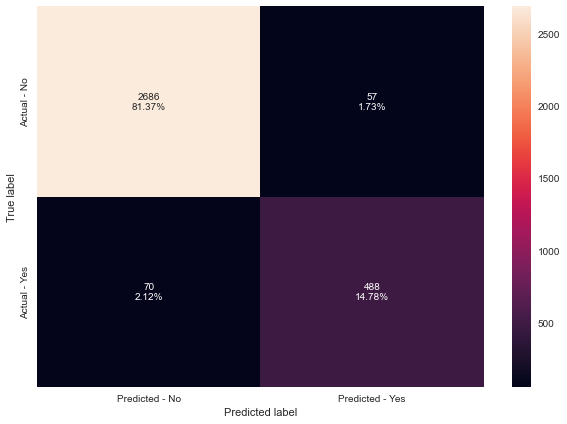

In [491]:
make_confusion_matrix(grid_search_ann,y_test)

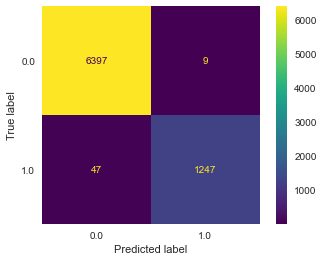

In [492]:
## Confusion matrix on the training data
plot_confusion_matrix(grid_search_ann,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.999


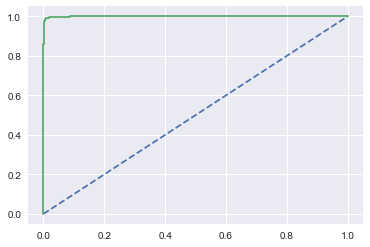

Iteration 246, loss = 0.30751610
Iteration 247, loss = 0.30742102
Iteration 248, loss = 0.30738660
Iteration 249, loss = 0.30732947
Iteration 250, loss = 0.30724138
Iteration 251, loss = 0.30714985
Iteration 252, loss = 0.30712402
Iteration 253, loss = 0.30701370
Iteration 254, loss = 0.30693598
Iteration 255, loss = 0.30686915
Iteration 256, loss = 0.30679007
Iteration 257, loss = 0.30676413
Iteration 258, loss = 0.30665167
Iteration 259, loss = 0.30658559
Iteration 260, loss = 0.30650677
Iteration 261, loss = 0.30649417
Iteration 262, loss = 0.30639060
Iteration 263, loss = 0.30633153
Iteration 264, loss = 0.30627679
Iteration 265, loss = 0.30621243
Iteration 266, loss = 0.30614427
Iteration 267, loss = 0.30609319
Iteration 268, loss = 0.30601477
Iteration 269, loss = 0.30599350
Iteration 270, loss = 0.30590166
Iteration 271, loss = 0.30585020
Iteration 272, loss = 0.30578370
Iteration 273, loss = 0.30576633
Training loss did not improve more than tol=0.000100 for 10 consecutive epoc

Iteration 254, loss = 0.30118926
Iteration 255, loss = 0.30111397
Iteration 256, loss = 0.30100134
Iteration 257, loss = 0.30094015
Iteration 258, loss = 0.30087100
Iteration 259, loss = 0.30080460
Iteration 260, loss = 0.30069168
Iteration 261, loss = 0.30064076
Iteration 262, loss = 0.30056894
Iteration 263, loss = 0.30051050
Iteration 264, loss = 0.30040417
Iteration 265, loss = 0.30038649
Iteration 266, loss = 0.30028824
Iteration 267, loss = 0.30024803
Iteration 268, loss = 0.30014783
Iteration 269, loss = 0.30008572
Iteration 270, loss = 0.30002880
Iteration 271, loss = 0.29996007
Iteration 272, loss = 0.29988627
Iteration 273, loss = 0.29980401
Iteration 274, loss = 0.29974176
Iteration 275, loss = 0.29968574
Iteration 276, loss = 0.29959795
Iteration 277, loss = 0.29954179
Iteration 278, loss = 0.29947942
Iteration 279, loss = 0.29942046
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.55186951
Iteration 2, loss = 0

Iteration 104, loss = 0.32987026
Iteration 105, loss = 0.32947840
Iteration 106, loss = 0.32908100
Iteration 107, loss = 0.32864647
Iteration 108, loss = 0.32826445
Iteration 109, loss = 0.32786819
Iteration 110, loss = 0.32747619
Iteration 111, loss = 0.32709172
Iteration 112, loss = 0.32672995
Iteration 113, loss = 0.32639327
Iteration 114, loss = 0.32598858
Iteration 115, loss = 0.32560724
Iteration 116, loss = 0.32529023
Iteration 117, loss = 0.32489954
Iteration 118, loss = 0.32457819
Iteration 119, loss = 0.32423658
Iteration 120, loss = 0.32393738
Iteration 121, loss = 0.32354939
Iteration 122, loss = 0.32320757
Iteration 123, loss = 0.32286627
Iteration 124, loss = 0.32255481
Iteration 125, loss = 0.32226443
Iteration 126, loss = 0.32193484
Iteration 127, loss = 0.32162573
Iteration 128, loss = 0.32132960
Iteration 129, loss = 0.32104305
Iteration 130, loss = 0.32070183
Iteration 131, loss = 0.32044706
Iteration 132, loss = 0.32011753
Iteration 133, loss = 0.31984677
Iteration 

Iteration 577, loss = 0.12434050
Iteration 578, loss = 0.12381103
Iteration 579, loss = 0.12381549
Iteration 580, loss = 0.12360995
Iteration 581, loss = 0.12322991
Iteration 582, loss = 0.12300306
Iteration 583, loss = 0.12354460
Iteration 584, loss = 0.12305795
Iteration 585, loss = 0.12323448
Iteration 586, loss = 0.12456676
Iteration 587, loss = 0.12432004
Iteration 588, loss = 0.12327880
Iteration 589, loss = 0.12263159
Iteration 590, loss = 0.12636127
Iteration 591, loss = 0.12198836
Iteration 592, loss = 0.12440506
Iteration 593, loss = 0.12211295
Iteration 594, loss = 0.12281707
Iteration 595, loss = 0.12155569
Iteration 596, loss = 0.12169487
Iteration 597, loss = 0.12163976
Iteration 598, loss = 0.12251470
Iteration 599, loss = 0.12098235
Iteration 600, loss = 0.12102135
Iteration 601, loss = 0.12172066
Iteration 602, loss = 0.12130433
Iteration 603, loss = 0.12107487
Iteration 604, loss = 0.12090515
Iteration 605, loss = 0.12188956
Iteration 606, loss = 0.12080670
Iteration 

Iteration 106, loss = 0.22265650
Iteration 107, loss = 0.22153155
Iteration 108, loss = 0.22056370
Iteration 109, loss = 0.22048267
Iteration 110, loss = 0.22013765
Iteration 111, loss = 0.21900848
Iteration 112, loss = 0.21881200
Iteration 113, loss = 0.21856062
Iteration 114, loss = 0.21787492
Iteration 115, loss = 0.21678151
Iteration 116, loss = 0.21626213
Iteration 117, loss = 0.21628024
Iteration 118, loss = 0.21631559
Iteration 119, loss = 0.21536542
Iteration 120, loss = 0.21521473
Iteration 121, loss = 0.21404007
Iteration 122, loss = 0.21450830
Iteration 123, loss = 0.21297648
Iteration 124, loss = 0.21231226
Iteration 125, loss = 0.21190358
Iteration 126, loss = 0.21414409
Iteration 127, loss = 0.21069800
Iteration 128, loss = 0.21141145
Iteration 129, loss = 0.20985089
Iteration 130, loss = 0.21039756
Iteration 131, loss = 0.20954623
Iteration 132, loss = 0.21110634
Iteration 133, loss = 0.20876895
Iteration 134, loss = 0.20821431
Iteration 135, loss = 0.20728769
Iteration 

Iteration 318, loss = 0.15589706
Iteration 319, loss = 0.15525632
Iteration 320, loss = 0.15512113
Iteration 321, loss = 0.15505206
Iteration 322, loss = 0.15492264
Iteration 323, loss = 0.15570021
Iteration 324, loss = 0.15556335
Iteration 325, loss = 0.15584418
Iteration 326, loss = 0.15500468
Iteration 327, loss = 0.15476944
Iteration 328, loss = 0.15427641
Iteration 329, loss = 0.15357396
Iteration 330, loss = 0.15374591
Iteration 331, loss = 0.15306706
Iteration 332, loss = 0.15430026
Iteration 333, loss = 0.15264548
Iteration 334, loss = 0.15238155
Iteration 335, loss = 0.15303645
Iteration 336, loss = 0.15296483
Iteration 337, loss = 0.15227523
Iteration 338, loss = 0.15266967
Iteration 339, loss = 0.15268834
Iteration 340, loss = 0.15182076
Iteration 341, loss = 0.15182746
Iteration 342, loss = 0.15194650
Iteration 343, loss = 0.15143228
Iteration 344, loss = 0.15188524
Iteration 345, loss = 0.15088458
Iteration 346, loss = 0.15105253
Iteration 347, loss = 0.15135805
Iteration 

Iteration 311, loss = 0.30545518
Iteration 312, loss = 0.30545515
Iteration 313, loss = 0.30545505
Iteration 314, loss = 0.30545500
Iteration 315, loss = 0.30545479
Iteration 316, loss = 0.30545489
Iteration 317, loss = 0.30545462
Iteration 318, loss = 0.30545458
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 319, loss = 0.30545439
Iteration 320, loss = 0.30545438
Iteration 321, loss = 0.30545436
Iteration 322, loss = 0.30545434
Iteration 323, loss = 0.30545431
Iteration 324, loss = 0.30545429
Iteration 325, loss = 0.30545428
Iteration 326, loss = 0.30545425
Iteration 327, loss = 0.30545424
Iteration 328, loss = 0.30545422
Iteration 329, loss = 0.30545423
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.55186951
Iteration 2, loss = 0.44412009
Iteration 3, loss = 0.41172036
Iteration 4, loss = 0.38348027
Iteration 5, loss = 

In [496]:
# predict probabilities
probs = grid_search_ann.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.979


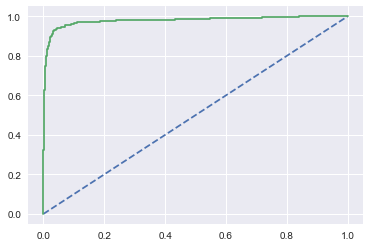

In [494]:
# predict probabilities
probs = grid_search_ann.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## KNN Model

In [382]:
from sklearn.neighbors import KNeighborsClassifier

In [383]:
knn = KNeighborsClassifier()

In [384]:
# Fit the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [445]:
#Using above defined function to get accuracy, recall and precision on train and test set
knn_score=get_metrics_score(knn)

Accuracy on training set :  0.9771428571428571
Accuracy on test set :  0.9512269009391093
Recall on training set :  0.8964451313755796
Recall on test set :  0.8010752688172043
Precision on training set :  0.9650582362728786
Precision on test set :  0.8993963782696177
F1 on training set :  0.9294871794871794
F1 on test set :  0.8473933649289099

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      6406
         1.0       0.97      0.90      0.93      1294

    accuracy                           0.98      7700
   macro avg       0.97      0.94      0.96      7700
weighted avg       0.98      0.98      0.98      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2743
         1.0       0.90      0.80      0.85       558

    accuracy                           0.95      3301
   macro avg       0.93     

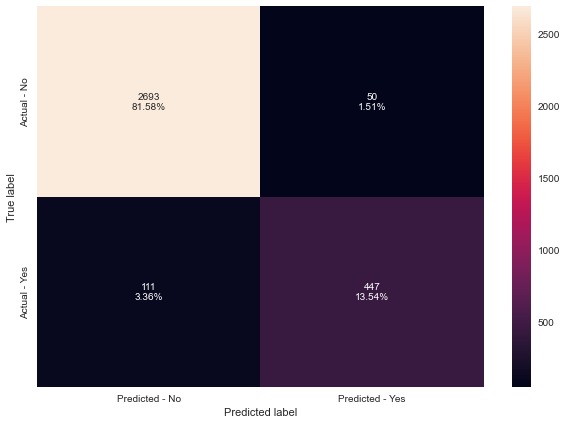

In [386]:
make_confusion_matrix(knn,y_test)

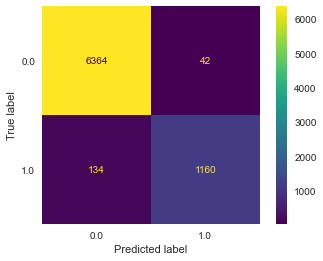

In [387]:
## Confusion matrix on the training data
plot_confusion_matrix(knn,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.995


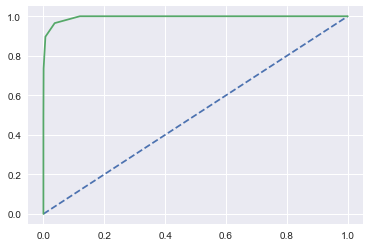

In [388]:
# predict probabilities
probs = knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.976


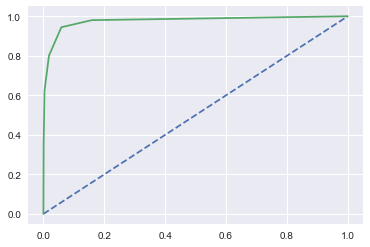

In [389]:
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## KNN - Tuned

In [390]:
knn_gs = KNeighborsClassifier()
knn_params ={'n_neighbors':[3,5,7,9,11]}
r2 = gridsearch(knn_gs , knn_params)
print(f'Best parameters for KNN: {r2}')

Best parameters for KNN: {'n_neighbors': 3}


In [391]:
knn_tuned = KNeighborsClassifier(n_neighbors= 3)

In [392]:
# Fit the model on the training data
knn_tuned.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [446]:
#Using above defined function to get accuracy, recall and precision on train and test set
knn_tuned_score=get_metrics_score(knn_tuned)

Accuracy on training set :  0.9858441558441559
Accuracy on test set :  0.96485913359588
Recall on training set :  0.9412673879443586
Recall on test set :  0.8888888888888888
Precision on training set :  0.973621103117506
Precision on test set :  0.9018181818181819
F1 on training set :  0.9571709233791749
F1 on test set :  0.8953068592057761

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6406
         1.0       0.97      0.94      0.96      1294

    accuracy                           0.99      7700
   macro avg       0.98      0.97      0.97      7700
weighted avg       0.99      0.99      0.99      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2743
         1.0       0.90      0.89      0.90       558

    accuracy                           0.96      3301
   macro avg       0.94      0.

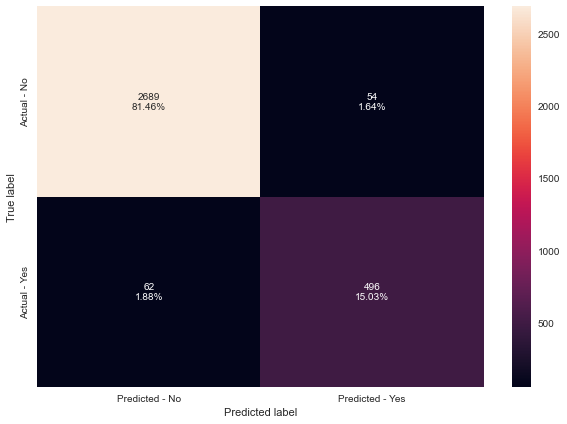

In [394]:
make_confusion_matrix(knn_tuned,y_test)

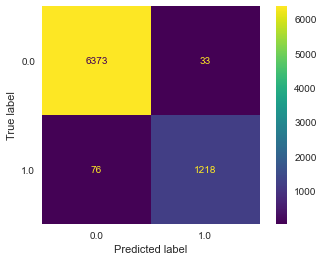

In [395]:
## Confusion matrix on the training data
plot_confusion_matrix(knn_tuned,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.998


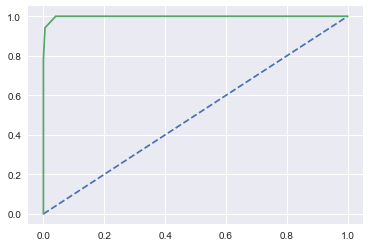

In [396]:
# predict probabilities
probs = knn_tuned.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.977


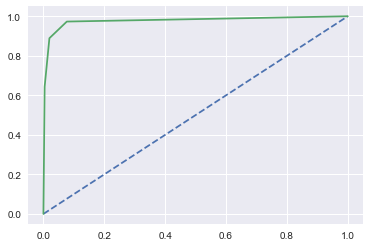

In [397]:
# predict probabilities
probs = knn_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Bagging with Decision Tree as base estimator

In [459]:
from sklearn.ensemble import BaggingClassifier

In [460]:
Bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,random_state=1)

In [461]:
Bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [481]:
#Using above defined function to get accuracy, recall and precision on train and test set
Bagging_score=get_metrics_score(Bagging_model)

Accuracy on training set :  1.0
Accuracy on test set :  0.965
Recall on training set :  1.0
Recall on test set :  0.853
Precision on training set :  1.0
Precision on test set :  0.935
F1 on training set :  1.0
F1 on test set :  0.892

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6406
         1.0       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2743
         1.0       0.94      0.85      0.89       558

    accuracy                           0.97      3301
   macro avg       0.95      0.92      0.94      3301
weighted avg       0.96      0.97      0.96      3301



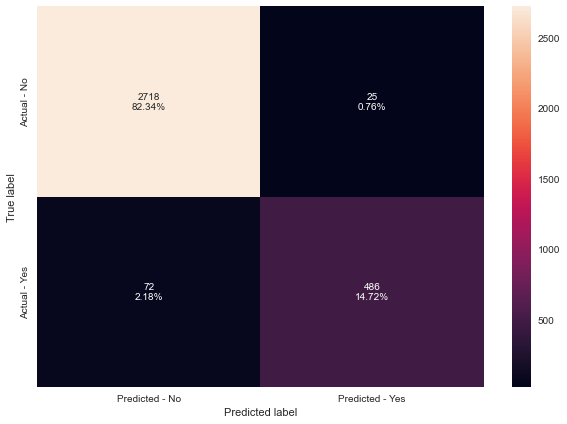

In [463]:
make_confusion_matrix(Bagging_model,y_test)

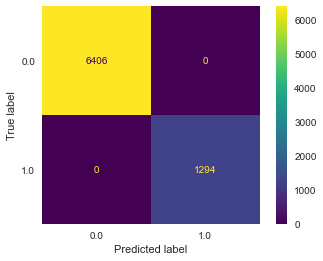

In [464]:
## Confusion matrix on the training data
plot_confusion_matrix(Bagging_model,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 1.000


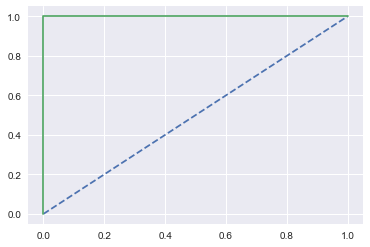

In [465]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.989


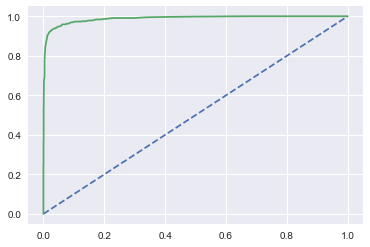

In [466]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Comparing all models

In [497]:
# defining list of models
models = [lr_sm, lr_model, best_model_lr, lda_model,abc, abc_tuned, gbc, xgb, xgb_tuned, gbc_tuned,rf, rf_tuned, ann, grid_search_ann, knn, knn_tuned,Bagging_model]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))

In [498]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression with Smote','Logistic Regression','Logistic Regression-Tuned','LDA','AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','XGBoost','XGBoost-Tuned',
                                          'Gradient Boosting Tuned','Random Forest', 'Random Forest - Tuned','ANN','ANN-Tuned','KNN','KNN-Tuned','Bagging with Decision Tree'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_f1':f1_train,'Test_f1':f1_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_f1  Test_f1
0              Logistic Regression with Smote            0.79           0.77          0.82         0.81             0.43            0.41      0.56     0.55
1                         Logistic Regression            0.88           0.88          0.43         0.45             0.75            0.74      0.55     0.56
2                   Logistic Regression-Tuned            0.88           0.88          0.45         0.46             0.74            0.73      0.56     0.57
3                                         LDA            0.88           0.88          0.41         0.44             0.74            0.74      0.53     0.55
4             AdaBoost with default paramters            0.90           0.89          0.58         0.59             0.74            0.73      0.65     0.65
5                              AdaBoost Tuned            1.00           0.94          1.00         0.86             1.00            0.81      1.00     0.83
6   Gradient Boosting with default parameters            0.92           0.90          0.62         0.58             0.85            0.79      0.72     0.67
7                                     XGBoost            1.00           0.97          1.00         0.89             1.00            0.92      1.00     0.90
8                               XGBoost-Tuned            1.00           0.97          1.00         0.91             1.00            0.92      1.00     0.91
9                     Gradient Boosting Tuned            1.00           0.98          1.00         0.92             1.00            0.97      1.00     0.95
10                              Random Forest            1.00           0.97          1.00         0.86             1.00            0.95      1.00     0.91
11                      Random Forest - Tuned            0.96           0.93          0.78         0.67             0.98            0.91      0.87     0.77
12                                        ANN            0.95           0.93          0.78         0.72             0.90            0.83      0.83     0.77
13                                  ANN-Tuned            0.98           0.88          0.96         0.87             0.99            0.90      0.98     0.88
14                                        KNN            0.98           0.95          0.90         0.80             0.97            0.90      0.93     0.85
15                                  KNN-Tuned            0.99           0.96          0.94         0.89             0.97            0.90      0.96     0.90
16                 Bagging with Decision Tree            1.00           0.97          1.00         0.87             1.00            0.95      1.00     0.91

In [499]:
comparison_frame.sort_values(by='Test_f1', ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_f1  Test_f1
9                     Gradient Boosting Tuned            1.00           0.98          1.00         0.92             1.00            0.97      1.00     0.95
8                               XGBoost-Tuned            1.00           0.97          1.00         0.91             1.00            0.92      1.00     0.91
10                              Random Forest            1.00           0.97          1.00         0.86             1.00            0.95      1.00     0.91
16                 Bagging with Decision Tree            1.00           0.97          1.00         0.87             1.00            0.95      1.00     0.91
7                                     XGBoost            1.00           0.97          1.00         0.89             1.00            0.92      1.00     0.90
15                                  KNN-Tuned            0.99           0.96          0.94         0.89             0.97            0.90      0.96     0.90
13                                  ANN-Tuned            0.98           0.88          0.96         0.87             0.99            0.90      0.98     0.88
14                                        KNN            0.98           0.95          0.90         0.80             0.97            0.90      0.93     0.85
5                              AdaBoost Tuned            1.00           0.94          1.00         0.86             1.00            0.81      1.00     0.83
11                      Random Forest - Tuned            0.96           0.93          0.78         0.67             0.98            0.91      0.87     0.77
12                                        ANN            0.95           0.93          0.78         0.72             0.90            0.83      0.83     0.77
6   Gradient Boosting with default parameters            0.92           0.90          0.62         0.58             0.85            0.79      0.72     0.67
4             AdaBoost with default paramters            0.90           0.89          0.58         0.59             0.74            0.73      0.65     0.65
2                   Logistic Regression-Tuned            0.88           0.88          0.45         0.46             0.74            0.73      0.56     0.57
1                         Logistic Regression            0.88           0.88          0.43         0.45             0.75            0.74      0.55     0.56
3                                         LDA            0.88           0.88          0.41         0.44             0.74            0.74      0.53     0.55
0              Logistic Regression with Smote            0.79           0.77          0.82         0.81             0.43            0.41      0.56     0.55

In [500]:
comparison_frame.sort_values(by='Test_Recall', ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_f1  Test_f1
9                     Gradient Boosting Tuned            1.00           0.98          1.00         0.92             1.00            0.97      1.00     0.95
8                               XGBoost-Tuned            1.00           0.97          1.00         0.91             1.00            0.92      1.00     0.91
7                                     XGBoost            1.00           0.97          1.00         0.89             1.00            0.92      1.00     0.90
15                                  KNN-Tuned            0.99           0.96          0.94         0.89             0.97            0.90      0.96     0.90
13                                  ANN-Tuned            0.98           0.88          0.96         0.87             0.99            0.90      0.98     0.88
16                 Bagging with Decision Tree            1.00           0.97          1.00         0.87             1.00            0.95      1.00     0.91
5                              AdaBoost Tuned            1.00           0.94          1.00         0.86             1.00            0.81      1.00     0.83
10                              Random Forest            1.00           0.97          1.00         0.86             1.00            0.95      1.00     0.91
0              Logistic Regression with Smote            0.79           0.77          0.82         0.81             0.43            0.41      0.56     0.55
14                                        KNN            0.98           0.95          0.90         0.80             0.97            0.90      0.93     0.85
12                                        ANN            0.95           0.93          0.78         0.72             0.90            0.83      0.83     0.77
11                      Random Forest - Tuned            0.96           0.93          0.78         0.67             0.98            0.91      0.87     0.77
4             AdaBoost with default paramters            0.90           0.89          0.58         0.59             0.74            0.73      0.65     0.65
6   Gradient Boosting with default parameters            0.92           0.90          0.62         0.58             0.85            0.79      0.72     0.67
2                   Logistic Regression-Tuned            0.88           0.88          0.45         0.46             0.74            0.73      0.56     0.57
1                         Logistic Regression            0.88           0.88          0.43         0.45             0.75            0.74      0.55     0.56
3                                         LDA            0.88           0.88          0.41         0.44             0.74            0.74      0.53     0.55

In [501]:
comparison_frame.sort_values(by='Test_Precision', ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_f1  Test_f1
9                     Gradient Boosting Tuned            1.00           0.98          1.00         0.92             1.00            0.97      1.00     0.95
16                 Bagging with Decision Tree            1.00           0.97          1.00         0.87             1.00            0.95      1.00     0.91
10                              Random Forest            1.00           0.97          1.00         0.86             1.00            0.95      1.00     0.91
7                                     XGBoost            1.00           0.97          1.00         0.89             1.00            0.92      1.00     0.90
8                               XGBoost-Tuned            1.00           0.97          1.00         0.91             1.00            0.92      1.00     0.91
11                      Random Forest - Tuned            0.96           0.93          0.78         0.67             0.98            0.91      0.87     0.77
13                                  ANN-Tuned            0.98           0.88          0.96         0.87             0.99            0.90      0.98     0.88
14                                        KNN            0.98           0.95          0.90         0.80             0.97            0.90      0.93     0.85
15                                  KNN-Tuned            0.99           0.96          0.94         0.89             0.97            0.90      0.96     0.90
12                                        ANN            0.95           0.93          0.78         0.72             0.90            0.83      0.83     0.77
5                              AdaBoost Tuned            1.00           0.94          1.00         0.86             1.00            0.81      1.00     0.83
6   Gradient Boosting with default parameters            0.92           0.90          0.62         0.58             0.85            0.79      0.72     0.67
1                         Logistic Regression            0.88           0.88          0.43         0.45             0.75            0.74      0.55     0.56
3                                         LDA            0.88           0.88          0.41         0.44             0.74            0.74      0.53     0.55
4             AdaBoost with default paramters            0.90           0.89          0.58         0.59             0.74            0.73      0.65     0.65
2                   Logistic Regression-Tuned            0.88           0.88          0.45         0.46             0.74            0.73      0.56     0.57
0              Logistic Regression with Smote            0.79           0.77          0.82         0.81             0.43            0.41      0.56     0.55